***
# Supervised Learning : Modelling Right-Censored Survival Time and Status Responses for Prediction

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *July 10, 2024*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Cleaning](#1.4.1)
        * [1.4.2 Missing Data Imputation](#1.4.2)
        * [1.4.3 Outlier Treatment](#1.4.3)
        * [1.4.4 Collinearity](#1.4.4)
        * [1.4.5 Shape Transformation](#1.4.5)
        * [1.4.6 Centering and Scaling](#1.4.6)
        * [1.4.7 Data Encoding](#1.4.7)
        * [1.4.8 Preprocessed Data Description](#1.4.8)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Predictive Model Development](#1.6)
        * [1.6.1 Premodelling Data Description](#1.6.1)
        * [1.6.2 Cox Proportional Hazards Regression](#1.6.2)
        * [1.6.3 Cox Net Survival](#1.6.3)
        * [1.6.4 Survival Trees](#1.6.4)
        * [1.6.5 Random Survival Forest](#1.6.5)
        * [1.6.6 Gradient Boosted Survival](#1.6.6)
    * [1.7 Consolidated Findings](#1.7)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project implements the **Cox Proportional Hazards Regression**, **Cox-Net Survival**, **Survival Tree**, **Random Survival Forest** and **Gradient Boosting Survival** algorithms using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark> to estimate the survival probabilities of right-censored survival time and status responses. The resulting predictions derived from the candidate models were evaluated in terms of their discrimination power using the Harrel's concordance index metric. Additionally, hazard and survival probability functions were estimated for model risk-groups and sampled individual cases. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document. 

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Liver Cirrhosis Dataset](https://www.kaggle.com/code/arjunbhaybhang/liver-cirrhosis-prediction-with-xgboost-eda) from [Kaggle](https://www.kaggle.com/) (with all credits attributed to [Arjun Bhaybhang](https://www.kaggle.com/arjunbhaybhang)) was used for the analysis as consolidated from the following primary sources: 
1. Reference Book entitled **Counting Processes and Survival Analysis** from [Wiley](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118150672)
2. Research Paper entitled **Efficacy of Liver Transplantation in Patients with Primary Biliary Cirrhosis** from the [New England Journal of Medicine](https://www.nejm.org/doi/abs/10.1056/NEJM198906293202602)
3. Research Paper entitled **Prognosis in Primary Biliary Cirrhosis: Model for Decision Making** from the [Hepatology](https://aasldpubs.onlinelibrary.wiley.com/doi/10.1002/hep.1840100102)

This study hypothesized that the evaluated drug, liver profile test biomarkers and various clinicopathological characteristics influence liver cirrhosis survival between patients.

The event status and survival duration variables for the study are:
* <span style="color: #FF0000">Status</span> - Status of the patient (C, censored | CL, censored due to liver transplant | D, death)
* <span style="color: #FF0000">N_Days</span> - Number of days between registration and the earlier of death, transplantation, or study analysis time (1986)

The predictor variables for the study are:
* <span style="color: #FF0000">Drug</span> - Type of administered drug to the patient (D-Penicillamine | Placebo)
* <span style="color: #FF0000">Age</span> - Patient's age (Days)
* <span style="color: #FF0000">Sex</span> - Patient's sex (Male | Female)
* <span style="color: #FF0000">Ascites</span> - Presence of ascites (Yes | No)
* <span style="color: #FF0000">Hepatomegaly</span> - Presence of hepatomegaly (Yes | No)
* <span style="color: #FF0000">Spiders</span> - Presence of spiders (Yes | No)
* <span style="color: #FF0000">Edema</span> - Presence of edema ( N, No edema and no diuretic therapy for edema | S, Edema present without diuretics or edema resolved by diuretics) | Y, Edema despite diuretic therapy)
* <span style="color: #FF0000">Bilirubin</span> - Serum bilirubin (mg/dl)
* <span style="color: #FF0000">Cholesterol</span> - Serum cholesterol (mg/dl)
* <span style="color: #FF0000">Albumin</span> - Albumin (gm/dl)
* <span style="color: #FF0000">Copper</span> - Urine copper (ug/day)
* <span style="color: #FF0000">Alk_Phos</span> - Alkaline phosphatase (U/liter)
* <span style="color: #FF0000">SGOT</span> - Serum glutamic-oxaloacetic transaminase (U/ml)
* <span style="color: #FF0000">Triglycerides</span> - Triglicerides (mg/dl)
* <span style="color: #FF0000">Platelets</span> - Platelets (cubic ml/1000)
* <span style="color: #FF0000">Prothrombin</span> - Prothrombin time (seconds)
* <span style="color: #FF0000">Stage</span> - Histologic stage of disease (Stage I | Stage II | Stage III | Stage IV)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **418 rows** (observations)
    * **20 columns** (variables)
        * **1/20 metadata** (object)
            * <span style="color: #FF0000">ID</span>
        * **2/20 event | duration** (object | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/20 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **7/20 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage</span>

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
%matplotlib inline

from operator import add,mul,truediv
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance

from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest, GradientBoostingSurvivalAnalysis
from sksurv.tree import SurvivalTree
from sksurv.metrics import concordance_index_censored
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

import warnings
warnings.filterwarnings('ignore')

In [2]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"

In [3]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
cirrhosis_survival = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "Cirrhosis_Survival.csv"))

In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(cirrhosis_survival.shape)

Dataset Dimensions: 


(418, 20)

In [5]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cirrhosis_survival.dtypes)

Column Names and Data Types:


ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [6]:
##################################
# Taking a snapshot of the dataset
##################################
cirrhosis_survival.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [7]:
##################################
# Taking the ID column as the index
##################################
cirrhosis_survival.set_index(['ID'], inplace=True)

In [8]:
##################################
# Changing the data type for Stage
##################################
cirrhosis_survival['Stage'] = cirrhosis_survival['Stage'].astype('object')

In [9]:
##################################
# Changing the data type for Status
##################################
cirrhosis_survival['Status'] = cirrhosis_survival['Status'].replace({'C':False, 'CL':False, 'D':True}) 

In [10]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(cirrhosis_survival.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00
Platelets,407.0,257.024570,98.325585,62.00,188.5000,251.00,318.00,721.00


In [11]:
##################################
# Performing a general exploration of the object variables
##################################
print('object Variable Summary:')
display(cirrhosis_survival.describe(include='object').transpose())

object Variable Summary:


,count,unique,top,freq
Drug,312,2,D-penicillamine,158
Sex,418,2,F,374
Ascites,312,2,N,288
Hepatomegaly,312,2,Y,160
Spiders,312,2,N,222
Edema,418,3,N,354
Stage,412.0,4.0,3.0,155.0


## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows observed.
2. Missing data noted for 12 variables with Null.Count>0 and Fill.Rate<1.0.
    * <span style="color: #FF0000">Tryglicerides</span>: Null.Count = 136, Fill.Rate = 0.675
    * <span style="color: #FF0000">Cholesterol</span>: Null.Count = 134, Fill.Rate = 0.679
    * <span style="color: #FF0000">Copper</span>: Null.Count = 108, Fill.Rate = 0.741
    * <span style="color: #FF0000">Drug</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Ascites</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Hepatomegaly</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Spiders</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Alk_Phos</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">SGOT</span>: Null.Count = 106, Fill.Rate = 0.746
    * <span style="color: #FF0000">Platelets</span>: Null.Count = 11, Fill.Rate = 0.974
    * <span style="color: #FF0000">Stage</span>: Null.Count = 6, Fill.Rate = 0.986
    * <span style="color: #FF0000">Prothrombin</span>: Null.Count = 2, Fill.Rate = 0.995
3. 142 observations noted with at least 1 missing data. From this number, 106 observations reported high Missing.Rate>0.4.
    * 91 Observations: Missing.Rate = 0.450 (9 columns)
    * 15 Observations: Missing.Rate = 0.500 (10 columns)
    * 28 Observations: Missing.Rate = 0.100 (2 columns)
    * 8 Observations: Missing.Rate = 0.050 (1 column)
4. Low variance observed for 3 variables with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">Ascites</span>: First.Second.Mode.Ratio = 12.000
    * <span style="color: #FF0000">Sex</span>: First.Second.Mode.Ratio = 8.500
    * <span style="color: #FF0000">Edema</span>: First.Second.Mode.Ratio = 8.045
5. No low variance observed for any variable with Unique.Count.Ratio>10.
6. High and marginally high skewness observed for 2 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">Cholesterol</span>: Skewness = +3.409
    * <span style="color: #FF0000">Alk_Phos</span>: Skewness = +2.993

In [12]:
##################################
# Counting the number of duplicated rows
##################################
cirrhosis_survival.duplicated().sum()

0

In [13]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cirrhosis_survival.dtypes)

In [14]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cirrhosis_survival.columns)

In [15]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cirrhosis_survival)] * len(cirrhosis_survival.columns))

In [16]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cirrhosis_survival.isna().sum(axis=0))

In [17]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cirrhosis_survival.count())

In [18]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [19]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,N_Days,int64,418,418,0,1.000000
1,Status,bool,418,418,0,1.000000
2,Drug,object,418,312,106,0.746411
3,Age,int64,418,418,0,1.000000
4,Sex,object,418,418,0,1.000000
5,Ascites,object,418,312,106,0.746411
6,Hepatomegaly,object,418,312,106,0.746411
7,Spiders,object,418,312,106,0.746411
8,Edema,object,418,418,0,1.000000
9,Bilirubin,float64,418,418,0,1.000000


In [20]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
print('Number of Columns with Missing Data:', str(len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])))

Number of Columns with Missing Data: 12


In [21]:
##################################
# Identifying the columns
# with Fill.Rate < 1.00
##################################
print('Columns with Missing Data:')
display(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)].sort_values(by=['Fill.Rate'], ascending=True))

Columns with Missing Data:


,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
15,Tryglicerides,float64,418,282,136,0.674641
10,Cholesterol,float64,418,284,134,0.679426
12,Copper,float64,418,310,108,0.741627
2,Drug,object,418,312,106,0.746411
5,Ascites,object,418,312,106,0.746411
6,Hepatomegaly,object,418,312,106,0.746411
7,Spiders,object,418,312,106,0.746411
13,Alk_Phos,float64,418,312,106,0.746411
14,SGOT,float64,418,312,106,0.746411
16,Platelets,float64,418,407,11,0.973684


In [22]:
##################################
# Identifying the rows
# with Fill.Rate < 1.00
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1.00)]

In [23]:
##################################
# Gathering the metadata labels for each observation
##################################
row_metadata_list = cirrhosis_survival.index.values.tolist()

In [24]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(cirrhosis_survival.columns)] * len(cirrhosis_survival))

In [25]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(cirrhosis_survival.isna().sum(axis=1))

In [26]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [27]:
##################################
# Exploring the rows
# for missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

,Row.Name,Column.Count,Null.Count,Missing.Rate
0,1,19,0,0.000000
1,2,19,0,0.000000
2,3,19,0,0.000000
3,4,19,0,0.000000
4,5,19,0,0.000000
...,...,...,...,...
413,414,19,9,0.473684
414,415,19,9,0.473684
415,416,19,9,0.473684
416,417,19,9,0.473684


In [28]:
##################################
# Counting the number of rows
# with Fill.Rate < 1.00
##################################
print('Number of Rows with Missing Data:',str(len(all_row_quality_summary[all_row_quality_summary['Missing.Rate']>0])))

Number of Rows with Missing Data: 142


In [29]:
##################################
# Identifying the rows
# with Fill.Rate < 1.00
##################################
print('Rows with Missing Data:')
display(all_row_quality_summary[all_row_quality_summary['Missing.Rate']>0])

Rows with Missing Data:


,Row.Name,Column.Count,Null.Count,Missing.Rate
5,6,19,1,0.052632
13,14,19,2,0.105263
39,40,19,2,0.105263
40,41,19,2,0.105263
41,42,19,2,0.105263
...,...,...,...,...
413,414,19,9,0.473684
414,415,19,9,0.473684
415,416,19,9,0.473684
416,417,19,9,0.473684


In [30]:
##################################
# Counting the number of rows
# based on different Fill.Rate categories
##################################
missing_rate_categories = all_row_quality_summary['Missing.Rate'].value_counts().reset_index()
missing_rate_categories.columns = ['Missing.Rate.Category','Missing.Rate.Count']
display(missing_rate_categories.sort_values(['Missing.Rate.Category'], ascending=False))

,Missing.Rate.Category,Missing.Rate.Count
3,0.526316,15
1,0.473684,91
2,0.105263,28
4,0.052632,8
0,0.000000,276


In [31]:
##################################
# Identifying the rows
# with Missing.Rate > 0.40
##################################
row_high_missing_rate = all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.40)]

In [32]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
cirrhosis_survival_numeric = cirrhosis_survival.select_dtypes(include='number')

In [33]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = cirrhosis_survival_numeric.columns

In [34]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = cirrhosis_survival_numeric.min()

In [35]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = cirrhosis_survival_numeric.mean()

In [36]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = cirrhosis_survival_numeric.median()

In [37]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = cirrhosis_survival_numeric.max()

In [38]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[0] for x in cirrhosis_survival_numeric]

In [39]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[1] for x in cirrhosis_survival_numeric]

In [40]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [cirrhosis_survival_numeric[x].isin([cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cirrhosis_survival_numeric]

In [41]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [cirrhosis_survival_numeric[x].isin([cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cirrhosis_survival_numeric]

In [42]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [43]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = cirrhosis_survival_numeric.nunique(dropna=True)

In [44]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(cirrhosis_survival_numeric)] * len(cirrhosis_survival_numeric.columns))

In [45]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [46]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cirrhosis_survival_numeric.skew()

In [47]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = cirrhosis_survival_numeric.kurtosis()

In [48]:
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,N_Days,41.00,1917.782297,1730.00,4795.00,1434.00,3445.00,2,2,1.000000,399,418,0.954545,0.472602,-0.482139
1,Age,9598.00,18533.351675,18628.00,28650.00,19724.00,18993.00,7,6,1.166667,344,418,0.822967,0.086850,-0.616730
2,Bilirubin,0.30,3.220813,1.40,28.00,0.70,0.60,33,31,1.064516,98,418,0.234450,2.717611,8.065336
3,Cholesterol,120.00,369.510563,309.50,1775.00,260.00,316.00,4,4,1.000000,201,418,0.480861,3.408526,14.337870
4,Albumin,1.96,3.497440,3.53,4.64,3.35,3.50,11,8,1.375000,154,418,0.368421,-0.467527,0.566745
5,Copper,4.00,97.648387,73.00,588.00,52.00,67.00,8,7,1.142857,158,418,0.377990,2.303640,7.624023
6,Alk_Phos,289.00,1982.655769,1259.00,13862.40,601.00,794.00,2,2,1.000000,295,418,0.705742,2.992834,9.662553
7,SGOT,26.35,122.556346,114.70,457.25,71.30,137.95,6,5,1.200000,179,418,0.428230,1.449197,4.311976
8,Tryglicerides,33.00,124.702128,108.00,598.00,118.00,90.00,7,6,1.166667,146,418,0.349282,2.523902,11.802753
9,Platelets,62.00,257.024570,251.00,721.00,344.00,269.00,6,5,1.200000,243,418,0.581340,0.627098,0.863045


In [49]:
##################################
# Formulating the dataset
# with object column only
##################################
cirrhosis_survival_object = cirrhosis_survival.select_dtypes(include='object')

In [50]:
##################################
# Gathering the variable names for the object column
##################################
object_variable_name_list = cirrhosis_survival_object.columns

In [51]:
##################################
# Gathering the first mode values for the object column
##################################
object_first_mode_list = [cirrhosis_survival[x].value_counts().index.tolist()[0] for x in cirrhosis_survival_object]

In [52]:
##################################
# Gathering the second mode values for each object column
##################################
object_second_mode_list = [cirrhosis_survival[x].value_counts().index.tolist()[1] for x in cirrhosis_survival_object]

In [53]:
##################################
# Gathering the count of first mode values for each object column
##################################
object_first_mode_count_list = [cirrhosis_survival_object[x].isin([cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cirrhosis_survival_object]

In [54]:
##################################
# Gathering the count of second mode values for each object column
##################################
object_second_mode_count_list = [cirrhosis_survival_object[x].isin([cirrhosis_survival[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cirrhosis_survival_object]

In [55]:
##################################
# Gathering the first mode to second mode ratio for each object column
##################################
object_first_second_mode_ratio_list = map(truediv, object_first_mode_count_list, object_second_mode_count_list)

In [56]:
##################################
# Gathering the count of unique values for each object column
##################################
object_unique_count_list = cirrhosis_survival_object.nunique(dropna=True)

In [57]:
##################################
# Gathering the number of observations for each object column
##################################
object_row_count_list = list([len(cirrhosis_survival_object)] * len(cirrhosis_survival_object.columns))

In [58]:
##################################
# Gathering the unique to count ratio for each object column
##################################
object_unique_count_ratio_list = map(truediv, object_unique_count_list, object_row_count_list)

In [59]:
object_column_quality_summary = pd.DataFrame(zip(object_variable_name_list,
                                                 object_first_mode_list,
                                                 object_second_mode_list,
                                                 object_first_mode_count_list,
                                                 object_second_mode_count_list,
                                                 object_first_second_mode_ratio_list,
                                                 object_unique_count_list,
                                                 object_row_count_list,
                                                 object_unique_count_ratio_list), 
                                        columns=['Object.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(object_column_quality_summary)

,Object.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,Drug,D-penicillamine,Placebo,158,154,1.025974,2,418,0.004785
1,Sex,F,M,374,44,8.500000,2,418,0.004785
2,Ascites,N,Y,288,24,12.000000,2,418,0.004785
3,Hepatomegaly,Y,N,160,152,1.052632,2,418,0.004785
4,Spiders,N,Y,222,90,2.466667,2,418,0.004785
5,Edema,N,S,354,44,8.045455,3,418,0.007177
6,Stage,3.0,4.0,155,144,1.076389,4,418,0.009569


In [60]:
##################################
# Counting the number of object columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['First.Second.Mode.Ratio']>5)])

3

In [61]:
##################################
# Counting the number of object columns
# with Unique.Count.Ratio > 10.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

### 1.4.1 Data Cleaning <a class="anchor" id="1.4.1"></a>

1. Subsets of rows with high rates of missing data were removed from the dataset:
    * 106 rows with Missing.Rate>0.4 were exluded for subsequent analysis.
2. No variables were removed due to zero or near-zero variance.

In [62]:
##################################
# Performing a general exploration of the original dataset
##################################
print('Dataset Dimensions: ')
display(cirrhosis_survival.shape)

Dataset Dimensions: 


(418, 19)

In [63]:
##################################
# Filtering out the rows with
# with Missing.Rate > 0.40
##################################
cirrhosis_survival_filtered_row = cirrhosis_survival.drop(cirrhosis_survival[cirrhosis_survival.index.isin(row_high_missing_rate['Row.Name'].values.tolist())].index)

In [64]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cirrhosis_survival_filtered_row.shape)

Dataset Dimensions: 


(312, 19)

In [65]:
##################################
# Gathering the missing data percentage for each column
# from the filtered data
##################################
data_type_list = list(cirrhosis_survival_filtered_row.dtypes)
variable_name_list = list(cirrhosis_survival_filtered_row.columns)
null_count_list = list(cirrhosis_survival_filtered_row.isna().sum(axis=0))
non_null_count_list = list(cirrhosis_survival_filtered_row.count())
row_count_list = list([len(cirrhosis_survival_filtered_row)] * len(cirrhosis_survival_filtered_row.columns))
fill_rate_list = map(truediv, non_null_count_list, row_count_list)
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary.sort_values(['Fill.Rate'], ascending=True))


,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
15,Tryglicerides,float64,312,282,30,0.903846
10,Cholesterol,float64,312,284,28,0.910256
16,Platelets,float64,312,308,4,0.987179
12,Copper,float64,312,310,2,0.993590
0,N_Days,int64,312,312,0,1.000000
14,SGOT,float64,312,312,0,1.000000
13,Alk_Phos,float64,312,312,0,1.000000
11,Albumin,float64,312,312,0,1.000000
17,Prothrombin,float64,312,312,0,1.000000
9,Bilirubin,float64,312,312,0,1.000000


In [66]:
##################################
# Formulating a new dataset object
# for the cleaned data
##################################
cirrhosis_survival_cleaned = cirrhosis_survival_filtered_row

### 1.4.2 Missing Data Imputation <a class="anchor" id="1.4.2"></a>

1. To prevent data leakage, the original dataset was divided into training and testing subsets prior to imputation.
2. Missing data in the training subset for float variables were imputed using the iterative imputer algorithm with a  linear regression estimator.
    * <span style="color: #FF0000">Tryglicerides</span>: Null.Count = 20
    * <span style="color: #FF0000">Cholesterol</span>: Null.Count = 18
    * <span style="color: #FF0000">Platelets</span>: Null.Count = 2
    * <span style="color: #FF0000">Copper</span>: Null.Count = 1
3. Missing data in the testing subset for float variables will be treated with iterative imputing downstream using a pipeline involving the final preprocessing steps.


In [67]:
##################################
# Formulating the summary
# for all cleaned columns
##################################
cleaned_column_quality_summary = pd.DataFrame(zip(list(cirrhosis_survival_cleaned.columns),
                                                  list(cirrhosis_survival_cleaned.dtypes),
                                                  list([len(cirrhosis_survival_cleaned)] * len(cirrhosis_survival_cleaned.columns)),
                                                  list(cirrhosis_survival_cleaned.count()),
                                                  list(cirrhosis_survival_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(cleaned_column_quality_summary.sort_values(by=['Null.Count'], ascending=False))

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count
15,Tryglicerides,float64,312,282,30
10,Cholesterol,float64,312,284,28
16,Platelets,float64,312,308,4
12,Copper,float64,312,310,2
0,N_Days,int64,312,312,0
17,Prothrombin,float64,312,312,0
14,SGOT,float64,312,312,0
13,Alk_Phos,float64,312,312,0
11,Albumin,float64,312,312,0
9,Bilirubin,float64,312,312,0


In [68]:
##################################
# Creating training and testing data
##################################
cirrhosis_survival_train, cirrhosis_survival_test = train_test_split(cirrhosis_survival_cleaned, 
                                                                     test_size=0.30, 
                                                                     stratify=cirrhosis_survival_cleaned['Status'], 
                                                                     random_state=88888888)
cirrhosis_survival_X_train_cleaned = cirrhosis_survival_train.drop(columns=['Status', 'N_Days'])
cirrhosis_survival_y_train_cleaned = cirrhosis_survival_train[['Status', 'N_Days']]
cirrhosis_survival_X_test_cleaned = cirrhosis_survival_test.drop(columns=['Status', 'N_Days'])
cirrhosis_survival_y_test_cleaned = cirrhosis_survival_test[['Status', 'N_Days']]

In [69]:
##################################
# Gathering the training data information
##################################
print(f'Training Dataset Dimensions: Predictors: {cirrhosis_survival_X_train_cleaned.shape}, Event|Duration: {cirrhosis_survival_y_train_cleaned.shape}')

Training Dataset Dimensions: Predictors: (218, 17), Event|Duration: (218, 2)


In [70]:
##################################
# Gathering the testing data information
##################################
print(f'Testing Dataset Dimensions: Predictors: {cirrhosis_survival_X_test_cleaned.shape}, Event|Duration: {cirrhosis_survival_y_test_cleaned.shape}')

Testing Dataset Dimensions: Predictors: (94, 17), Event|Duration: (94, 2)


In [71]:
##################################
# Formulating the summary
# for all cleaned columns
# from the training data
##################################
X_train_cleaned_column_quality_summary = pd.DataFrame(zip(list(cirrhosis_survival_X_train_cleaned.columns),
                                                  list(cirrhosis_survival_X_train_cleaned.dtypes),
                                                  list([len(cirrhosis_survival_X_train_cleaned)] * len(cirrhosis_survival_X_train_cleaned.columns)),
                                                  list(cirrhosis_survival_X_train_cleaned.count()),
                                                  list(cirrhosis_survival_X_train_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(X_train_cleaned_column_quality_summary.sort_values(by=['Null.Count'], ascending=False))

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count
13,Tryglicerides,float64,218,200,18
8,Cholesterol,float64,218,202,16
14,Platelets,float64,218,215,3
10,Copper,float64,218,217,1
9,Albumin,float64,218,218,0
15,Prothrombin,float64,218,218,0
12,SGOT,float64,218,218,0
11,Alk_Phos,float64,218,218,0
0,Drug,object,218,218,0
1,Age,int64,218,218,0


In [72]:
##################################
# Formulating the summary
# for all cleaned columns
# from the testing data
##################################
X_test_cleaned_column_quality_summary = pd.DataFrame(zip(list(cirrhosis_survival_X_test_cleaned.columns),
                                                  list(cirrhosis_survival_X_test_cleaned.dtypes),
                                                  list([len(cirrhosis_survival_X_test_cleaned)] * len(cirrhosis_survival_X_test_cleaned.columns)),
                                                  list(cirrhosis_survival_X_test_cleaned.count()),
                                                  list(cirrhosis_survival_X_test_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(X_test_cleaned_column_quality_summary.sort_values(by=['Null.Count'], ascending=False))


,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count
8,Cholesterol,float64,94,82,12
13,Tryglicerides,float64,94,82,12
14,Platelets,float64,94,93,1
10,Copper,float64,94,93,1
9,Albumin,float64,94,94,0
15,Prothrombin,float64,94,94,0
12,SGOT,float64,94,94,0
11,Alk_Phos,float64,94,94,0
0,Drug,object,94,94,0
1,Age,int64,94,94,0


In [73]:
##################################
# Formulating the cleaned training dataset
# with object columns only
##################################
cirrhosis_survival_X_train_cleaned_object = cirrhosis_survival_X_train_cleaned.select_dtypes(include='object')
cirrhosis_survival_X_train_cleaned_object.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_train_cleaned_object.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
0,D-penicillamine,F,N,N,N,N,2.0
1,D-penicillamine,M,N,N,N,N,3.0
2,D-penicillamine,F,N,N,N,N,2.0
3,Placebo,F,Y,Y,Y,Y,4.0
4,Placebo,F,N,Y,N,N,2.0


In [74]:
##################################
# Formulating the cleaned training dataset
# with integer columns only
##################################
cirrhosis_survival_X_train_cleaned_int = cirrhosis_survival_X_train_cleaned.select_dtypes(include='int')
cirrhosis_survival_X_train_cleaned_int.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_train_cleaned_int.head()

,Age
0,13329
1,12912
2,17180
3,17884
4,15177


In [75]:
##################################
# Formulating the cleaned training dataset
# with float columns only
##################################
cirrhosis_survival_X_train_cleaned_float = cirrhosis_survival_X_train_cleaned.select_dtypes(include='float')
cirrhosis_survival_X_train_cleaned_float.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_train_cleaned_float.head()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,3.4,450.0,3.37,32.0,1408.0,116.25,118.0,313.0,11.2
1,2.4,646.0,3.83,102.0,855.0,127.00,194.0,306.0,10.3
2,0.9,346.0,3.77,59.0,794.0,125.55,56.0,336.0,10.6
3,2.5,188.0,3.67,57.0,1273.0,119.35,102.0,110.0,11.1
4,4.7,296.0,3.44,114.0,9933.2,206.40,101.0,195.0,10.3


In [76]:
##################################
# Defining the estimator to be used
# at each step of the round-robin imputation
##################################
lr = LinearRegression()

In [77]:
##################################
# Defining the parameter of the
# iterative imputer which will estimate 
# the columns with missing values
# as a function of the other columns
# in a round-robin fashion
##################################
iterative_imputer = IterativeImputer(
    estimator = lr,
    max_iter = 10,
    tol = 1e-10,
    imputation_order = 'ascending',
    random_state=88888888
)

In [78]:
##################################
# Implementing the iterative imputer 
##################################
cirrhosis_survival_X_train_imputed_float_array = iterative_imputer.fit_transform(cirrhosis_survival_X_train_cleaned_float)

In [79]:
##################################
# Transforming the imputed training data
# from an array to a dataframe
##################################
cirrhosis_survival_X_train_imputed_float = pd.DataFrame(cirrhosis_survival_X_train_imputed_float_array, 
                                                        columns = cirrhosis_survival_X_train_cleaned_float.columns)
cirrhosis_survival_X_train_imputed_float.head()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,3.4,450.0,3.37,32.0,1408.0,116.25,118.0,313.0,11.2
1,2.4,646.0,3.83,102.0,855.0,127.00,194.0,306.0,10.3
2,0.9,346.0,3.77,59.0,794.0,125.55,56.0,336.0,10.6
3,2.5,188.0,3.67,57.0,1273.0,119.35,102.0,110.0,11.1
4,4.7,296.0,3.44,114.0,9933.2,206.40,101.0,195.0,10.3


In [80]:
##################################
# Formulating the imputed training dataset
##################################
cirrhosis_survival_X_train_imputed = pd.concat([cirrhosis_survival_X_train_cleaned_int,
                                                cirrhosis_survival_X_train_cleaned_object,
                                                cirrhosis_survival_X_train_imputed_float], 
                                               axis=1, 
                                               join='inner')  

In [81]:
##################################
# Formulating the summary
# for all imputed columns
##################################
X_train_imputed_column_quality_summary = pd.DataFrame(zip(list(cirrhosis_survival_X_train_imputed.columns),
                                                         list(cirrhosis_survival_X_train_imputed.dtypes),
                                                         list([len(cirrhosis_survival_X_train_imputed)] * len(cirrhosis_survival_X_train_imputed.columns)),
                                                         list(cirrhosis_survival_X_train_imputed.count()),
                                                         list(cirrhosis_survival_X_train_imputed.isna().sum(axis=0))), 
                                                     columns=['Column.Name',
                                                              'Column.Type',
                                                              'Row.Count',
                                                              'Non.Null.Count',
                                                              'Null.Count'])
display(X_train_imputed_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count
0,Age,int64,218,218,0
1,Drug,object,218,218,0
2,Sex,object,218,218,0
3,Ascites,object,218,218,0
4,Hepatomegaly,object,218,218,0
5,Spiders,object,218,218,0
6,Edema,object,218,218,0
7,Stage,object,218,218,0
8,Bilirubin,float64,218,218,0
9,Cholesterol,float64,218,218,0


### 1.4.3 Outlier Detection <a class="anchor" id="1.4.3"></a>

1. High number of outliers observed in the training subset for 4 numeric variables with Outlier.Ratio>0.05 and marginal to high Skewness.
    * <span style="color: #FF0000">Alk_Phos</span>: Outlier.Count = 25, Outlier.Ratio = 0.114, Skewness=+3.035
    * <span style="color: #FF0000">Bilirubin</span>: Outlier.Count = 18, Outlier.Ratio = 0.083, Skewness=+3.121
    * <span style="color: #FF0000">Cholesterol</span>: Outlier.Count = 17, Outlier.Ratio = 0.078, Skewness=+3.761
    * <span style="color: #FF0000">Prothrombin</span>: Outlier.Count = 12, Outlier.Ratio = 0.055, Skewness=+1.009
2. Minimal number of outliers observed in the training subset for 5 numeric variables with Outlier.Ratio>0.00 but <0.05 and normal to marginal Skewness.
    * <span style="color: #FF0000">Copper</span>: Outlier.Count = 8, Outlier.Ratio = 0.037, Skewness=+1.485
    * <span style="color: #FF0000">Albumin</span>: Outlier.Count = 6, Outlier.Ratio = 0.027, Skewness=-0.589
    * <span style="color: #FF0000">SGOT</span>: Outlier.Count = 4, Outlier.Ratio = 0.018, Skewness=+0.934
    * <span style="color: #FF0000">Tryglicerides</span>: Outlier.Count = 4, Outlier.Ratio = 0.018, Skewness=+2.817
    * <span style="color: #FF0000">Platelets</span>: Outlier.Count = 4, Outlier.Ratio = 0.018, Skewness=+0.374
    * <span style="color: #FF0000">Age</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=+0.223

In [82]:
##################################
# Formulating the imputed dataset
# with numeric columns only
##################################
cirrhosis_survival_X_train_imputed_numeric = cirrhosis_survival_X_train_imputed.select_dtypes(include='number')

In [83]:
##################################
# Gathering the variable names for each numeric column
##################################
X_train_numeric_variable_name_list = list(cirrhosis_survival_X_train_imputed_numeric.columns)

In [84]:
##################################
# Gathering the skewness value for each numeric column
##################################
X_train_numeric_skewness_list = cirrhosis_survival_X_train_imputed_numeric.skew()

In [85]:
##################################
# Computing the interquartile range
# for all columns
##################################
cirrhosis_survival_X_train_imputed_numeric_q1 = cirrhosis_survival_X_train_imputed_numeric.quantile(0.25)
cirrhosis_survival_X_train_imputed_numeric_q3 = cirrhosis_survival_X_train_imputed_numeric.quantile(0.75)
cirrhosis_survival_X_train_imputed_numeric_iqr = cirrhosis_survival_X_train_imputed_numeric_q3 - cirrhosis_survival_X_train_imputed_numeric_q1

In [86]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
X_train_numeric_outlier_count_list = ((cirrhosis_survival_X_train_imputed_numeric < (cirrhosis_survival_X_train_imputed_numeric_q1 - 1.5 * cirrhosis_survival_X_train_imputed_numeric_iqr)) | (cirrhosis_survival_X_train_imputed_numeric > (cirrhosis_survival_X_train_imputed_numeric_q3 + 1.5 * cirrhosis_survival_X_train_imputed_numeric_iqr))).sum()

In [87]:
##################################
# Gathering the number of observations for each column
##################################
X_train_numeric_row_count_list = list([len(cirrhosis_survival_X_train_imputed_numeric)] * len(cirrhosis_survival_X_train_imputed_numeric.columns))

In [88]:
##################################
# Gathering the unique to count ratio for each object column
##################################
X_train_numeric_outlier_ratio_list = map(truediv, X_train_numeric_outlier_count_list, X_train_numeric_row_count_list)

In [89]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
X_train_numeric_column_outlier_summary = pd.DataFrame(zip(X_train_numeric_variable_name_list,
                                                          X_train_numeric_skewness_list,
                                                          X_train_numeric_outlier_count_list,
                                                          X_train_numeric_row_count_list,
                                                          X_train_numeric_outlier_ratio_list), 
                                                      columns=['Numeric.Column.Name',
                                                               'Skewness',
                                                               'Outlier.Count',
                                                               'Row.Count',
                                                               'Outlier.Ratio'])
display(X_train_numeric_column_outlier_summary.sort_values(by=['Outlier.Count'], ascending=False))

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
5,Alk_Phos,3.035777,25,218,0.114679
1,Bilirubin,3.121255,18,218,0.082569
2,Cholesterol,3.760943,17,218,0.077982
9,Prothrombin,1.009263,12,218,0.055046
4,Copper,1.485547,8,218,0.036697
3,Albumin,-0.589651,6,218,0.027523
6,SGOT,0.934535,4,218,0.018349
7,Tryglicerides,2.817187,4,218,0.018349
8,Platelets,0.374251,4,218,0.018349
0,Age,0.223080,1,218,0.004587


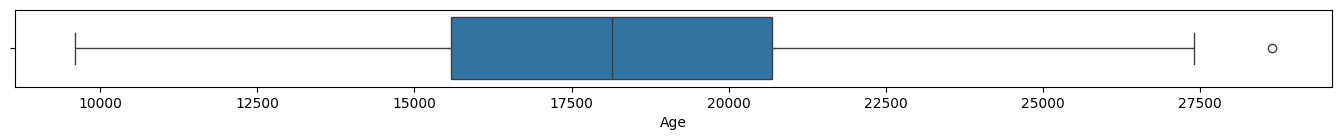

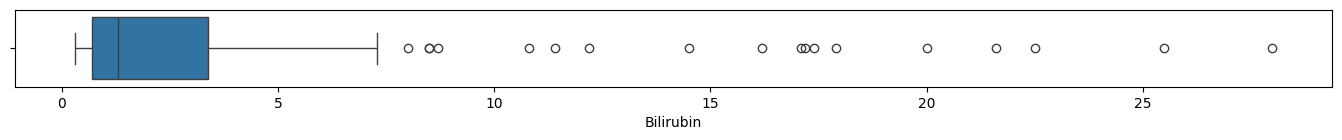

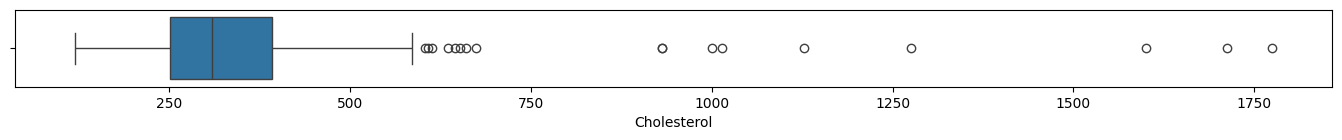

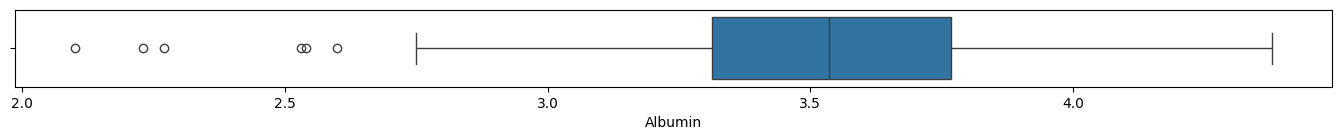

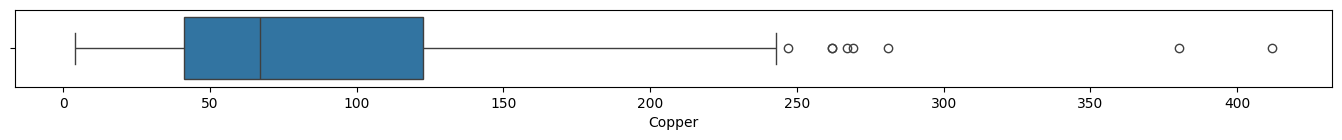

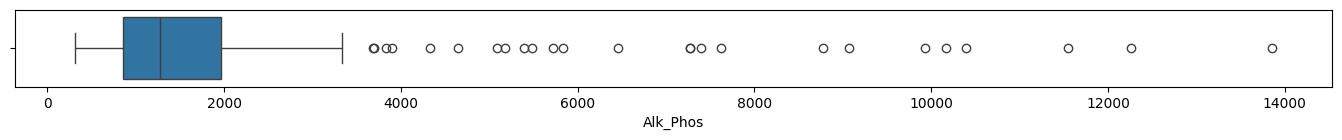

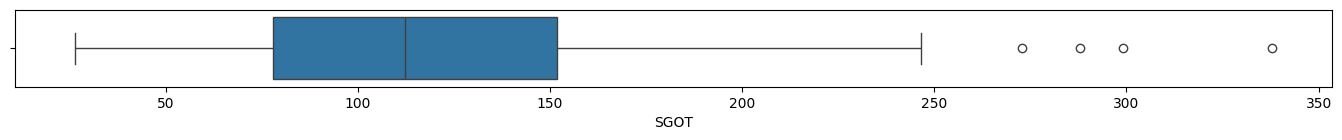

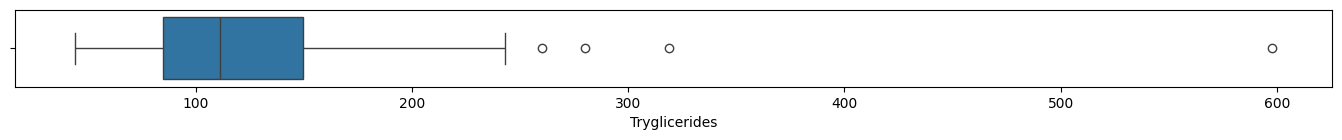

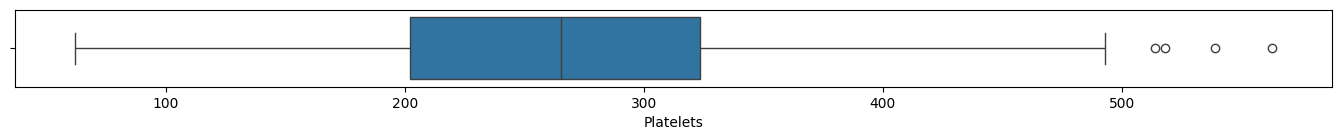

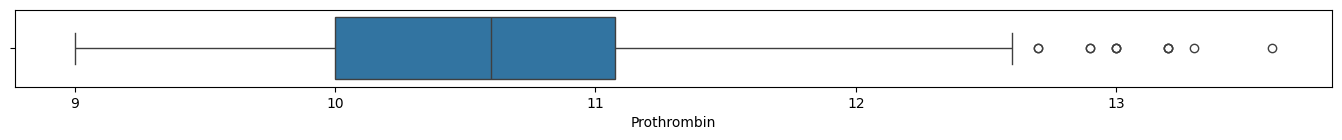

In [90]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in cirrhosis_survival_X_train_imputed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cirrhosis_survival_X_train_imputed_numeric, x=column)

### 1.4.4 Collinearity <a class="anchor" id="1.4.4"></a>

[Pearson’s Correlation Coefficient](https://royalsocietypublishing.org/doi/10.1098/rsta.1896.0007) is a parametric measure of the linear correlation for a pair of features by calculating the ratio between their covariance and the product of their standard deviations. The presence of high absolute correlation values indicate the univariate association between the numeric predictors and the numeric response.

1. All numeric variables in the training subset were retained since majority reported sufficiently moderate and statistically significant correlation with no excessive multicollinearity.
2. Among pairwise combinations of numeric variables in the training subset, the highest Pearson.Correlation.Coefficient values were noted for:
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">Copper</span>: Pearson.Correlation.Coefficient = +0.503
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">SGOT</span>: Pearson.Correlation.Coefficient = +0.444
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">Tryglicerides</span>: Pearson.Correlation.Coefficient = +0.389
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">Cholesterol</span>: Pearson.Correlation.Coefficient = +0.348
    * <span style="color: #FF0000">Birilubin</span> and <span style="color: #FF0000">Prothrombin</span>: Pearson.Correlation.Coefficient = +0.344

In [91]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
def plot_correlation_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, 
                ax=ax,
                mask=mask,
                annot=True, 
                vmin=-1, 
                vmax=1, 
                center=0,
                cmap='coolwarm', 
                linewidths=1, 
                linecolor='gray', 
                cbar_kws={'orientation': 'horizontal'}) 

In [92]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# among pairs of numeric columns
##################################
cirrhosis_survival_X_train_imputed_numeric_correlation_pairs = {}
cirrhosis_survival_X_train_imputed_numeric_columns = cirrhosis_survival_X_train_imputed_numeric.columns.tolist()
for numeric_column_a, numeric_column_b in itertools.combinations(cirrhosis_survival_X_train_imputed_numeric_columns, 2):
    cirrhosis_survival_X_train_imputed_numeric_correlation_pairs[numeric_column_a + '_' + numeric_column_b] = stats.pearsonr(
        cirrhosis_survival_X_train_imputed_numeric.loc[:, numeric_column_a], 
        cirrhosis_survival_X_train_imputed_numeric.loc[:, numeric_column_b])

In [93]:
##################################
# Formulating the pairwise correlation summary
# for all numeric columns
##################################
cirrhosis_survival_X_train_imputed_numeric_summary = cirrhosis_survival_X_train_imputed_numeric.from_dict(cirrhosis_survival_X_train_imputed_numeric_correlation_pairs, orient='index')
cirrhosis_survival_X_train_imputed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cirrhosis_survival_X_train_imputed_numeric_summary.sort_values(by=['Pearson.Correlation.Coefficient'], ascending=False).head(20))

,Pearson.Correlation.Coefficient,Correlation.PValue
Bilirubin_SGOT,0.503007,2.210899e-15
Bilirubin_Copper,0.444366,5.768566e-12
Bilirubin_Tryglicerides,0.389493,2.607951e-09
Bilirubin_Cholesterol,0.348174,1.311597e-07
Bilirubin_Prothrombin,0.344724,1.775156e-07
Copper_SGOT,0.305052,4.475849e-06
Cholesterol_SGOT,0.280530,2.635566e-05
Alk_Phos_Tryglicerides,0.265538,7.199789e-05
Cholesterol_Tryglicerides,0.257973,1.169491e-04
Copper_Tryglicerides,0.256448,1.287335e-04


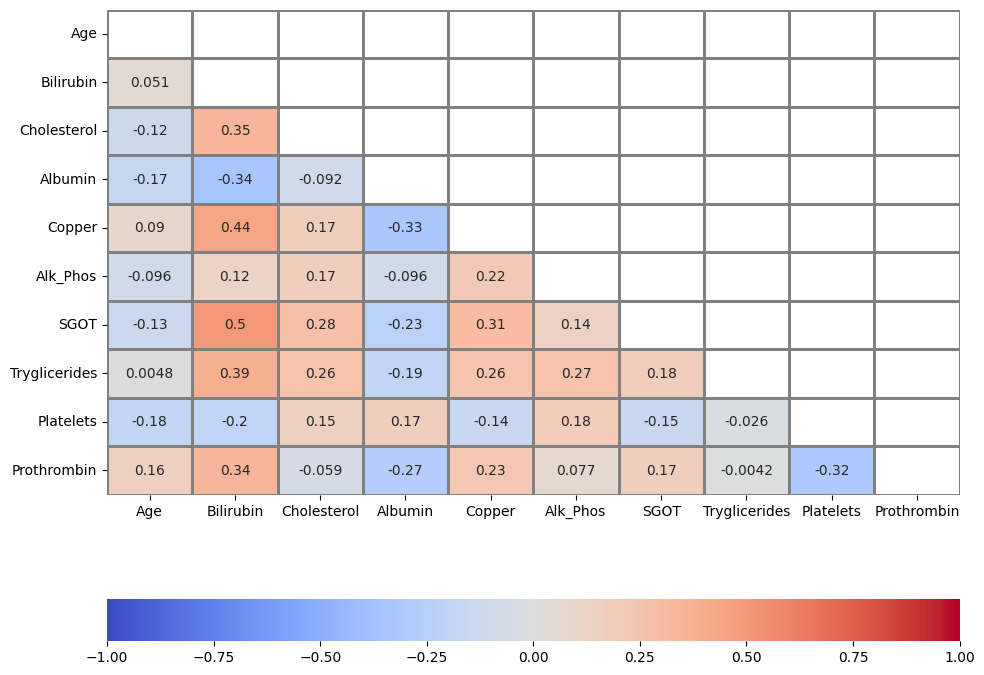

In [94]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
cirrhosis_survival_X_train_imputed_numeric_correlation = cirrhosis_survival_X_train_imputed_numeric.corr()
mask = np.triu(cirrhosis_survival_X_train_imputed_numeric_correlation)
plot_correlation_matrix(cirrhosis_survival_X_train_imputed_numeric_correlation,mask)
plt.show()

In [95]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
def correlation_significance(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

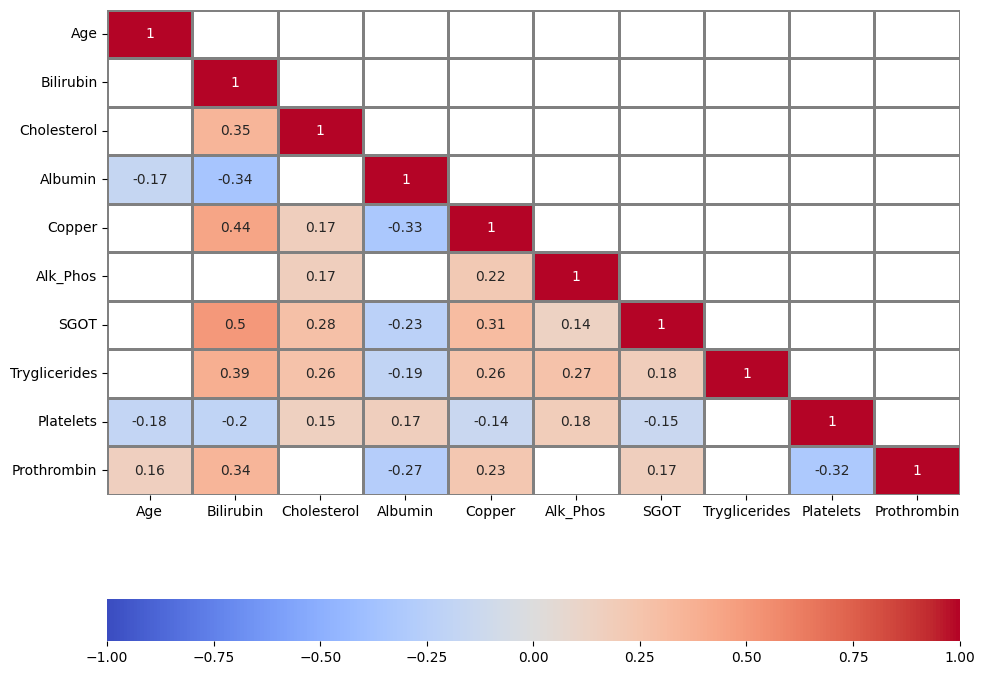

In [96]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
cirrhosis_survival_X_train_imputed_numeric_correlation_p_values = correlation_significance(cirrhosis_survival_X_train_imputed_numeric)                     
mask = np.invert(np.tril(cirrhosis_survival_X_train_imputed_numeric_correlation_p_values<0.05)) 
plot_correlation_matrix(cirrhosis_survival_X_train_imputed_numeric_correlation,mask)

### 1.4.5 Shape Transformation <a class="anchor" id="1.4.5"></a>

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A Yeo-Johnson transformation was applied to all numeric variables in the training subset to improve distributional shape.
2. Most variables in the training subset achieved symmetrical distributions with minimal outliers after transformation.
    * <span style="color: #FF0000">Cholesterol</span>: Outlier.Count = 9, Outlier.Ratio = 0.041, Skewness=-0.083
    * <span style="color: #FF0000">Albumin</span>: Outlier.Count = 4, Outlier.Ratio = 0.018, Skewness=+0.006
    * <span style="color: #FF0000">Platelets</span>: Outlier.Count = 2, Outlier.Ratio = 0.009, Skewness=-0.019
    * <span style="color: #FF0000">Age</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=+0.223
    * <span style="color: #FF0000">Copper</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=-0.010
    * <span style="color: #FF0000">Alk_Phos</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=+0.027
    * <span style="color: #FF0000">SGOT</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=-0.001
    * <span style="color: #FF0000">Tryglicerides</span>: Outlier.Count = 1, Outlier.Ratio = 0.004, Skewness=+0.000
3. Outlier data in the testing subset for numeric variables will be treated with Yeo-Johnson transformation downstream using a pipeline involving the final preprocessing steps.


In [97]:
##################################
# Formulating a data subset containing
# variables with noted outliers
##################################
X_train_predictors_with_outliers = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
cirrhosis_survival_X_train_imputed_numeric_with_outliers = cirrhosis_survival_X_train_imputed_numeric[X_train_predictors_with_outliers]

In [98]:
##################################
# Conducting a Yeo-Johnson Transformation
# to address the distributional
# shape of the variables
##################################
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',
                                          standardize=False)
cirrhosis_survival_X_train_imputed_numeric_with_outliers_array = yeo_johnson_transformer.fit_transform(cirrhosis_survival_X_train_imputed_numeric_with_outliers)

In [99]:
##################################
# Formulating a new dataset object
# for the transformed data
##################################
cirrhosis_survival_X_train_transformed_numeric_with_outliers = pd.DataFrame(cirrhosis_survival_X_train_imputed_numeric_with_outliers_array,
                                                                            columns=cirrhosis_survival_X_train_imputed_numeric_with_outliers.columns)
cirrhosis_survival_X_train_transformed_numeric = pd.concat([cirrhosis_survival_X_train_imputed_numeric[['Age']],
                                                            cirrhosis_survival_X_train_transformed_numeric_with_outliers], 
                                                           axis=1)

In [100]:
cirrhosis_survival_X_train_transformed_numeric.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,13329,0.830251,1.528771,25.311621,4.367652,2.066062,7.115310,3.357597,58.787709,0.236575
1,12912,0.751147,1.535175,34.049208,6.244827,2.047167,7.303237,3.581345,57.931137,0.236572
2,17180,0.491099,1.523097,32.812930,5.320861,2.043970,7.278682,2.990077,61.554228,0.236573
3,17884,0.760957,1.505627,30.818146,5.264915,2.062590,7.170942,3.288822,29.648190,0.236575
4,15177,0.893603,1.519249,26.533792,6.440904,2.109170,8.385199,3.284119,43.198326,0.236572


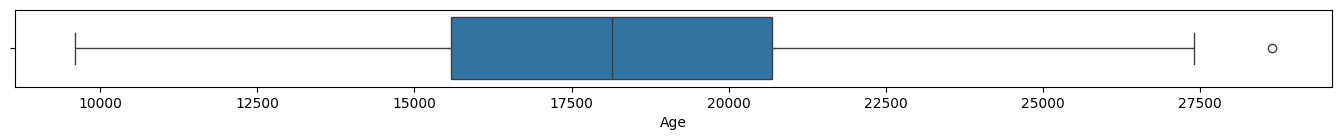

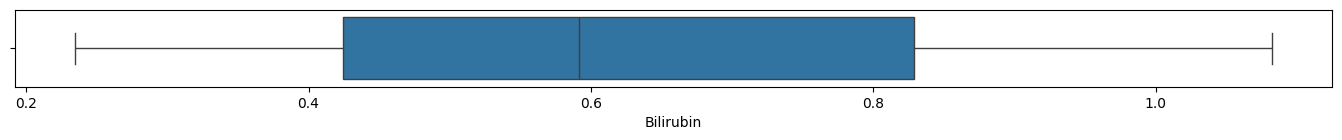

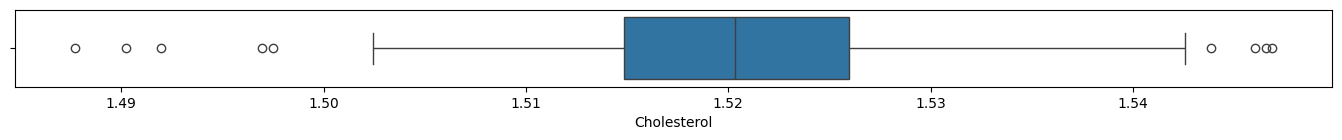

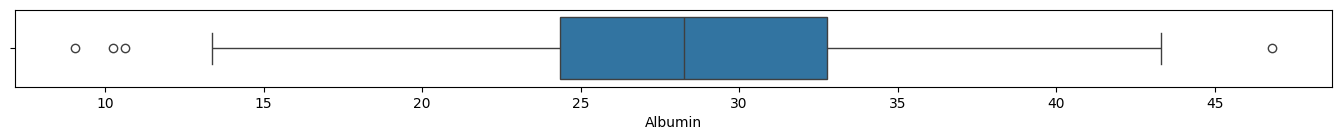

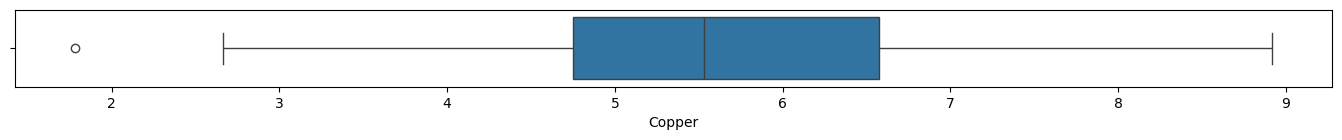

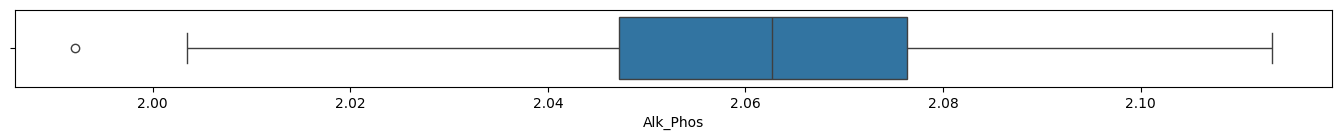

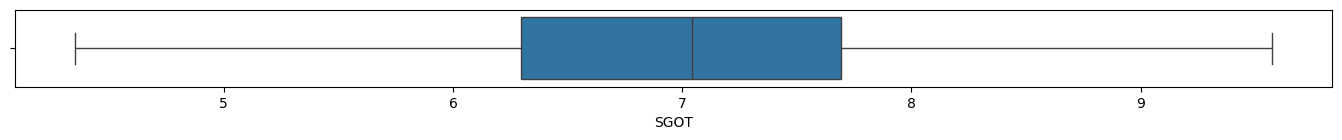

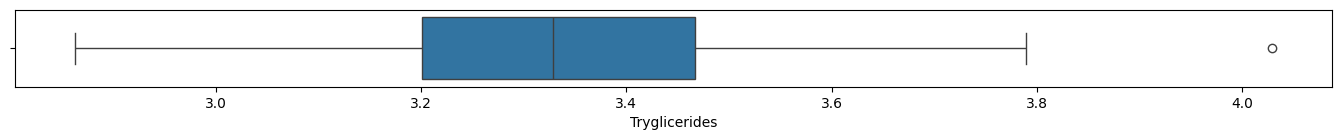

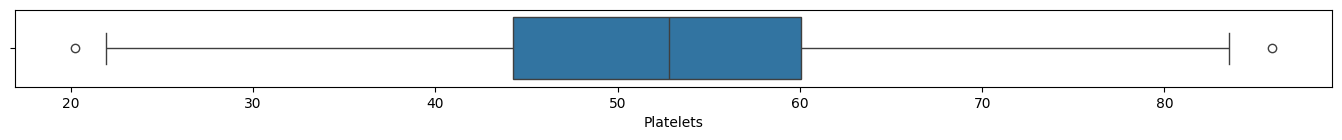

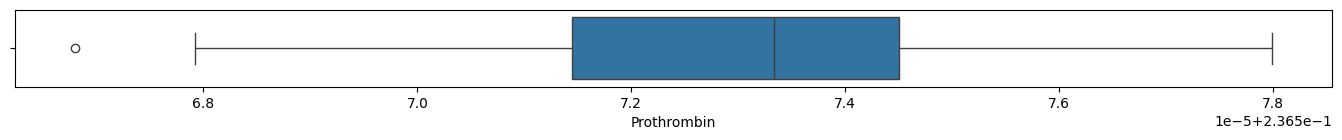

In [101]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cirrhosis_survival_X_train_transformed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cirrhosis_survival_X_train_transformed_numeric, x=column)

In [102]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
X_train_numeric_variable_name_list = list(cirrhosis_survival_X_train_transformed_numeric.columns)
X_train_numeric_skewness_list = cirrhosis_survival_X_train_transformed_numeric.skew()
cirrhosis_survival_X_train_transformed_numeric_q1 = cirrhosis_survival_X_train_transformed_numeric.quantile(0.25)
cirrhosis_survival_X_train_transformed_numeric_q3 = cirrhosis_survival_X_train_transformed_numeric.quantile(0.75)
cirrhosis_survival_X_train_transformed_numeric_iqr = cirrhosis_survival_X_train_transformed_numeric_q3 - cirrhosis_survival_X_train_transformed_numeric_q1
X_train_numeric_outlier_count_list = ((cirrhosis_survival_X_train_transformed_numeric < (cirrhosis_survival_X_train_transformed_numeric_q1 - 1.5 * cirrhosis_survival_X_train_transformed_numeric_iqr)) | (cirrhosis_survival_X_train_transformed_numeric > (cirrhosis_survival_X_train_transformed_numeric_q3 + 1.5 * cirrhosis_survival_X_train_transformed_numeric_iqr))).sum()
X_train_numeric_row_count_list = list([len(cirrhosis_survival_X_train_transformed_numeric)] * len(cirrhosis_survival_X_train_transformed_numeric.columns))
X_train_numeric_outlier_ratio_list = map(truediv, X_train_numeric_outlier_count_list, X_train_numeric_row_count_list)

X_train_numeric_column_outlier_summary = pd.DataFrame(zip(X_train_numeric_variable_name_list,
                                                          X_train_numeric_skewness_list,
                                                          X_train_numeric_outlier_count_list,
                                                          X_train_numeric_row_count_list,
                                                          X_train_numeric_outlier_ratio_list),                                                      
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(X_train_numeric_column_outlier_summary.sort_values(by=['Outlier.Count'], ascending=False))

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
2,Cholesterol,-0.083072,9,218,0.041284
3,Albumin,0.006523,4,218,0.018349
8,Platelets,-0.019323,2,218,0.009174
0,Age,0.223080,1,218,0.004587
4,Copper,-0.010240,1,218,0.004587
5,Alk_Phos,0.027977,1,218,0.004587
7,Tryglicerides,-0.000881,1,218,0.004587
9,Prothrombin,0.000000,1,218,0.004587
1,Bilirubin,0.263101,0,218,0.000000
6,SGOT,-0.008416,0,218,0.000000


### 1.4.6 Centering and Scaling <a class="anchor" id="1.4.6"></a>

1. All numeric variables in the training subset were transformed using the standardization method to achieve a comparable scale between values.
2. Original data in the testing subset for numeric variables will be treated with standardization scaling downstream using a pipeline involving the final preprocessing steps.

In [103]:
##################################
# Conducting standardization
# to transform the values of the 
# variables into comparable scale
##################################
standardization_scaler = StandardScaler()
cirrhosis_survival_X_train_transformed_numeric_array = standardization_scaler.fit_transform(cirrhosis_survival_X_train_transformed_numeric)

In [104]:
##################################
# Formulating a new dataset object
# for the scaled data
##################################
cirrhosis_survival_X_train_scaled_numeric = pd.DataFrame(cirrhosis_survival_X_train_transformed_numeric_array,
                                                         columns=cirrhosis_survival_X_train_transformed_numeric.columns)

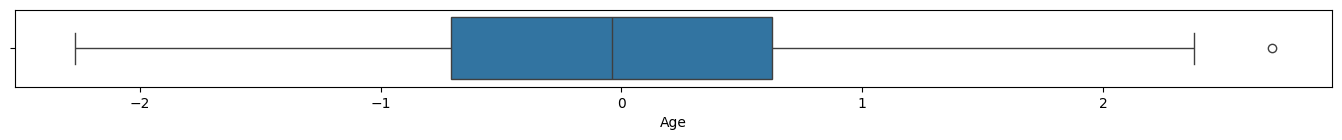

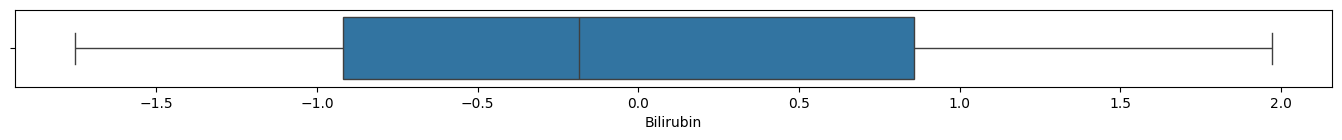

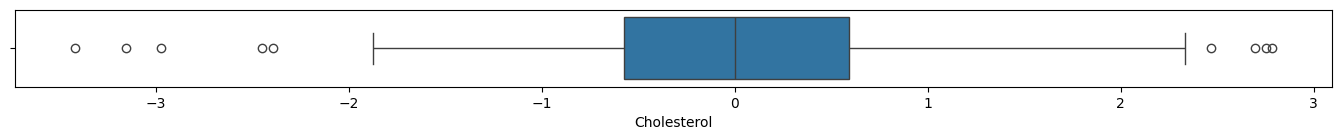

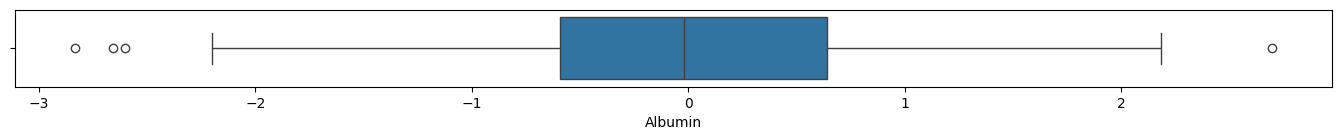

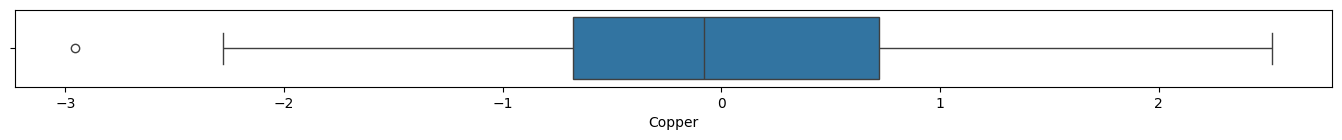

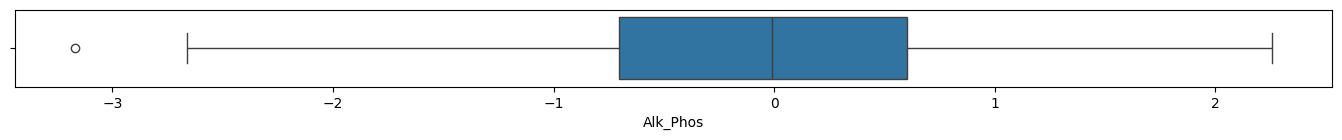

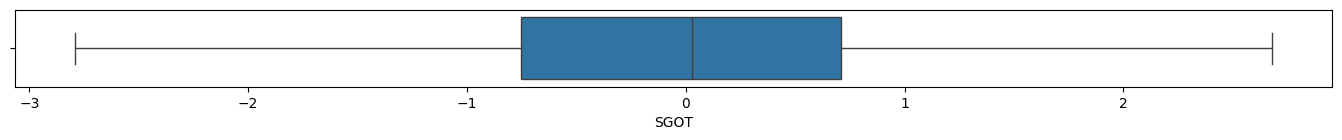

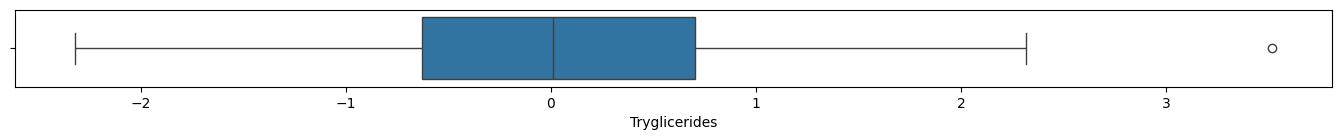

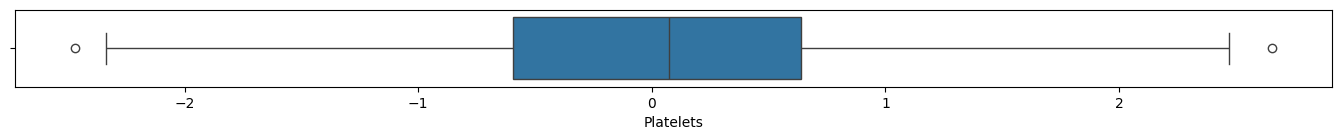

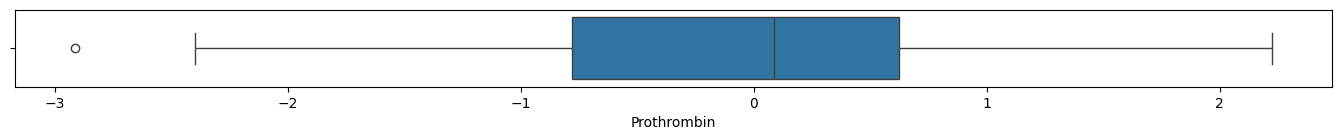

In [105]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cirrhosis_survival_X_train_scaled_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cirrhosis_survival_X_train_scaled_numeric, x=column)

### 1.4.7 Data Encoding <a class="anchor" id="1.4.7"></a>

1. Binary encoding was applied to the predictor object columns in the training subset:
    * <span style="color: #FF0000">Status</span>
    * <span style="color: #FF0000">Drug</span>
    * <span style="color: #FF0000">Sex</span>
    * <span style="color: #FF0000">Ascites</span>
    * <span style="color: #FF0000">Hepatomegaly</span>
    * <span style="color: #FF0000">Spiders</span>
    * <span style="color: #FF0000">Edema</span>
1. One-hot encoding was applied to the <span style="color: #FF0000">Stage</span> variable resulting to 4 additional columns in the training subset:
    * <span style="color: #FF0000">Stage_1.0</span>
    * <span style="color: #FF0000">Stage_2.0</span>
    * <span style="color: #FF0000">Stage_3.0</span>
    * <span style="color: #FF0000">Stage_4.0</span>
3. Original data in the testing subset for object variables will be treated with binary and one-hot encoding downstream using a pipeline involving the final preprocessing steps.

In [106]:
##################################
# Applying a binary encoding transformation
# for the two-level object columns
##################################
cirrhosis_survival_X_train_cleaned_object['Sex'] = cirrhosis_survival_X_train_cleaned_object['Sex'].replace({'M':0, 'F':1}) 
cirrhosis_survival_X_train_cleaned_object['Ascites'] = cirrhosis_survival_X_train_cleaned_object['Ascites'].replace({'N':0, 'Y':1}) 
cirrhosis_survival_X_train_cleaned_object['Drug'] = cirrhosis_survival_X_train_cleaned_object['Drug'].replace({'Placebo':0, 'D-penicillamine':1}) 
cirrhosis_survival_X_train_cleaned_object['Hepatomegaly'] = cirrhosis_survival_X_train_cleaned_object['Hepatomegaly'].replace({'N':0, 'Y':1}) 
cirrhosis_survival_X_train_cleaned_object['Spiders'] = cirrhosis_survival_X_train_cleaned_object['Spiders'].replace({'N':0, 'Y':1}) 
cirrhosis_survival_X_train_cleaned_object['Edema'] = cirrhosis_survival_X_train_cleaned_object['Edema'].replace({'N':0, 'Y':1, 'S':1}) 

In [107]:
##################################
# Formulating the multi-level object column stage
# for encoding transformation
##################################
cirrhosis_survival_X_train_cleaned_object_stage_encoded = pd.DataFrame(cirrhosis_survival_X_train_cleaned_object.loc[:, 'Stage'].to_list(),
                                                                       columns=['Stage'])

In [108]:
##################################
# Applying a one-hot encoding transformation
# for the multi-level object column stage
##################################
cirrhosis_survival_X_train_cleaned_object_stage_encoded = pd.get_dummies(cirrhosis_survival_X_train_cleaned_object_stage_encoded, columns=['Stage'])

In [109]:
##################################
# Applying a one-hot encoding transformation
# for the multi-level object column stage
##################################
cirrhosis_survival_X_train_cleaned_encoded_object = pd.concat([cirrhosis_survival_X_train_cleaned_object.drop(['Stage'], axis=1), 
                                                               cirrhosis_survival_X_train_cleaned_object_stage_encoded], axis=1)
cirrhosis_survival_X_train_cleaned_encoded_object.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,1,1,0,0,0,0,False,True,False,False
1,1,0,0,0,0,0,False,False,True,False
2,1,1,0,0,0,0,False,True,False,False
3,0,1,1,1,1,1,False,False,False,True
4,0,1,0,1,0,0,False,True,False,False


### 1.4.8 Preprocessed Data Description <a class="anchor" id="1.4.8"></a>

1. A preprocessing pipeline was formulated to standardize the data transformation methods applied to both the training and testing subsets.
2. The preprocessed training subset is comprised of:
    * **218 rows** (observations)
    * **22 columns** (variables)
        * **2/22 event | duration** (boolean | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/22 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **10/21 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage_1.0</span>
             * <span style="color: #FF0000">Stage_2.0</span>
             * <span style="color: #FF0000">Stage_3.0</span>
             * <span style="color: #FF0000">Stage_4.0</span>
3. The preprocessed testing subset is comprised of:
    * **94 rows** (observations)
    * **22 columns** (variables)
        * **2/22 event | duration** (boolean | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/22 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **10/21 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage_1.0</span>
             * <span style="color: #FF0000">Stage_2.0</span>
             * <span style="color: #FF0000">Stage_3.0</span>
             * <span style="color: #FF0000">Stage_4.0</span>

In [110]:
##################################
# Consolidating all preprocessed
# numeric and object predictors
# for the training subset
##################################
cirrhosis_survival_X_train_preprocessed = pd.concat([cirrhosis_survival_X_train_scaled_numeric,
                                                     cirrhosis_survival_X_train_cleaned_encoded_object], 
                                                     axis=1)
cirrhosis_survival_X_train_preprocessed.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,-1.296446,0.863802,0.885512,-0.451884,-0.971563,0.140990,0.104609,0.155256,0.539120,0.747580,1,1,0,0,0,0,False,True,False,False
1,-1.405311,0.516350,1.556983,0.827618,0.468389,-0.705337,0.301441,1.275281,0.472266,-0.315794,1,0,0,0,0,0,False,False,True,False
2,-0.291081,-0.625875,0.290561,0.646582,-0.240371,-0.848544,0.275723,-1.684460,0.755044,0.087130,1,1,0,0,0,0,False,True,False,False
3,-0.107291,0.559437,-1.541148,0.354473,-0.283286,-0.014525,0.162878,-0.189015,-1.735183,0.649171,0,1,1,1,1,1,False,False,False,True
4,-0.813996,1.142068,-0.112859,-0.272913,0.618797,2.071847,1.434674,-0.212560,-0.677612,-0.315794,0,1,0,1,0,0,False,True,False,False


In [111]:
##################################
# Creating a pre-processing pipeline
# for numeric predictors
##################################
cirrhosis_survival_numeric_predictors = ['Age', 'Bilirubin','Cholesterol', 'Albumin','Copper', 'Alk_Phos','SGOT', 'Tryglicerides','Platelets', 'Prothrombin']
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator = lr,
                                 max_iter = 10,
                                 tol = 1e-10,
                                 imputation_order = 'ascending',
                                 random_state=88888888)),
    ('yeo_johnson', PowerTransformer(method='yeo-johnson',
                                    standardize=False)),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, cirrhosis_survival_numeric_predictors)])

In [112]:
##################################
# Fitting and transforming 
# training subset numeric predictors
##################################
cirrhosis_survival_X_train_numeric_preprocessed = preprocessor.fit_transform(cirrhosis_survival_X_train_cleaned)
cirrhosis_survival_X_train_numeric_preprocessed = pd.DataFrame(cirrhosis_survival_X_train_numeric_preprocessed,
                                                                columns=cirrhosis_survival_numeric_predictors)
cirrhosis_survival_X_train_numeric_preprocessed.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,-1.342097,0.863802,0.886087,-0.451884,-0.972098,0.140990,0.104609,0.155130,0.540960,0.747580
1,-1.470901,0.516350,1.554523,0.827618,0.467579,-0.705337,0.301441,1.275222,0.474140,-0.315794
2,-0.239814,-0.625875,0.293280,0.646582,-0.241205,-0.848544,0.275723,-1.684460,0.756741,0.087130
3,-0.052733,0.559437,-1.534283,0.354473,-0.284113,-0.014525,0.162878,-0.189139,-1.735375,0.649171
4,-0.795010,1.142068,-0.108933,-0.272913,0.618030,2.071847,1.434674,-0.212684,-0.675951,-0.315794


In [113]:
##################################
# Performing pre-processing operations
# for object predictors
# in the training subset
##################################
cirrhosis_survival_object_predictors = ['Drug', 'Sex','Ascites', 'Hepatomegaly','Spiders', 'Edema','Stage']
cirrhosis_survival_X_train_object = cirrhosis_survival_X_train_cleaned.copy()
cirrhosis_survival_X_train_object = cirrhosis_survival_X_train_object[cirrhosis_survival_object_predictors]
cirrhosis_survival_X_train_object.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_train_object.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
0,D-penicillamine,F,N,N,N,N,2.0
1,D-penicillamine,M,N,N,N,N,3.0
2,D-penicillamine,F,N,N,N,N,2.0
3,Placebo,F,Y,Y,Y,Y,4.0
4,Placebo,F,N,Y,N,N,2.0


In [114]:
##################################
# Applying a binary encoding transformation
# for the two-level object columns
# in the training subset
##################################
cirrhosis_survival_X_train_object['Sex'].replace({'M':0, 'F':1}, inplace=True) 
cirrhosis_survival_X_train_object['Ascites'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_train_object['Drug'].replace({'Placebo':0, 'D-penicillamine':1}, inplace=True) 
cirrhosis_survival_X_train_object['Hepatomegaly'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_train_object['Spiders'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_train_object['Edema'].replace({'N':0, 'Y':1, 'S':1}, inplace=True) 
cirrhosis_survival_X_train_object_stage_encoded = pd.DataFrame(cirrhosis_survival_X_train_object.loc[:, 'Stage'].to_list(),
                                                                       columns=['Stage'])
cirrhosis_survival_X_train_object_stage_encoded = pd.get_dummies(cirrhosis_survival_X_train_object_stage_encoded, columns=['Stage'])
cirrhosis_survival_X_train_object_preprocessed = pd.concat([cirrhosis_survival_X_train_object.drop(['Stage'], axis=1), 
                                                            cirrhosis_survival_X_train_object_stage_encoded], 
                                                           axis=1)
cirrhosis_survival_X_train_object_preprocessed.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,1,1,0,0,0,0,False,True,False,False
1,1,0,0,0,0,0,False,False,True,False
2,1,1,0,0,0,0,False,True,False,False
3,0,1,1,1,1,1,False,False,False,True
4,0,1,0,1,0,0,False,True,False,False


In [115]:
##################################
# Consolidating the preprocessed
# training subset
##################################
cirrhosis_survival_X_train_preprocessed = pd.concat([cirrhosis_survival_X_train_numeric_preprocessed, cirrhosis_survival_X_train_object_preprocessed], 
                                                    axis=1)
cirrhosis_survival_X_train_preprocessed.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,-1.342097,0.863802,0.886087,-0.451884,-0.972098,0.140990,0.104609,0.155130,0.540960,0.747580,1,1,0,0,0,0,False,True,False,False
1,-1.470901,0.516350,1.554523,0.827618,0.467579,-0.705337,0.301441,1.275222,0.474140,-0.315794,1,0,0,0,0,0,False,False,True,False
2,-0.239814,-0.625875,0.293280,0.646582,-0.241205,-0.848544,0.275723,-1.684460,0.756741,0.087130,1,1,0,0,0,0,False,True,False,False
3,-0.052733,0.559437,-1.534283,0.354473,-0.284113,-0.014525,0.162878,-0.189139,-1.735375,0.649171,0,1,1,1,1,1,False,False,False,True
4,-0.795010,1.142068,-0.108933,-0.272913,0.618030,2.071847,1.434674,-0.212684,-0.675951,-0.315794,0,1,0,1,0,0,False,True,False,False


In [116]:
##################################
# Verifying the dimensions of the
# preprocessed training subset
##################################
cirrhosis_survival_X_train_preprocessed.shape

(218, 20)

In [117]:
##################################
# Fitting and transforming 
# testing subset numeric predictors
##################################
cirrhosis_survival_X_test_numeric_preprocessed = preprocessor.transform(cirrhosis_survival_X_test_cleaned)
cirrhosis_survival_X_test_numeric_preprocessed = pd.DataFrame(cirrhosis_survival_X_test_numeric_preprocessed,
                                                                columns=cirrhosis_survival_numeric_predictors)
cirrhosis_survival_X_test_numeric_preprocessed.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1.043704,0.744396,0.922380,0.240951,0.045748,0.317282,-0.078335,2.671950,1.654815,-0.948196
1,-1.936476,-0.764558,0.160096,-0.600950,-0.179138,-0.245613,0.472422,-0.359800,0.348533,0.439089
2,-1.749033,0.371523,0.558115,0.646582,-0.159024,0.339454,0.685117,-3.109146,-0.790172,-0.617113
3,-0.485150,-0.918484,-0.690904,1.629765,0.028262,1.713791,-1.387751,0.155130,0.679704,0.087130
4,-0.815655,1.286438,2.610501,-0.722153,0.210203,0.602860,3.494936,-0.053214,-0.475634,-1.714435


In [118]:
##################################
# Performing pre-processing operations
# for object predictors
# in the testing subset
##################################
cirrhosis_survival_object_predictors = ['Drug', 'Sex','Ascites', 'Hepatomegaly','Spiders', 'Edema','Stage']
cirrhosis_survival_X_test_object = cirrhosis_survival_X_test_cleaned.copy()
cirrhosis_survival_X_test_object = cirrhosis_survival_X_test_object[cirrhosis_survival_object_predictors]
cirrhosis_survival_X_test_object.reset_index(drop=True, inplace=True)
cirrhosis_survival_X_test_object.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
0,D-penicillamine,F,N,N,Y,S,3.0
1,Placebo,F,N,N,N,N,4.0
2,D-penicillamine,F,N,Y,N,N,4.0
3,D-penicillamine,M,N,N,N,N,1.0
4,Placebo,F,N,Y,N,N,2.0


In [119]:
##################################
# Applying a binary encoding transformation
# for the two-level object columns
# in the testing subset
##################################
cirrhosis_survival_X_test_object['Sex'].replace({'M':0, 'F':1}, inplace=True) 
cirrhosis_survival_X_test_object['Ascites'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_test_object['Drug'].replace({'Placebo':0, 'D-penicillamine':1}, inplace=True) 
cirrhosis_survival_X_test_object['Hepatomegaly'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_test_object['Spiders'].replace({'N':0, 'Y':1}, inplace=True) 
cirrhosis_survival_X_test_object['Edema'].replace({'N':0, 'Y':1, 'S':1}, inplace=True) 
cirrhosis_survival_X_test_object_stage_encoded = pd.DataFrame(cirrhosis_survival_X_test_object.loc[:, 'Stage'].to_list(),
                                                                       columns=['Stage'])
cirrhosis_survival_X_test_object_stage_encoded = pd.get_dummies(cirrhosis_survival_X_test_object_stage_encoded, columns=['Stage'])
cirrhosis_survival_X_test_object_preprocessed = pd.concat([cirrhosis_survival_X_test_object.drop(['Stage'], axis=1), 
                                                            cirrhosis_survival_X_test_object_stage_encoded], 
                                                           axis=1)
cirrhosis_survival_X_test_object_preprocessed.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,1,1,0,0,1,1,False,False,True,False
1,0,1,0,0,0,0,False,False,False,True
2,1,1,0,1,0,0,False,False,False,True
3,1,0,0,0,0,0,True,False,False,False
4,0,1,0,1,0,0,False,True,False,False


In [120]:
##################################
# Consolidating the preprocessed
# testing subset
##################################
cirrhosis_survival_X_test_preprocessed = pd.concat([cirrhosis_survival_X_test_numeric_preprocessed, cirrhosis_survival_X_test_object_preprocessed], 
                                                    axis=1)
cirrhosis_survival_X_test_preprocessed.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,1.043704,0.744396,0.922380,0.240951,0.045748,0.317282,-0.078335,2.671950,1.654815,-0.948196,1,1,0,0,1,1,False,False,True,False
1,-1.936476,-0.764558,0.160096,-0.600950,-0.179138,-0.245613,0.472422,-0.359800,0.348533,0.439089,0,1,0,0,0,0,False,False,False,True
2,-1.749033,0.371523,0.558115,0.646582,-0.159024,0.339454,0.685117,-3.109146,-0.790172,-0.617113,1,1,0,1,0,0,False,False,False,True
3,-0.485150,-0.918484,-0.690904,1.629765,0.028262,1.713791,-1.387751,0.155130,0.679704,0.087130,1,0,0,0,0,0,True,False,False,False
4,-0.815655,1.286438,2.610501,-0.722153,0.210203,0.602860,3.494936,-0.053214,-0.475634,-1.714435,0,1,0,1,0,0,False,True,False,False


In [121]:
##################################
# Verifying the dimensions of the
# preprocessed testing subset
##################################
cirrhosis_survival_X_test_preprocessed.shape

(94, 20)

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. The estimated baseline survival plot indicated a 50% survival rate at <span style="color: #FF0000">N_Days=3358</span>.
2. Bivariate analysis identified individual predictors with potential association to the event status based on visual inspection.
    * Higher values for the following numeric predictors are associated with <span style="color: #FF0000">Status=True</span>: 
        * <span style="color: #FF0000">Age</span>
        * <span style="color: #FF0000">Bilirubin</span>   
        * <span style="color: #FF0000">Copper</span>
        * <span style="color: #FF0000">Alk_Phos</span> 
        * <span style="color: #FF0000">SGOT</span>   
        * <span style="color: #FF0000">Tryglicerides</span> 
        * <span style="color: #FF0000">Prothrombin</span>    
    * Higher counts for the following object predictors are associated with better differentiation between <span style="color: #FF0000">Status=True</span> and <span style="color: #FF0000">Status=False</span>:  
        * <span style="color: #FF0000">Drug</span>
        * <span style="color: #FF0000">Sex</span>
        * <span style="color: #FF0000">Ascites</span>
        * <span style="color: #FF0000">Hepatomegaly</span>
        * <span style="color: #FF0000">Spiders</span>
        * <span style="color: #FF0000">Edema</span>
        * <span style="color: #FF0000">Stage_1.0</span>
        * <span style="color: #FF0000">Stage_2.0</span>
        * <span style="color: #FF0000">Stage_3.0</span>
        * <span style="color: #FF0000">Stage_4.0</span>
2. Bivariate analysis identified individual predictors with potential association to the survival time based on visual inspection.
    * Higher values for the following numeric predictors are positively associated with <span style="color: #FF0000">N_Days</span>: 
        * <span style="color: #FF0000">Albumin</span>        
        * <span style="color: #FF0000">Platelets</span>
    * Levels for the following object predictors are associated with differences in <span style="color: #FF0000">N_Days</span> between <span style="color: #FF0000">Status=True</span> and <span style="color: #FF0000">Status=False</span>:  
        * <span style="color: #FF0000">Drug</span>
        * <span style="color: #FF0000">Sex</span>
        * <span style="color: #FF0000">Ascites</span>
        * <span style="color: #FF0000">Hepatomegaly</span>
        * <span style="color: #FF0000">Spiders</span>
        * <span style="color: #FF0000">Edema</span>
        * <span style="color: #FF0000">Stage_1.0</span>
        * <span style="color: #FF0000">Stage_2.0</span>
        * <span style="color: #FF0000">Stage_3.0</span>
        * <span style="color: #FF0000">Stage_4.0</span>

In [122]:
##################################
# Formulating a complete dataframe
# from the training subset for EDA
##################################
cirrhosis_survival_y_train_cleaned.reset_index(drop=True, inplace=True)
cirrhosis_survival_train_EDA = pd.concat([cirrhosis_survival_y_train_cleaned,
                                          cirrhosis_survival_X_train_preprocessed],
                                         axis=1)
cirrhosis_survival_train_EDA.head()

,Status,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,False,2475,-1.342097,0.863802,0.886087,-0.451884,-0.972098,0.140990,0.104609,0.155130,...,1,1,0,0,0,0,False,True,False,False
1,False,877,-1.470901,0.516350,1.554523,0.827618,0.467579,-0.705337,0.301441,1.275222,...,1,0,0,0,0,0,False,False,True,False
2,False,3050,-0.239814,-0.625875,0.293280,0.646582,-0.241205,-0.848544,0.275723,-1.684460,...,1,1,0,0,0,0,False,True,False,False
3,True,110,-0.052733,0.559437,-1.534283,0.354473,-0.284113,-0.014525,0.162878,-0.189139,...,0,1,1,1,1,1,False,False,False,True
4,True,3839,-0.795010,1.142068,-0.108933,-0.272913,0.618030,2.071847,1.434674,-0.212684,...,0,1,0,1,0,0,False,True,False,False


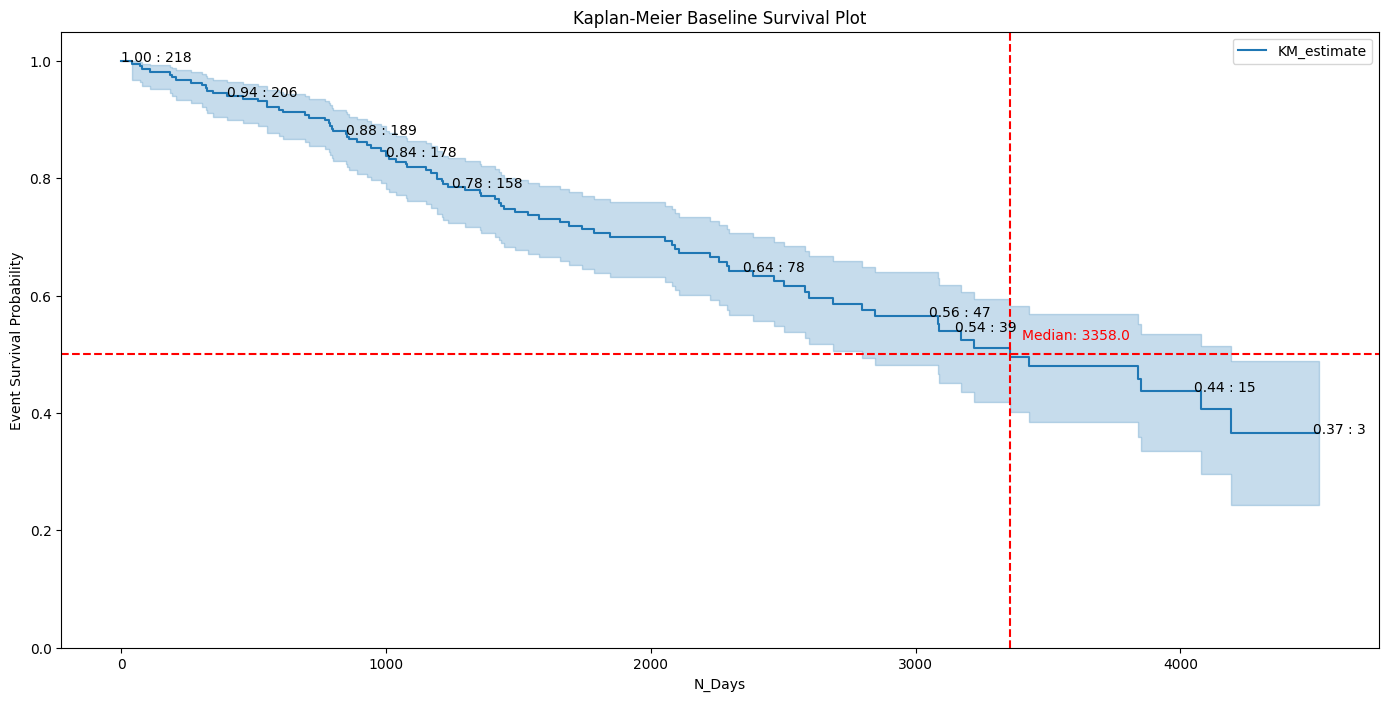

In [123]:
##################################
# Plotting the baseline survival curve
# and computing the survival rates
##################################
kmf = KaplanMeierFitter()
kmf.fit(durations=cirrhosis_survival_train_EDA['N_Days'], event_observed=cirrhosis_survival_train_EDA['Status'])
plt.figure(figsize=(17, 8))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Baseline Survival Plot')
plt.ylim(0, 1.05)
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')

##################################
# Determing the at-risk numbers
##################################
at_risk_counts = kmf.event_table.at_risk
survival_probabilities = kmf.survival_function_.values.flatten()
time_points = kmf.survival_function_.index
for time, prob, at_risk in zip(time_points, survival_probabilities, at_risk_counts):
    if time % 50 == 0: 
        plt.text(time, prob, f'{prob:.2f} : {at_risk}', ha='left', fontsize=10)
median_survival_time = kmf.median_survival_time_
plt.axvline(x=median_survival_time, color='r', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.text(3400, 0.52, f'Median: {median_survival_time}', ha='left', va='bottom', color='r', fontsize=10)
plt.show()

In [124]:
##################################
# Computing the median survival time
##################################
median_survival_time = kmf.median_survival_time_
print(f'Median Survival Time: {median_survival_time}')

Median Survival Time: 3358.0


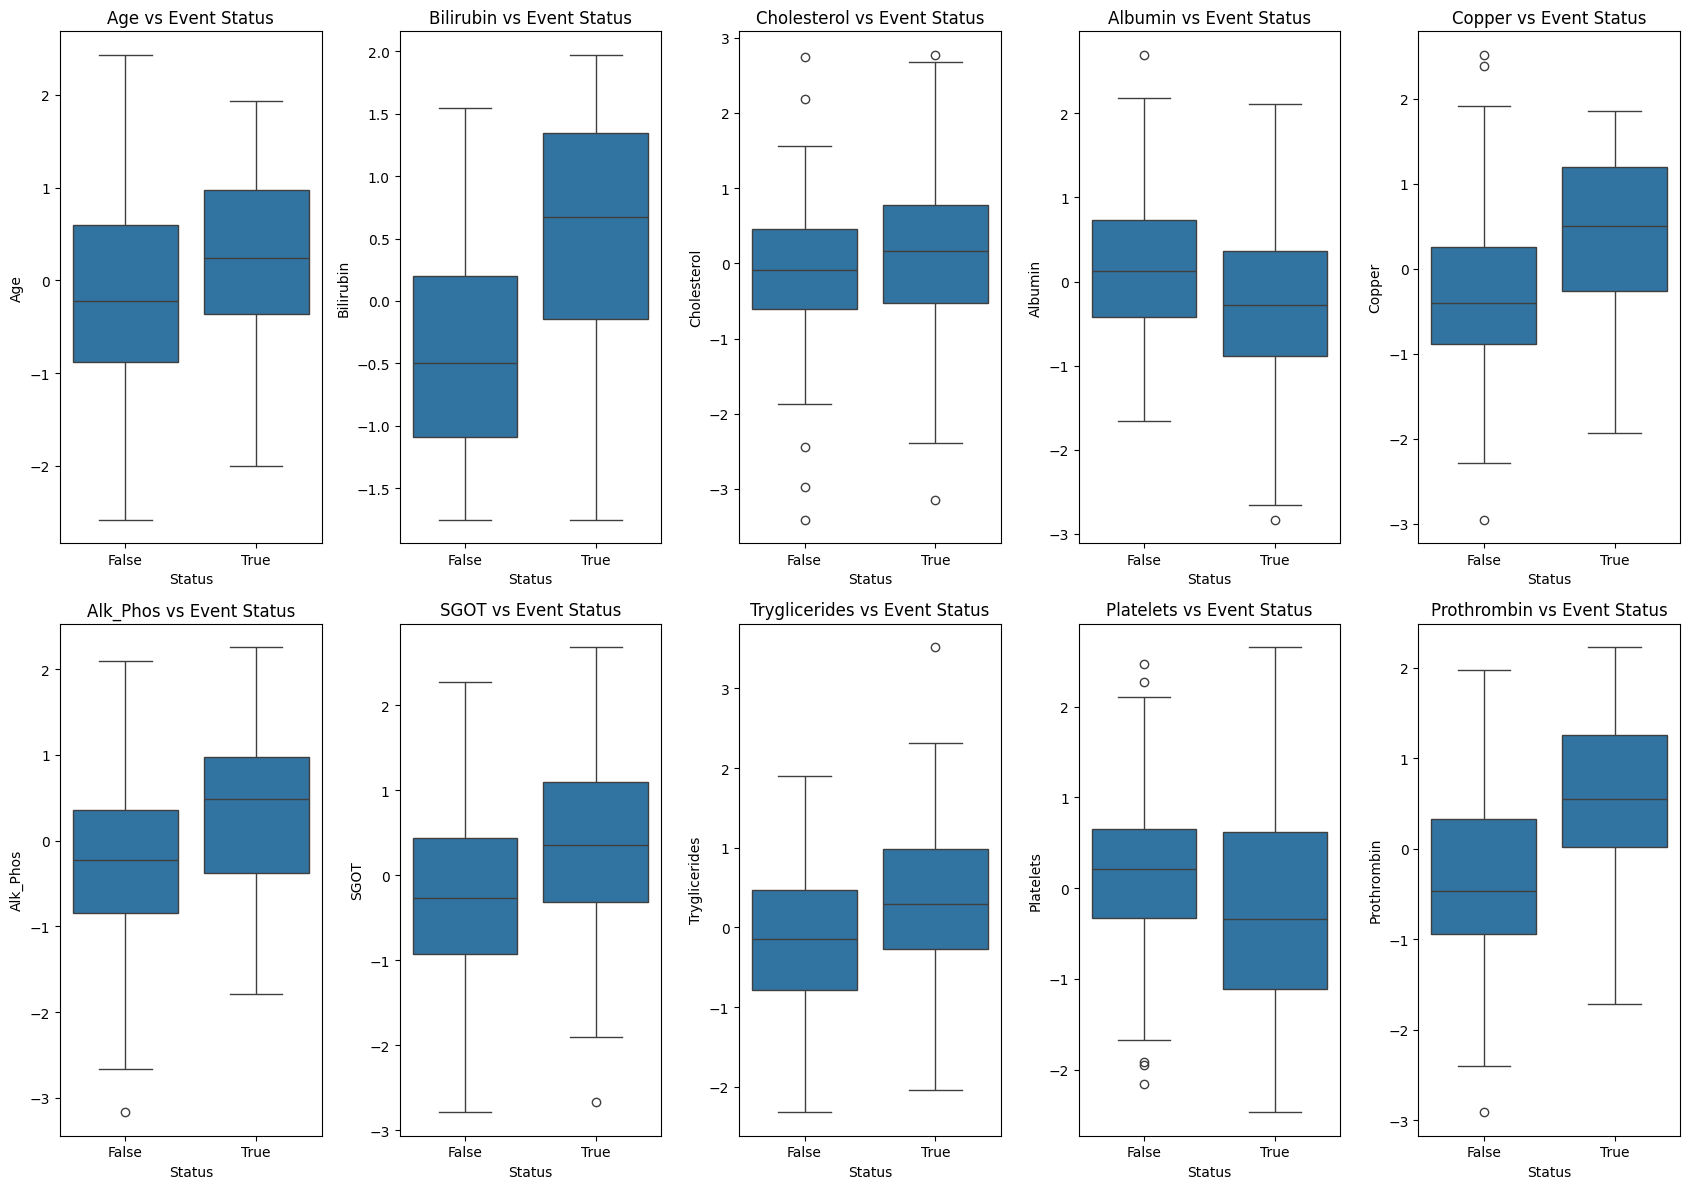

In [125]:
##################################
# Exploring the relationships between
# the numeric predictors and event status
##################################
cirrhosis_survival_numeric_predictors = ['Age', 'Bilirubin','Cholesterol', 'Albumin','Copper', 'Alk_Phos','SGOT', 'Tryglicerides','Platelets', 'Prothrombin']
plt.figure(figsize=(17, 12))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.boxplot(x='Status', y=cirrhosis_survival_numeric_predictors[i-1], data=cirrhosis_survival_train_EDA)
    plt.title(f'{cirrhosis_survival_numeric_predictors[i-1]} vs Event Status')
plt.tight_layout()
plt.show()

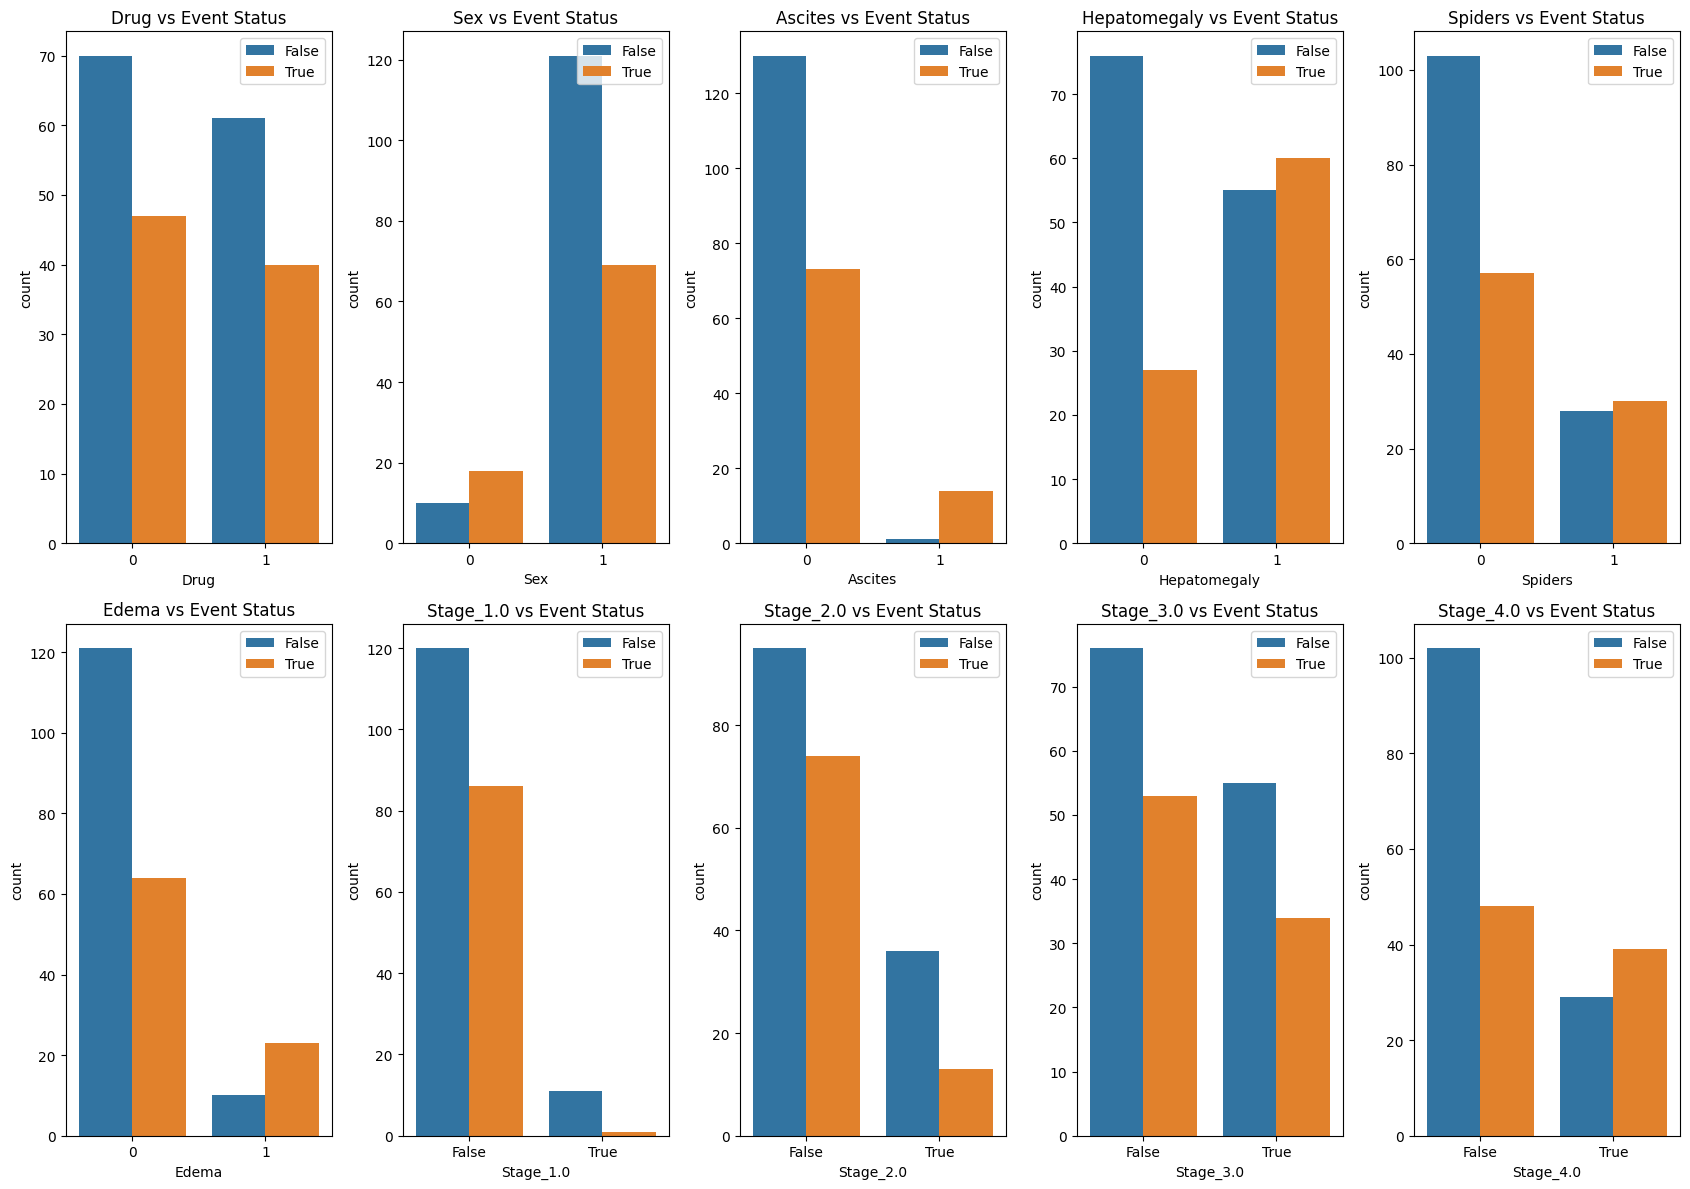

In [126]:
##################################
# Exploring the relationships between
# the object predictors and event status
##################################
cirrhosis_survival_object_predictors = ['Drug', 'Sex','Ascites', 'Hepatomegaly','Spiders', 'Edema','Stage_1.0','Stage_2.0','Stage_3.0','Stage_4.0']
plt.figure(figsize=(17, 12))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.countplot(x=cirrhosis_survival_object_predictors[i-1], hue='Status', data=cirrhosis_survival_train_EDA)
    plt.title(f'{cirrhosis_survival_object_predictors[i-1]} vs Event Status')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

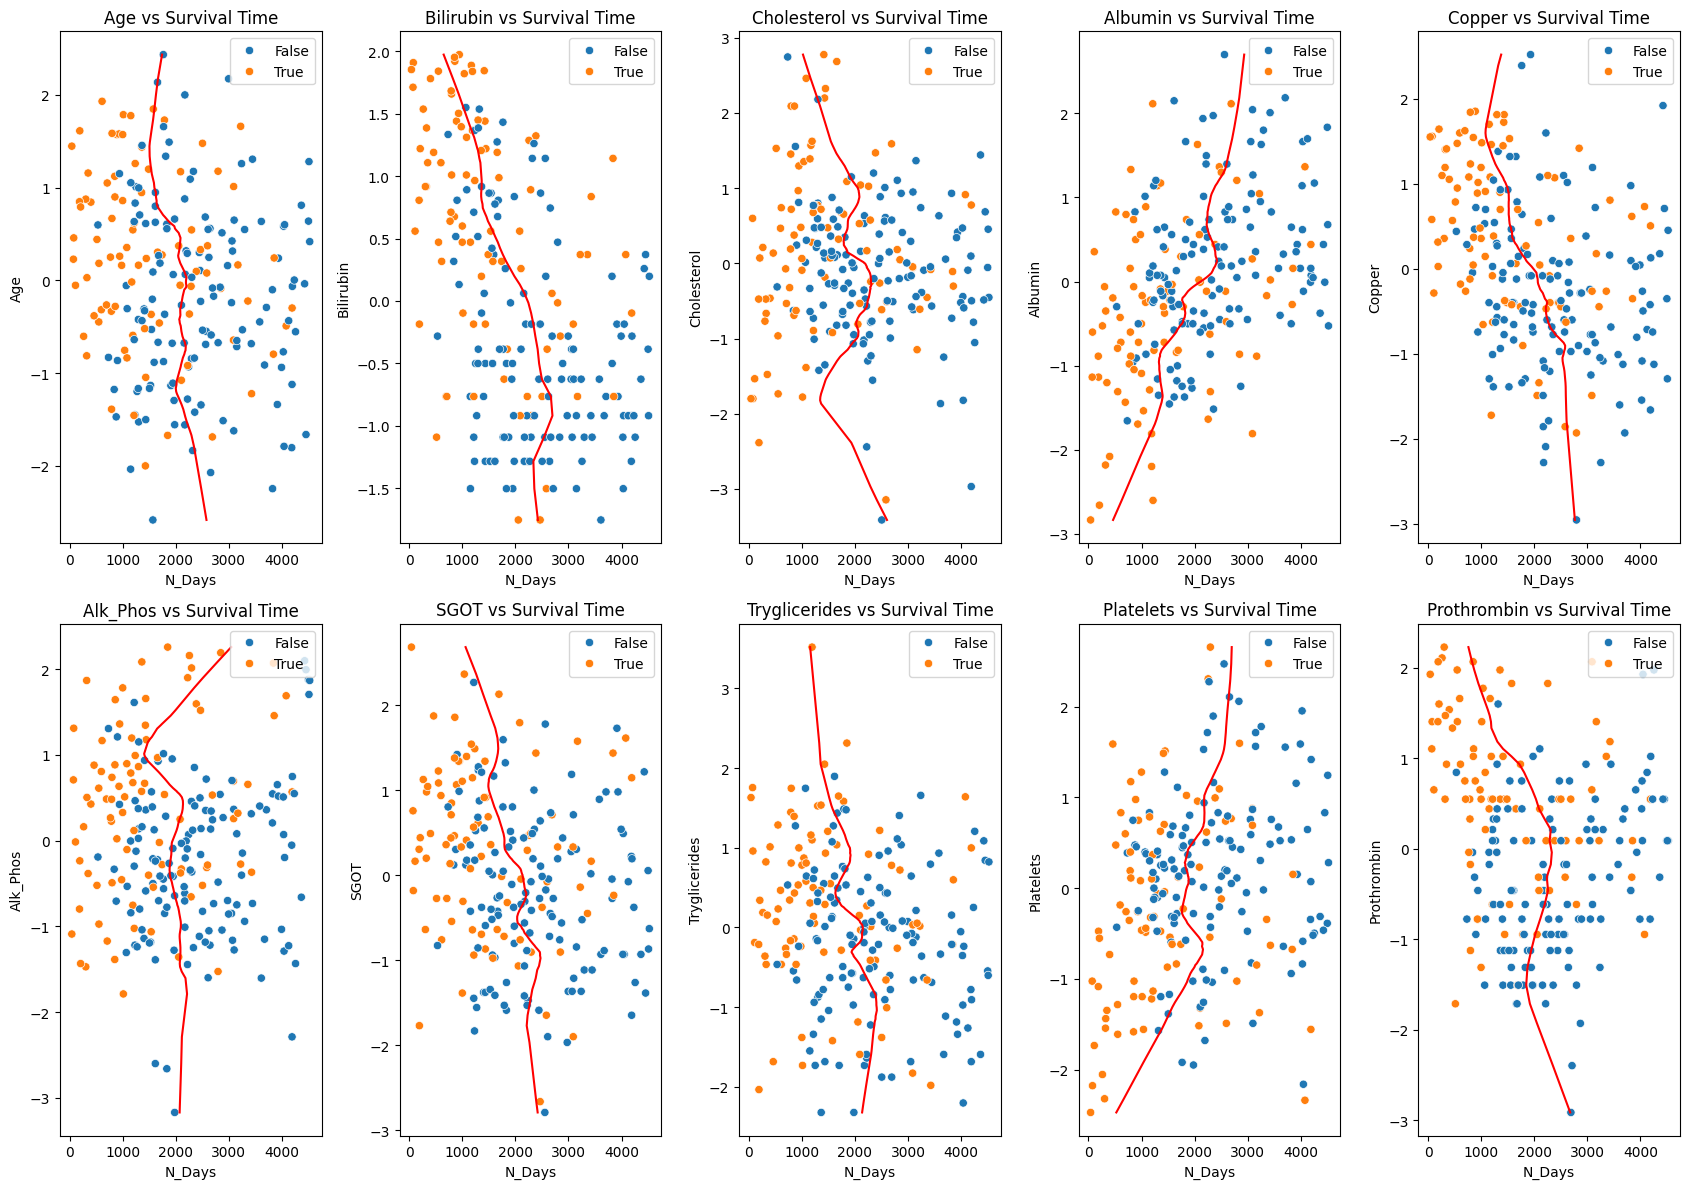

In [127]:
##################################
# Exploring the relationships between
# the numeric predictors and survival time
##################################
plt.figure(figsize=(17, 12))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.scatterplot(x='N_Days', y=cirrhosis_survival_numeric_predictors[i-1], data=cirrhosis_survival_train_EDA, hue='Status')
    loess_smoothed = lowess(cirrhosis_survival_train_EDA['N_Days'], cirrhosis_survival_train_EDA[cirrhosis_survival_numeric_predictors[i-1]], frac=0.3)
    plt.plot(loess_smoothed[:, 1], loess_smoothed[:, 0], color='red')
    plt.title(f'{cirrhosis_survival_numeric_predictors[i-1]} vs Survival Time')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

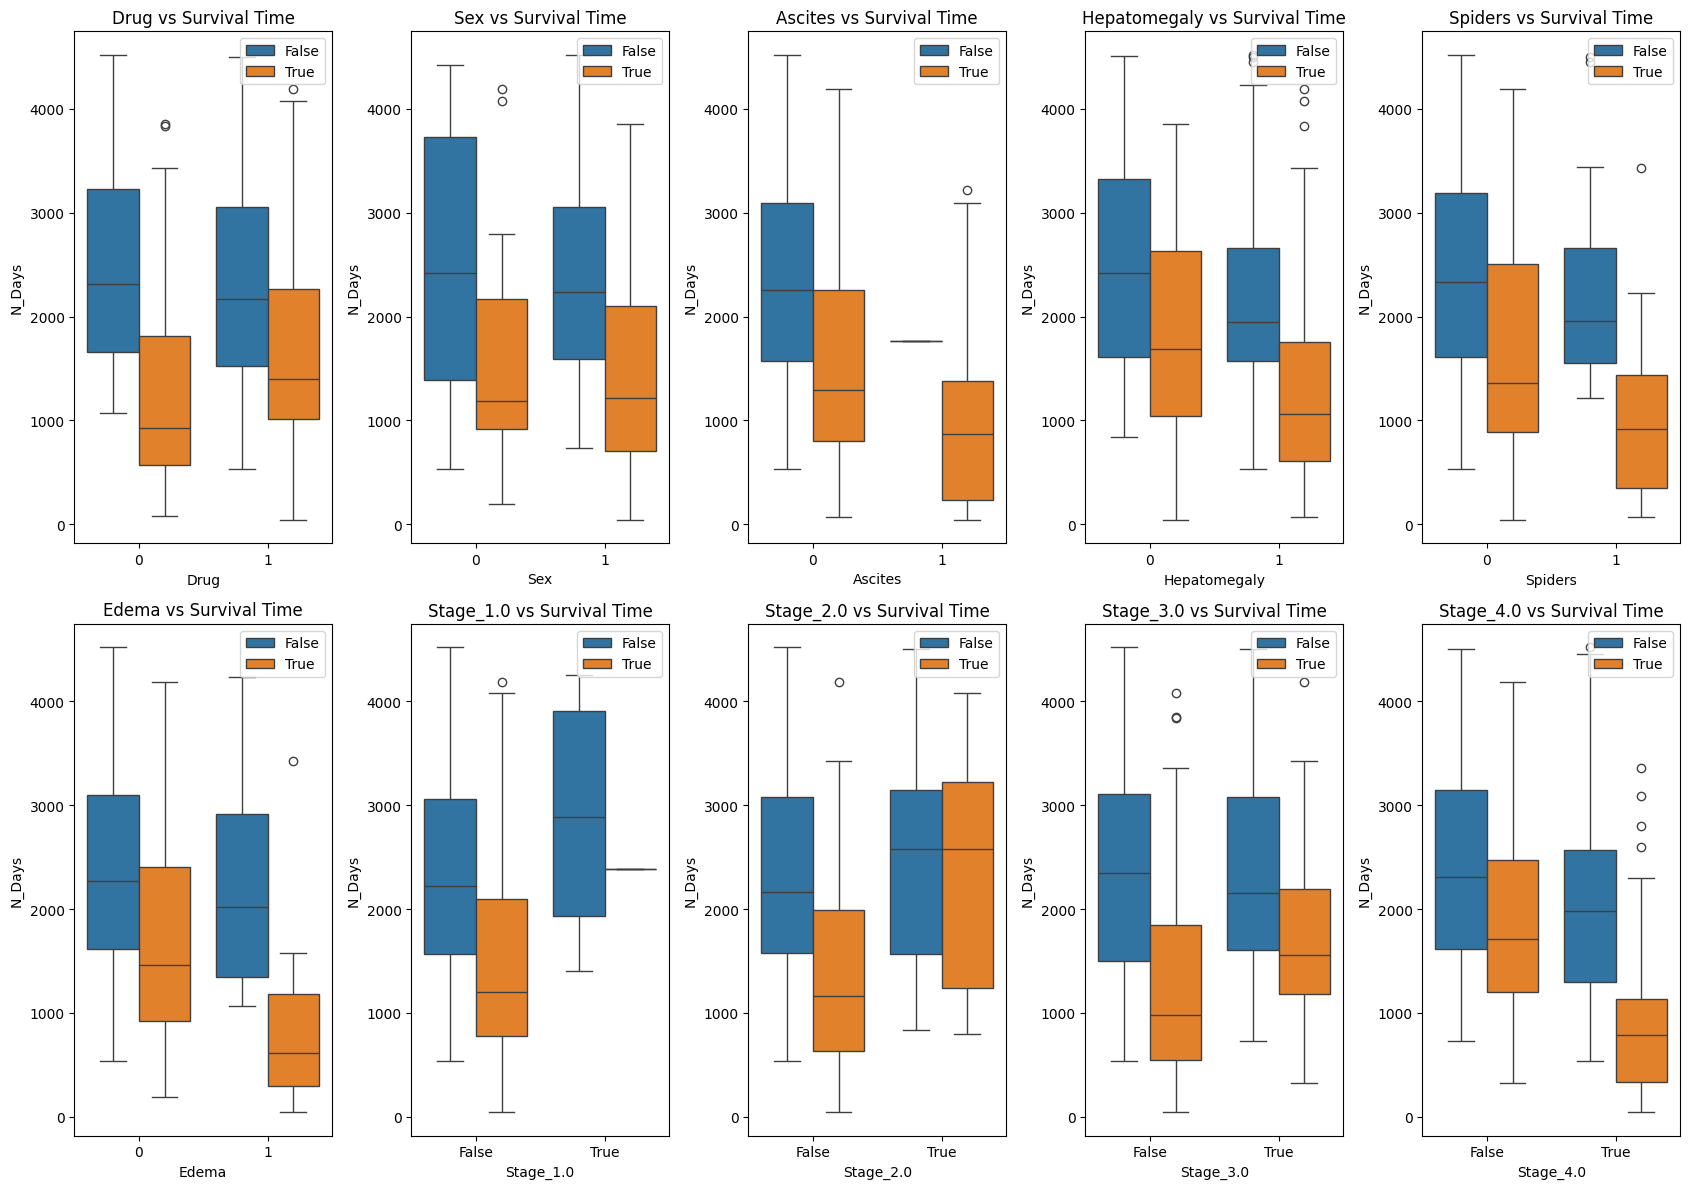

In [128]:
##################################
# Exploring the relationships between
# the object predictors and survival time
##################################
plt.figure(figsize=(17, 12))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.boxplot(x=cirrhosis_survival_object_predictors[i-1], y='N_Days', hue='Status', data=cirrhosis_survival_train_EDA)
    plt.title(f'{cirrhosis_survival_object_predictors[i-1]} vs Survival Time')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictors to the <span style="color: #FF0000">Status</span> event variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups True and False is equal to zero  
    * **Alternative**: Difference in the means between groups True and False is not equal to zero   
2. There is sufficient evidence to conclude of a statistically significant difference between the means of the numeric measurements obtained from the <span style="color: #FF0000">Status</span> groups in 10 numeric predictors given their high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Bilirubin</span>: T.Test.Statistic=-8.031, T.Test.PValue=0.000
    * <span style="color: #FF0000">Prothrombin</span>: T.Test.Statistic=-7.062, T.Test.PValue=0.000 
    * <span style="color: #FF0000">Copper</span>: T.Test.Statistic=-5.699, T.Test.PValue=0.000  
    * <span style="color: #FF0000">Alk_Phos</span>: T.Test.Statistic=-4.638, T.Test.PValue=0.000 
    * <span style="color: #FF0000">SGOT</span>: T.Test.Statistic=-4.207, T.Test.PValue=0.000 
    * <span style="color: #FF0000">Albumin</span>: T.Test.Statistic=+3.871, T.Test.PValue=0.000  
    * <span style="color: #FF0000">Tryglicerides</span>: T.Test.Statistic=-3.575, T.Test.PValue=0.000   
    * <span style="color: #FF0000">Age</span>: T.Test.Statistic=-3.264, T.Test.PValue=0.001
    * <span style="color: #FF0000">Platelets</span>: T.Test.Statistic=+3.261, T.Test.PValue=0.001
    * <span style="color: #FF0000">Cholesterol</span>: T.Test.Statistic=-2.256, T.Test.PValue=0.025
3. The relationship between the object predictors to the <span style="color: #FF0000">Status</span> event variable was statistically evaluated using the following hypotheses:
    * **Null**: The object predictor is independent of the event variable 
    * **Alternative**: The object predictor is dependent on the event variable   
4. There is sufficient evidence to conclude of a statistically significant relationship between the individual categories and the <span style="color: #FF0000">Status</span> groups in 8 object predictors given their high chisquare statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Ascites</span>: ChiSquare.Test.Statistic=16.854, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Hepatomegaly</span>: ChiSquare.Test.Statistic=14.206, ChiSquare.Test.PValue=0.000   
    * <span style="color: #FF0000">Edema</span>: ChiSquare.Test.Statistic=12.962, ChiSquare.Test.PValue=0.001 
    * <span style="color: #FF0000">Stage_4.0</span>: ChiSquare.Test.Statistic=11.505, ChiSquare.Test.PValue=0.00
    * <span style="color: #FF0000">Sex</span>: ChiSquare.Test.Statistic=6.837, ChiSquare.Test.PValue=0.008
    * <span style="color: #FF0000">Stage_2.0</span>: ChiSquare.Test.Statistic=4.024, ChiSquare.Test.PValue=0.045   
    * <span style="color: #FF0000">Stage_1.0</span>: ChiSquare.Test.Statistic=3.978, ChiSquare.Test.PValue=0.046 
    * <span style="color: #FF0000">Spiders</span>: ChiSquare.Test.Statistic=3.953, ChiSquare.Test.PValue=0.047
5. The relationship between the object predictors to the <span style="color: #FF0000">Status</span> and <span style="color: #FF0000">N_Days</span> variables was statistically evaluated using the following hypotheses:
    * **Null**: There is no difference in survival probabilities among cases belonging to each category of the object predictor.
    * **Alternative**: There is a difference in survival probabilities among cases belonging to each category of the object predictor.
6. There is sufficient evidence to conclude of a statistically significant difference in survival probabilities between the individual categories and the <span style="color: #FF0000">Status</span> groups with respect to the survival duration <span style="color: #FF0000">N_Days</span> in 8 object predictors given their high log-rank test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Ascites</span>: LR.Test.Statistic=37.792, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Edema</span>: LR.Test.Statistic=31.619, LR.Test.PValue=0.000 
    * <span style="color: #FF0000">Stage_4.0</span>: LR.Test.Statistic=26.482, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Hepatomegaly</span>: LR.Test.Statistic=20.350, LR.Test.PValue=0.000   
    * <span style="color: #FF0000">Spiders</span>: LR.Test.Statistic=10.762, LR.Test.PValue=0.001
    * <span style="color: #FF0000">Stage_2.0</span>: LR.Test.Statistic=6.775, LR.Test.PValue=0.009   
    * <span style="color: #FF0000">Sex</span>: LR.Test.Statistic=5.514, LR.Test.PValue=0.018
    * <span style="color: #FF0000">Stage_1.0</span>: LR.Test.Statistic=5.473, LR.Test.PValue=0.019 
7. The relationship between the binned numeric predictors to the <span style="color: #FF0000">Status</span> and <span style="color: #FF0000">N_Days</span> variables was statistically evaluated using the following hypotheses:
    * **Null**: There is no difference in survival probabilities among cases belonging to each category of the binned numeric predictor.
    * **Alternative**: There is a difference in survival probabilities among cases belonging to each category of the binned numeric predictor.
8. There is sufficient evidence to conclude of a statistically significant difference in survival probabilities between the individual categories and the <span style="color: #FF0000">Status</span> groups with respect to the survival duration <span style="color: #FF0000">N_Days</span> in 9 binned numeric predictors given their high log-rank test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Binned_Bilirubin</span>: LR.Test.Statistic=62.559, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Binned_Albumin</span>: LR.Test.Statistic=29.444, LR.Test.PValue=0.000 
    * <span style="color: #FF0000">Binned_Copper</span>: LR.Test.Statistic=27.452, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Binned_Prothrombin</span>: LR.Test.Statistic=21.695, LR.Test.PValue=0.000   
    * <span style="color: #FF0000">Binned_SGOT</span>: LR.Test.Statistic=16.178, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Binned_Tryglicerides</span>: LR.Test.Statistic=11.512, LR.Test.PValue=0.000   
    * <span style="color: #FF0000">Binned_Age</span>: LR.Test.Statistic=9.012, LR.Test.PValue=0.002
    * <span style="color: #FF0000">Binned_Platelets</span>: LR.Test.Statistic=6.741, LR.Test.PValue=0.009 
    * <span style="color: #FF0000">Binned_Alk_Phos</span>: LR.Test.Statistic=5.503, LR.Test.PValue=0.018 


In [129]:
##################################
# Computing the t-test 
# statistic and p-values
# between the event variable
# and numeric predictor columns
##################################
cirrhosis_survival_numeric_ttest_event = {}
for numeric_column in cirrhosis_survival_numeric_predictors:
    group_0 = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA.loc[:,'Status']==False]
    group_1 = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA.loc[:,'Status']==True]
    cirrhosis_survival_numeric_ttest_event['Status_' + numeric_column] = stats.ttest_ind(
        group_0[numeric_column], 
        group_1[numeric_column], 
        equal_var=True)

In [130]:
##################################
# Formulating the pairwise ttest summary
# between the event variable
# and numeric predictor columns
##################################
cirrhosis_survival_numeric_ttest_summary = cirrhosis_survival_train_EDA.from_dict(cirrhosis_survival_numeric_ttest_event, orient='index')
cirrhosis_survival_numeric_ttest_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(cirrhosis_survival_numeric_ttest_summary.sort_values(by=['T.Test.PValue'], ascending=True))

,T.Test.Statistic,T.Test.PValue
Status_Bilirubin,-8.030789,6.198797e-14
Status_Prothrombin,-7.062933,2.204961e-11
Status_Copper,-5.699409,3.913575e-08
Status_Alk_Phos,-4.638524,6.077981e-06
Status_SGOT,-4.207123,3.791642e-05
Status_Albumin,3.871216,1.434736e-04
Status_Tryglicerides,-3.575779,4.308371e-04
Status_Age,-3.264563,1.274679e-03
Status_Platelets,3.261042,1.289850e-03
Status_Cholesterol,-2.256073,2.506758e-02


In [131]:
##################################
# Computing the chisquare
# statistic and p-values
# between the event variable
# and categorical predictor columns
##################################
cirrhosis_survival_object_chisquare_event = {}
for object_column in cirrhosis_survival_object_predictors:
    contingency_table = pd.crosstab(cirrhosis_survival_train_EDA[object_column], 
                                    cirrhosis_survival_train_EDA['Status'])
    cirrhosis_survival_object_chisquare_event['Status_' + object_column] = stats.chi2_contingency(
        contingency_table)[0:2]

In [132]:
##################################
# Formulating the pairwise chisquare summary
# between the event variable
# and categorical predictor columns
##################################
cirrhosis_survival_object_chisquare_event_summary = cirrhosis_survival_train_EDA.from_dict(cirrhosis_survival_object_chisquare_event, orient='index')
cirrhosis_survival_object_chisquare_event_summary.columns = ['ChiSquare.Test.Statistic', 'ChiSquare.Test.PValue']
display(cirrhosis_survival_object_chisquare_event_summary.sort_values(by=['ChiSquare.Test.PValue'], ascending=True))

,ChiSquare.Test.Statistic,ChiSquare.Test.PValue
Status_Ascites,16.854134,0.000040
Status_Hepatomegaly,14.206045,0.000164
Status_Edema,12.962303,0.000318
Status_Stage_4.0,11.505826,0.000694
Status_Sex,6.837272,0.008928
Status_Stage_2.0,4.024677,0.044839
Status_Stage_1.0,3.977918,0.046101
Status_Spiders,3.953826,0.046765
Status_Stage_3.0,0.082109,0.774459
Status_Drug,0.000000,1.000000


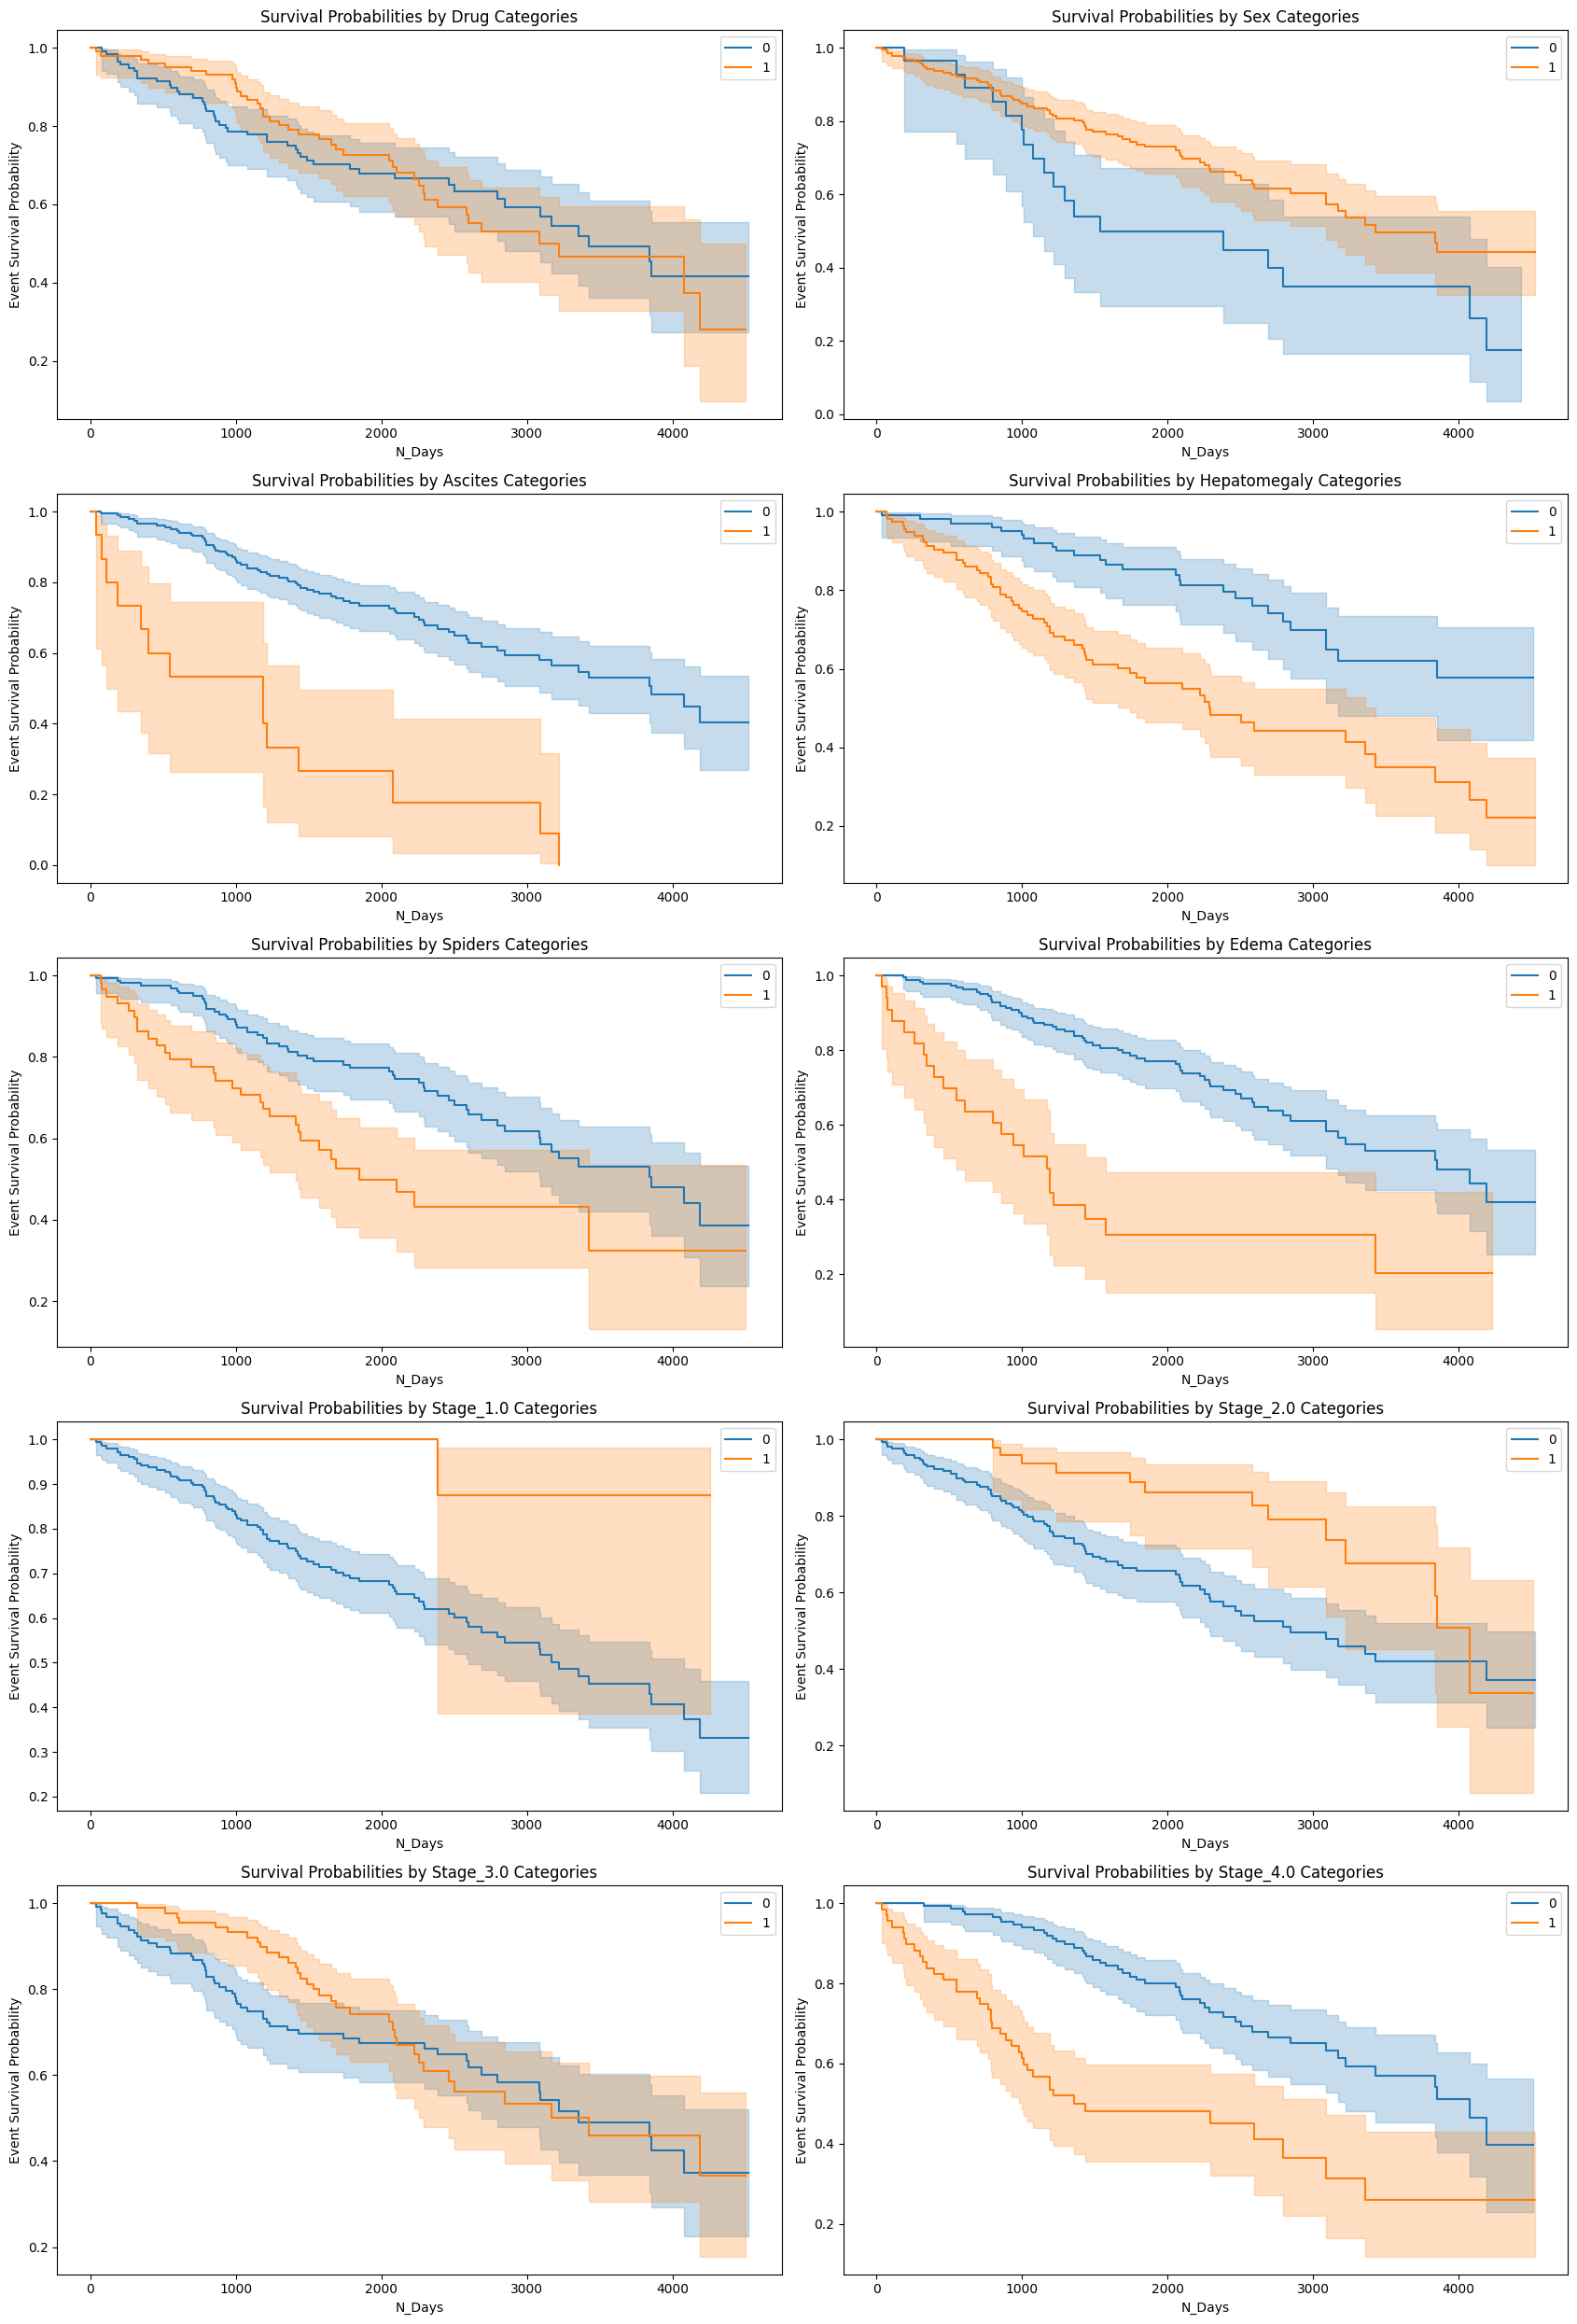

In [133]:
##################################
# Exploring the relationships between
# the object predictors with
# survival event and duration
##################################
plt.figure(figsize=(17, 25))
for i in range(0, len(cirrhosis_survival_object_predictors)):
    ax = plt.subplot(5, 2, i+1)
    for group in [0,1]:
        kmf.fit(durations=cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[cirrhosis_survival_object_predictors[i]] == group]['N_Days'],
                event_observed=cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[cirrhosis_survival_object_predictors[i]] == group]['Status'], label=group)
        kmf.plot_survival_function(ax=ax)
    plt.title(f'Survival Probabilities by {cirrhosis_survival_object_predictors[i]} Categories')
    plt.xlabel('N_Days')
    plt.ylabel('Event Survival Probability')
plt.tight_layout()
plt.show()

In [134]:
##################################
# Computing the log-rank test
# statistic and p-values
# between the event and duration variables
# with the object predictor columns
##################################
cirrhosis_survival_object_lrtest_event = {}
for object_column in cirrhosis_survival_object_predictors:
    groups = [0,1]
    group_0_event = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[object_column] == groups[0]]['Status']
    group_1_event = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[object_column] == groups[1]]['Status']
    group_0_duration = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[object_column] == groups[0]]['N_Days']
    group_1_duration = cirrhosis_survival_train_EDA[cirrhosis_survival_train_EDA[object_column] == groups[1]]['N_Days']
    lr_test = logrank_test(group_0_duration, group_1_duration,event_observed_A=group_0_event, event_observed_B=group_1_event)
    cirrhosis_survival_object_lrtest_event['Status_NDays_' + object_column] = (lr_test.test_statistic, lr_test.p_value)

In [135]:
##################################
# Formulating the log-rank test summary
# between the event and duration variables
# with the object predictor columns
##################################
cirrhosis_survival_object_lrtest_summary = cirrhosis_survival_train_EDA.from_dict(cirrhosis_survival_object_lrtest_event, orient='index')
cirrhosis_survival_object_lrtest_summary.columns = ['LR.Test.Statistic', 'LR.Test.PValue']
display(cirrhosis_survival_object_lrtest_summary.sort_values(by=['LR.Test.PValue'], ascending=True))

,LR.Test.Statistic,LR.Test.PValue
Status_NDays_Ascites,37.792220,7.869499e-10
Status_NDays_Edema,31.619652,1.875223e-08
Status_NDays_Stage_4.0,26.482676,2.659121e-07
Status_NDays_Hepatomegaly,20.360210,6.414988e-06
Status_NDays_Spiders,10.762275,1.035900e-03
Status_NDays_Stage_2.0,6.775033,9.244176e-03
Status_NDays_Sex,5.514094,1.886385e-02
Status_NDays_Stage_1.0,5.473270,1.930946e-02
Status_NDays_Stage_3.0,0.478031,4.893156e-01
Status_NDays_Drug,0.000016,9.968084e-01


In [136]:
##################################
# Creating an alternate copy of the 
# EDA data which will utilize
# binning for numeric predictors
##################################
cirrhosis_survival_train_EDA_binned = cirrhosis_survival_train_EDA.copy()

##################################
# Creating a function to bin
# numeric predictors into two groups
##################################
def bin_numeric_predictor(df, predictor):
    median = df[predictor].median()
    df[f'Binned_{predictor}'] = np.where(df[predictor] <= median, 0, 1)
    return df

##################################
# Binning the numeric predictors
# in the alternate EDA data into two groups
##################################
for numeric_column in cirrhosis_survival_numeric_predictors:
    cirrhosis_survival_train_EDA_binned = bin_numeric_predictor(cirrhosis_survival_train_EDA_binned, numeric_column)
    
##################################
# Formulating the binned numeric predictors
##################################    
cirrhosis_survival_binned_numeric_predictors = ["Binned_" + predictor for predictor in cirrhosis_survival_numeric_predictors]

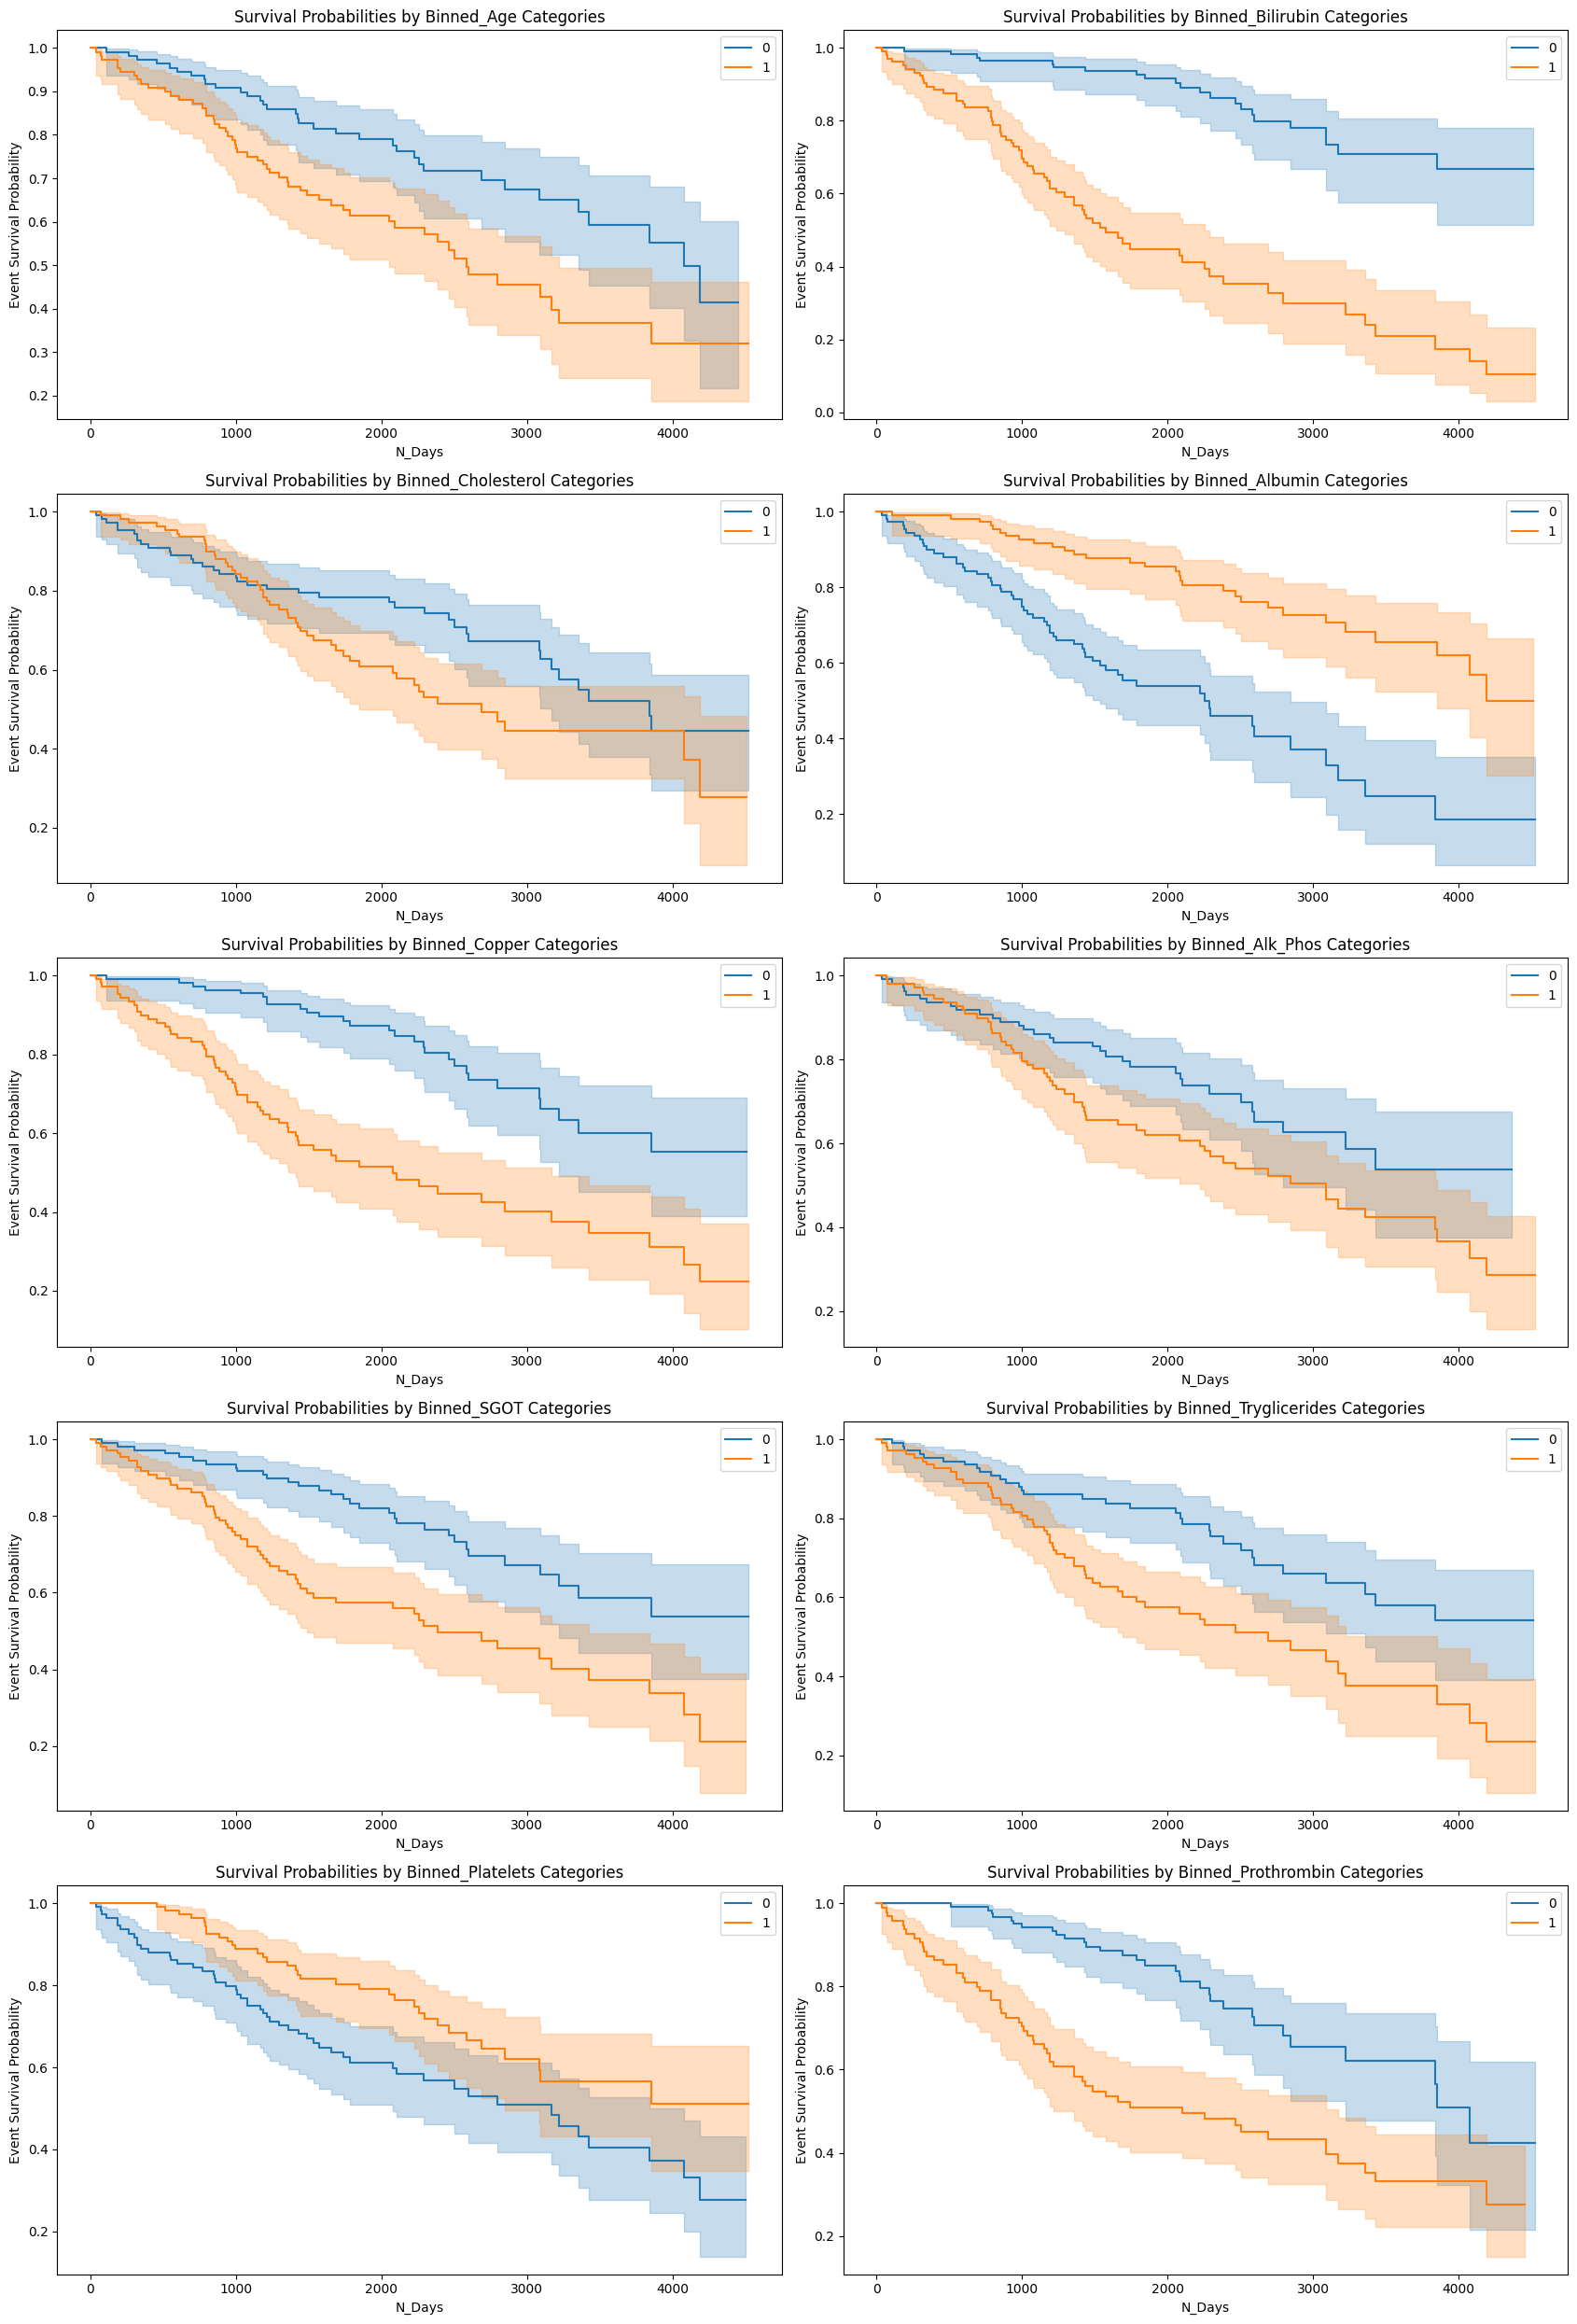

In [137]:
##################################
# Exploring the relationships between
# the binned numeric predictors with
# survival event and duration
##################################
plt.figure(figsize=(17, 25))
for i in range(0, len(cirrhosis_survival_binned_numeric_predictors)):
    ax = plt.subplot(5, 2, i+1)
    for group in [0,1]:
        kmf.fit(durations=cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[cirrhosis_survival_binned_numeric_predictors[i]] == group]['N_Days'],
                event_observed=cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[cirrhosis_survival_binned_numeric_predictors[i]] == group]['Status'], label=group)
        kmf.plot_survival_function(ax=ax)
    plt.title(f'Survival Probabilities by {cirrhosis_survival_binned_numeric_predictors[i]} Categories')
    plt.xlabel('N_Days')
    plt.ylabel('Event Survival Probability')
plt.tight_layout()
plt.show()

In [138]:
##################################
# Computing the log-rank test
# statistic and p-values
# between the event and duration variables
# with the binned numeric predictor columns
##################################
cirrhosis_survival_binned_numeric_lrtest_event = {}
for binned_numeric_column in cirrhosis_survival_binned_numeric_predictors:
    groups = [0,1]
    group_0_event = cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[binned_numeric_column] == groups[0]]['Status']
    group_1_event = cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[binned_numeric_column] == groups[1]]['Status']
    group_0_duration = cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[binned_numeric_column] == groups[0]]['N_Days']
    group_1_duration = cirrhosis_survival_train_EDA_binned[cirrhosis_survival_train_EDA_binned[binned_numeric_column] == groups[1]]['N_Days']
    lr_test = logrank_test(group_0_duration, group_1_duration,event_observed_A=group_0_event, event_observed_B=group_1_event)
    cirrhosis_survival_binned_numeric_lrtest_event['Status_NDays_' + binned_numeric_column] = (lr_test.test_statistic, lr_test.p_value)

In [139]:
##################################
# Formulating the log-rank test summary
# between the event and duration variables
# with the binned numeric predictor columns
##################################
cirrhosis_survival_binned_numeric_lrtest_summary = cirrhosis_survival_train_EDA_binned.from_dict(cirrhosis_survival_binned_numeric_lrtest_event, orient='index')
cirrhosis_survival_binned_numeric_lrtest_summary.columns = ['LR.Test.Statistic', 'LR.Test.PValue']
display(cirrhosis_survival_binned_numeric_lrtest_summary.sort_values(by=['LR.Test.PValue'], ascending=True))

,LR.Test.Statistic,LR.Test.PValue
Status_NDays_Binned_Bilirubin,62.559303,2.585412e-15
Status_NDays_Binned_Albumin,29.444808,5.753197e-08
Status_NDays_Binned_Copper,27.452421,1.610072e-07
Status_NDays_Binned_Prothrombin,21.695995,3.194575e-06
Status_NDays_Binned_SGOT,16.178483,5.764520e-05
Status_NDays_Binned_Tryglicerides,11.512960,6.911262e-04
Status_NDays_Binned_Age,9.011700,2.682568e-03
Status_NDays_Binned_Platelets,6.741196,9.421142e-03
Status_NDays_Binned_Alk_Phos,5.503850,1.897465e-02
Status_NDays_Binned_Cholesterol,3.773953,5.205647e-02


### 1.6.1 Premodelling Data Description <a class="anchor" id="1.6.1"></a>

1. To evaluate the feature selection capabilities of the candidate models, all predictors were accounted during the model development process using the training subset:
    * **218 rows** (observations)
    * **22 columns** (variables)
        * **2/22 event | duration** (boolean | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/22 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **10/22 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage_1.0</span>
             * <span style="color: #FF0000">Stage_2.0</span>
             * <span style="color: #FF0000">Stage_3.0</span>
             * <span style="color: #FF0000">Stage_4.0</span>
2. Similarly, all predictors were accounted during the model evaluation process using the testing subset:
    * **94 rows** (observations)
    * **22 columns** (variables)
        * **2/22 event | duration** (boolean | numeric)
             * <span style="color: #FF0000">Status</span>
             * <span style="color: #FF0000">N_Days</span>
        * **10/22 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
             * <span style="color: #FF0000">Bilirubin</span>
             * <span style="color: #FF0000">Cholesterol</span>
             * <span style="color: #FF0000">Albumin</span>
             * <span style="color: #FF0000">Copper</span>
             * <span style="color: #FF0000">Alk_Phos</span>
             * <span style="color: #FF0000">SGOT</span>
             * <span style="color: #FF0000">Triglycerides</span>
             * <span style="color: #FF0000">Platelets</span>
             * <span style="color: #FF0000">Prothrombin</span>
        * **10/22 predictor** (object)
             * <span style="color: #FF0000">Drug</span>
             * <span style="color: #FF0000">Sex</span>
             * <span style="color: #FF0000">Ascites</span>
             * <span style="color: #FF0000">Hepatomegaly</span>
             * <span style="color: #FF0000">Spiders</span>
             * <span style="color: #FF0000">Edema</span>
             * <span style="color: #FF0000">Stage_1.0</span>
             * <span style="color: #FF0000">Stage_2.0</span>
             * <span style="color: #FF0000">Stage_3.0</span>
             * <span style="color: #FF0000">Stage_4.0</span>

In [140]:
##################################
# Converting the event and duration variables
# for the training set
# to array as preparation for modeling
##################################
cirrhosis_survival_y_train_array = np.array([(row.Status, row.N_Days) for index, row in cirrhosis_survival_y_train_cleaned.iterrows()], dtype=[('Status', 'bool'), ('N_Days', 'int')])
print(cirrhosis_survival_y_train_array)

[(False, 2475) (False,  877) (False, 3050) ( True,  110) ( True, 3839)
 (False, 2241) (False, 2332) (False, 1666) ( True, 2847) (False, 4500)
 (False, 4256) ( True, 1427) ( True,  943) (False, 2456) (False, 1301)
 (False, 3297) ( True, 1434) ( True, 1297) (False,  839) (False, 2995)
 ( True, 1235) (False,  901) ( True,  264) (False, 1614) ( True, 1360)
 (False, 2835) (False, 3445) ( True,  597) (False, 1250) ( True, 4079)
 ( True, 2055) ( True,  850) ( True, 2105) ( True, 3358) (False, 3707)
 (False, 4032) (False, 2657) (False, 1592) ( True,  400) ( True, 1077)
 (False, 3099) (False, 1951) (False, 2294) (False, 4453) (False, 1978)
 ( True, 2297) ( True,  890) (False, 1979) (False, 1149) (False, 1765)
 ( True, 2689) ( True,  326) (False, 3823) ( True,  191) (False, 4523)
 ( True,  930) (False, 1656) (False, 3149) (False, 1230) ( True, 1012)
 (False, 1831) ( True, 1487) (False, 2563) (False, 1067) ( True, 1741)
 ( True, 2796) ( True, 2386) ( True, 2256) ( True,   77) (False, 3255)
 (Fals

In [141]:
##################################
# Verifying the predictor variables
# for the training set
# as preparation for modeling
##################################
display(cirrhosis_survival_X_train_preprocessed)

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,-1.342097,0.863802,0.886087,-0.451884,-0.972098,0.140990,0.104609,0.155130,0.540960,0.747580,1,1,0,0,0,0,False,True,False,False
1,-1.470901,0.516350,1.554523,0.827618,0.467579,-0.705337,0.301441,1.275222,0.474140,-0.315794,1,0,0,0,0,0,False,False,True,False
2,-0.239814,-0.625875,0.293280,0.646582,-0.241205,-0.848544,0.275723,-1.684460,0.756741,0.087130,1,1,0,0,0,0,False,True,False,False
3,-0.052733,0.559437,-1.534283,0.354473,-0.284113,-0.014525,0.162878,-0.189139,-1.735375,0.649171,0,1,1,1,1,1,False,False,False,True
4,-0.795010,1.142068,-0.108933,-0.272913,0.618030,2.071847,1.434674,-0.212684,-0.675951,-0.315794,0,1,0,1,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.167351,-0.764558,-1.147913,-0.887287,0.178721,0.320864,1.574157,0.053603,-0.848130,1.402075,0,1,0,0,0,0,False,False,True,False
214,0.004420,-0.918484,-0.782126,0.046794,-0.742780,0.549222,-0.379344,0.251836,-0.519594,0.546417,1,1,0,1,0,1,False,False,True,False
215,-0.381113,1.190111,0.136728,-0.194525,0.569475,0.881231,1.871385,-1.684460,1.587388,1.331561,0,1,0,1,1,1,False,False,False,True
216,0.800410,-1.283677,-0.262095,2.149157,-0.836372,-2.600746,-1.414105,0.645045,-0.324107,0.087130,1,1,0,0,0,0,False,True,False,False


In [142]:
##################################
# Converting the event and duration variables
# for the test set
# to array as preparation for modeling
##################################
cirrhosis_survival_y_test_array = np.array([(row.Status, row.N_Days) for index, row in cirrhosis_survival_y_test_cleaned.iterrows()], dtype=[('Status', 'bool'), ('N_Days', 'int')])
print(cirrhosis_survival_y_test_array)

[(False, 3336) (False, 1321) (False, 1435) (False, 4459) (False, 2721)
 (False, 2022) (False, 2527) ( True, 2400) (False, 3388) (False, 2944)
 ( True, 1827) (False, 3098) (False, 1418) ( True,  216) (False, 2176)
 ( True, 1690) ( True, 3445) (False, 3850) (False, 2449) (False,  788)
 (False, 1447) ( True,   51) ( True, 3574) ( True,  388) ( True, 1350)
 ( True,  762) (False, 2365) (False,  994) ( True,  131) (False, 3458)
 (False, 2574) ( True,  750) (False, 2224) ( True, 3395) (False, 1349)
 (False, 1882) ( True,  974) ( True, 1165) ( True,  971) (False, 4556)
 ( True, 3762) (False, 2863) (False, 1481) (False, 2615) (False, 2772)
 (False, 1300) ( True, 2769) (False, 1776) (False, 2255) ( True, 3282)
 (False,  837) (False, 1783) (False, 1030) (False, 2990) (False, 2580)
 ( True,  334) ( True,  198) ( True, 1492) ( True, 1925) ( True,  673)
 (False, 2556) (False, 1785) (False, 2050) ( True, 1682) (False, 2033)
 (False, 3577) (False, 1408) ( True, 3584) ( True,  264) ( True,  824)
 (Fals

In [143]:
##################################
# Verifying the predictor variables
# for the test set
# as preparation for modeling
##################################
display(cirrhosis_survival_X_test_preprocessed)

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,1.043704,0.744396,0.922380,0.240951,0.045748,0.317282,-0.078335,2.671950,1.654815,-0.948196,1,1,0,0,1,1,False,False,True,False
1,-1.936476,-0.764558,0.160096,-0.600950,-0.179138,-0.245613,0.472422,-0.359800,0.348533,0.439089,0,1,0,0,0,0,False,False,False,True
2,-1.749033,0.371523,0.558115,0.646582,-0.159024,0.339454,0.685117,-3.109146,-0.790172,-0.617113,1,1,0,1,0,0,False,False,False,True
3,-0.485150,-0.918484,-0.690904,1.629765,0.028262,1.713791,-1.387751,0.155130,0.679704,0.087130,1,0,0,0,0,0,True,False,False,False
4,-0.815655,1.286438,2.610501,-0.722153,0.210203,0.602860,3.494936,-0.053214,-0.475634,-1.714435,0,1,0,1,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.692406,-0.096645,-0.906164,-0.477005,-1.930422,-0.809457,-0.888634,-1.421640,-1.638792,1.101933,1,1,0,1,1,0,False,False,False,True
90,-0.201495,-1.283677,0.064451,0.297476,-0.062405,0.425745,1.204015,-1.077370,0.939991,-1.125995,0,1,0,0,0,0,False,False,True,False
91,-0.974200,0.776293,-0.891985,0.587203,0.699548,-0.199230,-0.016923,-0.463921,0.060683,-0.778722,1,1,0,1,1,0,False,False,True,False
92,0.466763,0.470819,0.536326,1.139126,-1.293580,0.511347,0.410413,0.059267,0.672973,-0.462938,1,1,0,0,1,0,False,True,False,False


### 1.6.2 Cox Proportional Hazards Regression <a class="anchor" id="1.6.2"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) is a semiparametric model used to study the relationship between the survival time of subjects and one or more predictor variables. The model assumes that the hazard ratio (the risk of the event occurring at a specific time) is a product of a baseline hazard function and an exponential function of the predictor variables. It also does not require the baseline hazard to be specified, thus making it a semiparametric model. As a method, it is well-established and widely used in survival analysis, can handle time-dependent covariates and provides a relatively straightforward interpretation. However, the process assumes proportional hazards, which may not hold in all datasets, and may be less flexible in capturing complex relationships between variables and survival times compared to some machine learning models. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the partial likelihood function for the Cox model (which only considers the relative ordering of survival times); using optimization techniques to estimate the regression coefficients by maximizing the log-partial likelihood; estimating the baseline hazard function (although it is not explicitly required for predictions); and calculating the hazard function and survival function for new data using the estimated coefficients and baseline hazard.

1. The [cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) from the <mark style="background-color: #CCECFF"><b>sksurv.linear_model</b></mark> Python library API was implemented. 
2. The model implementation used 1 hyperparameter:
    * <span style="color: #FF0000">alpha</span> = regularization parameter for ridge regression penalty made to vary between 0.01, 0.10, 1.00 and 10.00
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">alpha</span> = 10.00
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.8136
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.8485
6. The independent test model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.8744
7. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.

In [144]:
##################################
# Defining a function to perform 
# 5-fold cross-validation and hyperparameter tuning
# using the Cox-Proportional Hazards Regression Model
##################################
def cross_validate_coxph_model(X, y, hyperparameters):
    kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
    results = []

    for params in hyperparameters:
        coxph_model = CoxPHSurvivalAnalysis(**params)
        fold_results = []
        
        for train_index, validation_index in kf.split(X):
            X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
            y_train, y_validation = y[train_index], y[validation_index]
            
            try:
                # Fit and predict within try-except to catch errors for debugging
                coxph_model.fit(X_train, y_train)
                pred_survival = coxph_model.predict(X_validation)
                ci = concordance_index_censored(y_validation['Status'], y_validation['N_Days'], pred_survival)[0]
                fold_results.append(ci)
            except np.linalg.LinAlgError as e:
                print(f"LinAlgError occurred: {e}")
                fold_results.append(np.nan)
        
        results.append({
            'Hyperparameters': params,
            'Concordance_Index_Mean': np.mean(fold_results),
            'Concordance_Index_Std': np.std(fold_results)
        })
    return pd.DataFrame(results)

In [145]:
##################################
# Defining hyperparameters for tuning
# using the Cox-Proportional Hazards Regression Model
##################################
hyperparameters = [{'alpha': 0.01},
                   {'alpha': 0.10},
                   {'alpha': 1.00},
                   {'alpha': 10.00}]

In [146]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Cox-Proportional Hazards Regression Model
##################################
cirrhosis_survival_coxph_ht = cross_validate_coxph_model(cirrhosis_survival_X_train_preprocessed,
                                                         cirrhosis_survival_y_train_array, 
                                                         hyperparameters)
display(cirrhosis_survival_coxph_ht)

,Hyperparameters,Concordance_Index_Mean,Concordance_Index_Std
0,{'alpha': 0.01},0.803639,0.034267
1,{'alpha': 0.1},0.804195,0.033020
2,{'alpha': 1.0},0.805496,0.033063
3,{'alpha': 10.0},0.813656,0.036258


In [147]:
##################################
# Formulating a Cox-Proportional Hazards Regression Model
# with optimal hyperparameters
##################################
optimal_coxph_model = CoxPHSurvivalAnalysis(alpha=10.0)
optimal_coxph_model.fit(cirrhosis_survival_X_train_preprocessed, cirrhosis_survival_y_train_array)

CoxPHSurvivalAnalysis(alpha=10.0)

In [148]:
##################################
# Measuring model performance of the 
# optimal Cox-Proportional Hazards Regression Model
# on the train set
##################################
optimal_coxph_cirrhosis_survival_y_train_pred = optimal_coxph_model.predict(cirrhosis_survival_X_train_preprocessed)
optimal_coxph_cirrhosis_survival_y_train_ci = concordance_index_censored(cirrhosis_survival_y_train_array['Status'], 
                                                                        cirrhosis_survival_y_train_array['N_Days'], 
                                                                        optimal_coxph_cirrhosis_survival_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_coxph_cirrhosis_survival_y_train_ci}")

Apparent Concordance Index: 0.8485858257477243


In [149]:
##################################
# Measuring model performance of the 
# optimal Cox-Proportional Hazards Regression Model
# on the test set
##################################
optimal_coxph_cirrhosis_survival_y_test_pred = optimal_coxph_model.predict(cirrhosis_survival_X_test_preprocessed)
optimal_coxph_cirrhosis_survival_y_test_ci = concordance_index_censored(cirrhosis_survival_y_test_array['Status'], 
                                                                        cirrhosis_survival_y_test_array['N_Days'], 
                                                                        optimal_coxph_cirrhosis_survival_y_test_pred)[0]
print(f"Test Concordance Index: {optimal_coxph_cirrhosis_survival_y_test_ci}")

Test Concordance Index: 0.8743764172335601


In [150]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Cox-Proportional Hazards Regression Model
##################################
coxph_set = pd.DataFrame(["Train","Cross-Validation","Test"])
coxph_ci_values = pd.DataFrame([optimal_coxph_cirrhosis_survival_y_train_ci,
                                cirrhosis_survival_coxph_ht.Concordance_Index_Mean.max(),
                                optimal_coxph_cirrhosis_survival_y_test_ci])
coxph_method = pd.DataFrame(["COXPH"]*3)
coxph_summary = pd.concat([coxph_set, 
                           coxph_ci_values,
                           coxph_method], axis=1)
coxph_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxph_summary.reset_index(inplace=True, drop=True)
display(coxph_summary)

,Set,Concordance.Index,Method
0,Train,0.848586,COXPH
1,Cross-Validation,0.813656,COXPH
2,Test,0.874376,COXPH


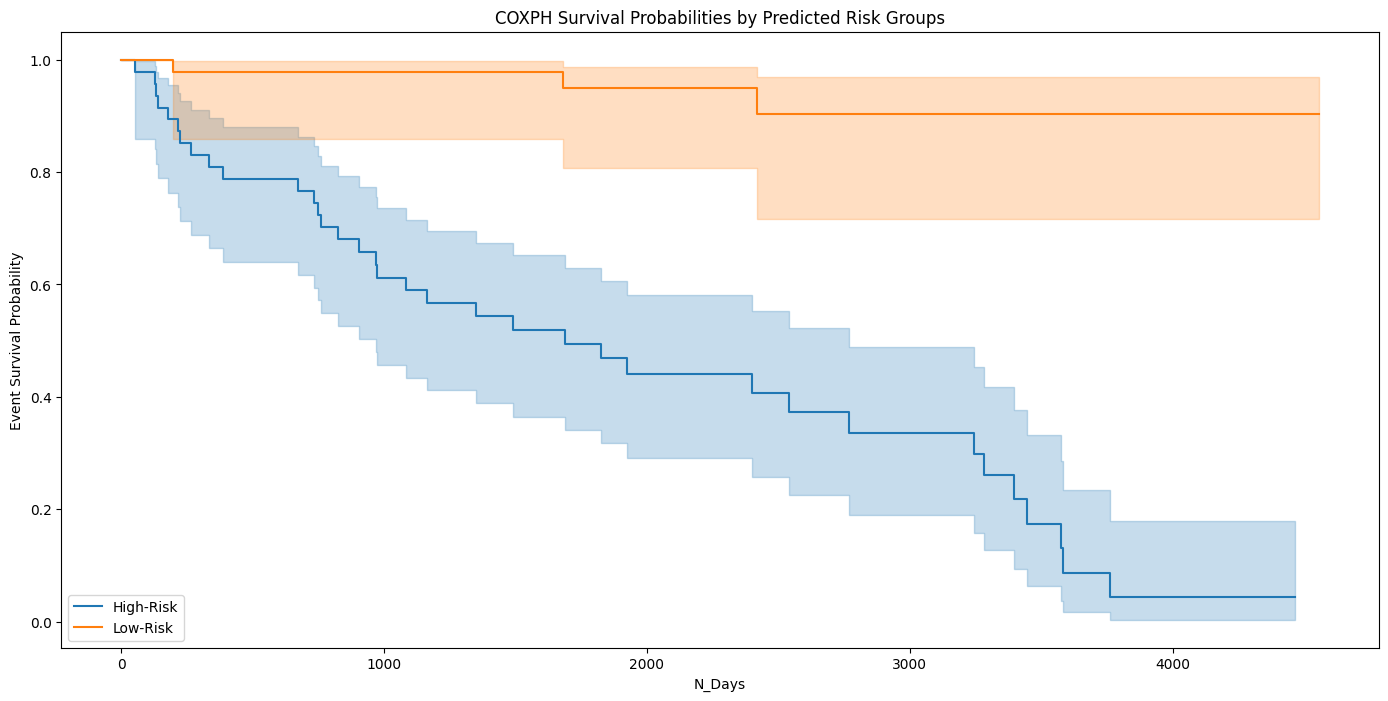

In [151]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
cirrhosis_survival_test['Predicted_Risks_CoxPH'] = optimal_coxph_cirrhosis_survival_y_test_pred
cirrhosis_survival_test['Predicted_RiskGroups_CoxPH'] = risk_groups = pd.qcut(cirrhosis_survival_test['Predicted_Risks_CoxPH'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('COXPH Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [152]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
10,0.226982,1.530100,1.302295,1.331981,1.916467,-0.477846,-0.451305,2.250260,0.201024,0.546417,1,1,0,1,1,0,False,False,False,True
20,-0.147646,0.061189,0.793618,-1.158235,0.861264,0.625621,0.319035,0.446026,1.083875,-1.508571,1,1,0,0,0,0,False,False,False,True
30,0.296370,-1.283677,0.169685,3.237777,-1.008276,-0.873566,-0.845549,-0.351236,0.985206,-0.617113,1,1,0,0,0,0,False,False,True,False
40,0.392609,-0.096645,-0.486337,1.903146,-0.546292,-0.247141,-0.720619,-0.810790,-0.000298,1.402075,0,1,0,1,1,0,False,False,False,True
50,-0.813646,1.089037,0.064451,0.212865,2.063138,-0.224432,0.074987,2.333282,0.240640,-1.125995,0,1,0,1,1,0,False,False,False,True


In [153]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(cirrhosis_survival_y_test_array[[10, 20, 30, 40, 50]])

[( True, 1827) (False, 1447) (False, 2574) ( True, 3762) (False,  837)]


In [154]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_CoxPH']])

   Predicted_RiskGroups_CoxPH
10                  High-Risk
20                   Low-Risk
30                   Low-Risk
40                  High-Risk
50                  High-Risk


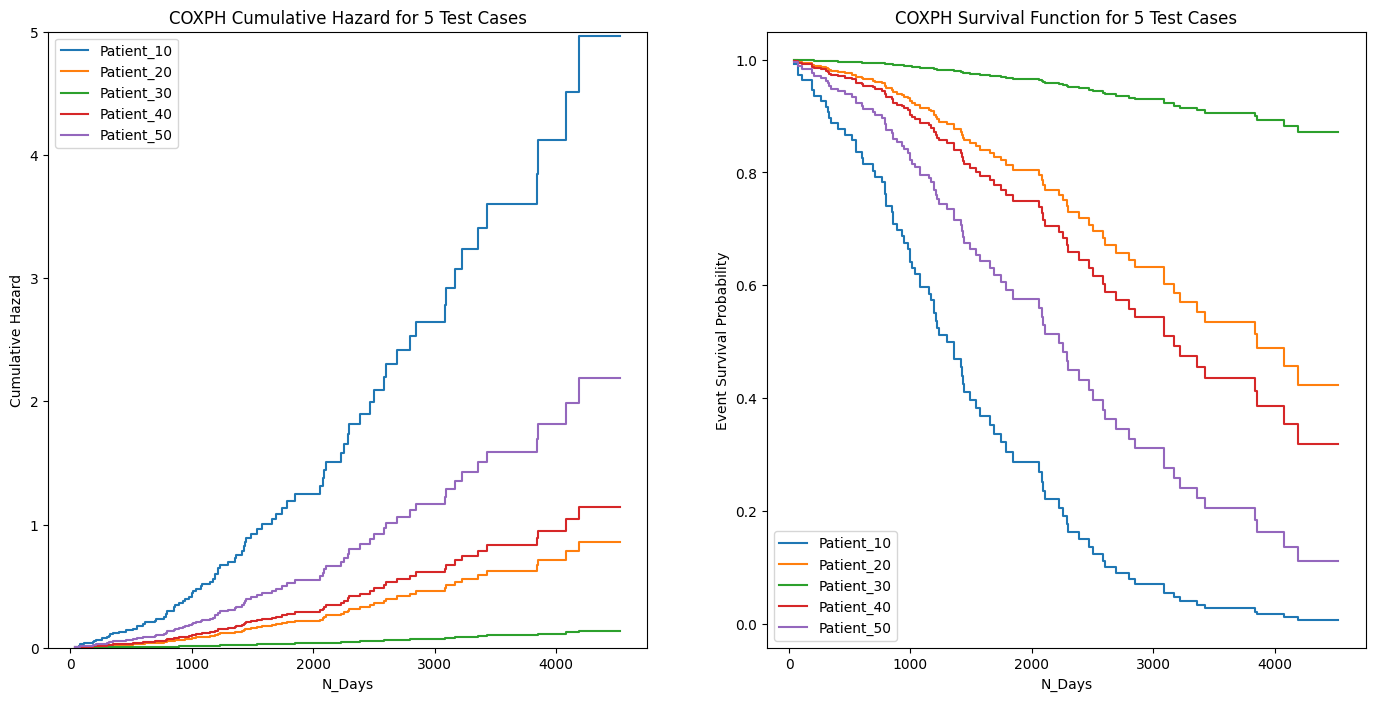

In [155]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50',]
test_case_cumulative_hazard_function = optimal_coxph_model.predict_cumulative_hazard_function(test_case)
test_case_survival_function = optimal_coxph_model.predict_survival_function(test_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(test_case_cumulative_hazard_function, test_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('COXPH Cumulative Hazard for 5 Test Cases')
ax[0].set_xlabel('N_Days')
ax[0].set_ylim(0,5)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(test_case_labels, loc="upper left")
ax[1].set_title('COXPH Survival Function for 5 Test Cases')
ax[1].set_xlabel('N_Days')
ax[1].set_ylabel('Event Survival Probability')
ax[1].legend(test_case_labels, loc="lower left")
plt.show()

### 1.6.3 Cox Net Survival <a class="anchor" id="1.6.3"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Net Survival](https://doi.org/10.18637/jss.v039.i05) is a regularized version of the Cox Proportional Hazards model, which incorporates both L1 (Lasso) and L2 (Ridge) penalties. The model is useful when dealing with high-dimensional data where the number of predictors can be larger than the number of observations. The elastic net penalty helps in both variable selection (via L1) and multicollinearity handling (via L2). As a method, it can handle high-dimensional data and perform variable selection. Additionally, it balances between L1 and L2 penalties, offering flexibility in modeling. However, the process requires tuning of penalty parameters, which can be computationally intensive. Additionally, interpretation is more complex due to the regularization terms. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the penalized partial likelihood function, incorporating both L1 (Lasso) and L2 (Ridge) penalties; application of regularization techniques to estimate the regression coefficients by maximizing the penalized log-partial likelihood; performing cross-validation to select optimal values for the penalty parameters (alpha and l1_ratio); and the calculation of the hazard function and survival function for new data using the estimated regularized coefficients.

1. The [cox net survival model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxnetSurvivalAnalysis.html) from the <mark style="background-color: #CCECFF"><b>sksurv.linear_model</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">l1_ratio</span> = ElasticNet mixing parameter made to vary between 0.10, 0.50 and 1.00
    * <span style="color: #FF0000">alpha_min_ratio</span> = minimum alpha of the regularization path made to vary between 0.0001 and 0.01
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">l1_ratio</span> = 0.10
    * <span style="color: #FF0000">alpha_min_ratio</span> = 0.01
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.8123
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.8472
6. The independent test model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.8717
7. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.

In [156]:
##################################
# Defining a function to perform 
# 5-fold cross-validation and hyperparameter tuning
# using the Cox-Net Survival Model
##################################
def cross_validate_coxns_model(X, y, hyperparameters):
    kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
    results = []

    for params in hyperparameters:
        coxns_model = CoxnetSurvivalAnalysis(**params, fit_baseline_model=True)
        fold_results = []
        
        for train_index, validation_index in kf.split(X):
            X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
            y_train, y_validation = y[train_index], y[validation_index]
            
            coxns_model.fit(X_train, y_train)
            pred_survival = coxns_model.predict(X_validation)
            ci = concordance_index_censored(y_validation['Status'], y_validation['N_Days'], pred_survival)[0]
            fold_results.append(ci)
        
        results.append({
            'Hyperparameters': params,
            'Concordance_Index_Mean': np.mean(fold_results),
            'Concordance_Index_Std': np.std(fold_results)
        })
    return pd.DataFrame(results)

In [157]:
##################################
# Defining hyperparameters for tuning
# using the Cox-Net Survival Model
##################################
hyperparameters = [{'l1_ratio': 1.0, 'alpha_min_ratio': 0.0001},
                   {'l1_ratio': 1.0, 'alpha_min_ratio': 0.01},
                   {'l1_ratio': 0.5, 'alpha_min_ratio': 0.0001},
                   {'l1_ratio': 0.5, 'alpha_min_ratio': 0.01},
                   {'l1_ratio': 0.1, 'alpha_min_ratio': 0.0001},
                   {'l1_ratio': 0.1, 'alpha_min_ratio': 0.01}]

In [158]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Cox-Net Survival Model
##################################
cirrhosis_survival_coxns_ht = cross_validate_coxns_model(cirrhosis_survival_X_train_preprocessed,
                                                         cirrhosis_survival_y_train_array, 
                                                         hyperparameters)
display(cirrhosis_survival_coxns_ht)

,Hyperparameters,Concordance_Index_Mean,Concordance_Index_Std
0,"{'l1_ratio': 1.0, 'alpha_min_ratio': 0.0001}",0.806633,0.033852
1,"{'l1_ratio': 1.0, 'alpha_min_ratio': 0.01}",0.805681,0.031412
2,"{'l1_ratio': 0.5, 'alpha_min_ratio': 0.0001}",0.806474,0.034716
3,"{'l1_ratio': 0.5, 'alpha_min_ratio': 0.01}",0.805591,0.035271
4,"{'l1_ratio': 0.1, 'alpha_min_ratio': 0.0001}",0.805299,0.034536
5,"{'l1_ratio': 0.1, 'alpha_min_ratio': 0.01}",0.812264,0.037303


In [159]:
##################################
# Formulating a Cox-Net Survival Model
# with optimal hyperparameters
##################################
optimal_coxns_model = CoxnetSurvivalAnalysis(l1_ratio=0.1, alpha_min_ratio=0.01, fit_baseline_model=True)
optimal_coxns_model.fit(cirrhosis_survival_X_train_preprocessed, cirrhosis_survival_y_train_array)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, fit_baseline_model=True,
                       l1_ratio=0.1)

In [160]:
##################################
# Measuring model performance of the 
# optimal Cox-Net Survival Model
# on the train set
##################################
optimal_coxns_cirrhosis_survival_y_train_pred = optimal_coxns_model.predict(cirrhosis_survival_X_train_preprocessed)
optimal_coxns_cirrhosis_survival_y_train_ci = concordance_index_censored(cirrhosis_survival_y_train_array['Status'], 
                                                                         cirrhosis_survival_y_train_array['N_Days'], 
                                                                         optimal_coxns_cirrhosis_survival_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_coxns_cirrhosis_survival_y_train_ci}")

Apparent Concordance Index: 0.8472041612483745


In [161]:
##################################
# Measuring model performance of the 
# optimal Cox-Net Survival Model
# on the test set
##################################
optimal_coxns_cirrhosis_survival_y_test_pred = optimal_coxns_model.predict(cirrhosis_survival_X_test_preprocessed)
optimal_coxns_cirrhosis_survival_y_test_ci = concordance_index_censored(cirrhosis_survival_y_test_array['Status'], 
                                                                        cirrhosis_survival_y_test_array['N_Days'], 
                                                                        optimal_coxns_cirrhosis_survival_y_test_pred)[0]
print(f"Test Concordance Index: {optimal_coxns_cirrhosis_survival_y_test_ci}")

Test Concordance Index: 0.871655328798186


In [162]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Cox-Net Survival Model
##################################
coxns_set = pd.DataFrame(["Train","Cross-Validation","Test"])
coxns_ci_values = pd.DataFrame([optimal_coxns_cirrhosis_survival_y_train_ci,
                                cirrhosis_survival_coxns_ht.Concordance_Index_Mean.max(),
                                optimal_coxns_cirrhosis_survival_y_test_ci])
coxns_method = pd.DataFrame(["COXNS"]*3)
coxns_summary = pd.concat([coxns_set, 
                           coxns_ci_values,
                           coxns_method], axis=1)
coxns_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxns_summary.reset_index(inplace=True, drop=True)
display(coxns_summary)

,Set,Concordance.Index,Method
0,Train,0.847204,COXNS
1,Cross-Validation,0.812264,COXNS
2,Test,0.871655,COXNS


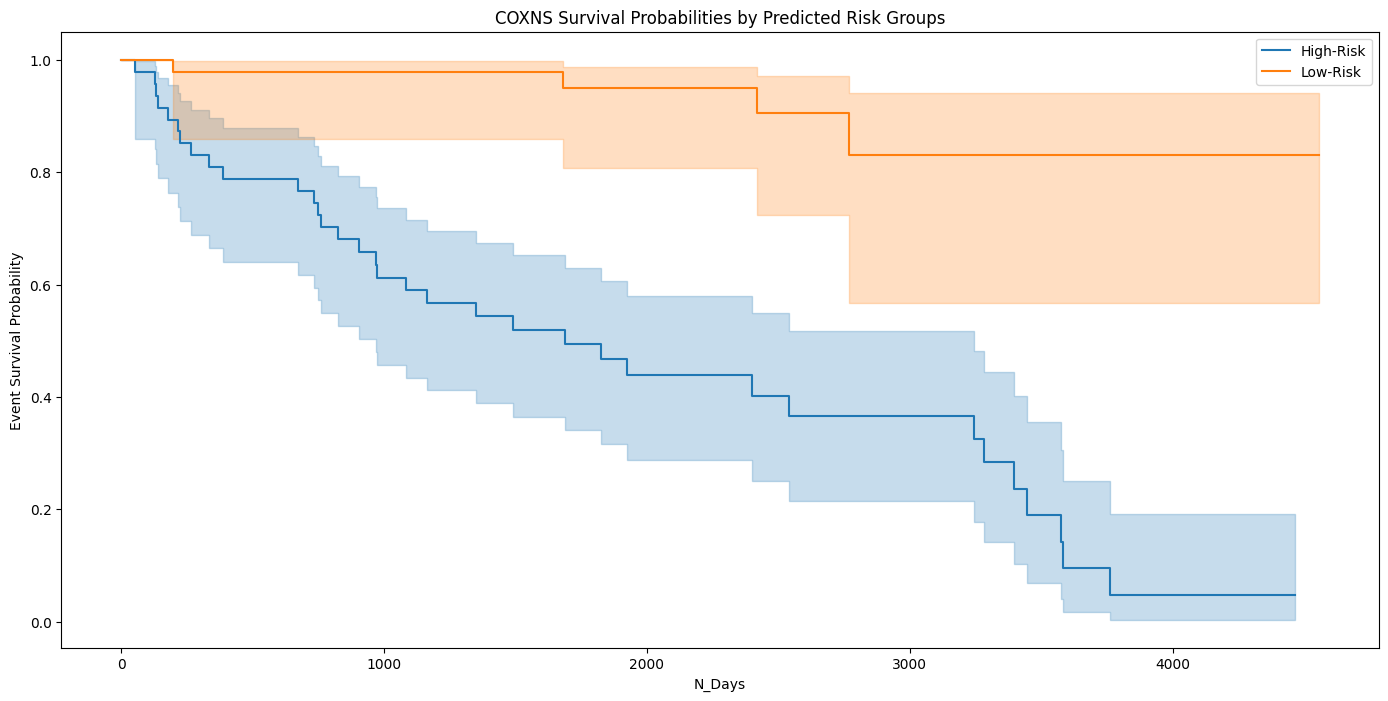

In [163]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
cirrhosis_survival_test['Predicted_Risks_CoxNS'] = optimal_coxns_cirrhosis_survival_y_test_pred
cirrhosis_survival_test['Predicted_RiskGroups_CoxNS'] = risk_groups = pd.qcut(cirrhosis_survival_test['Predicted_Risks_CoxNS'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('COXNS Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [164]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
10,0.226982,1.530100,1.302295,1.331981,1.916467,-0.477846,-0.451305,2.250260,0.201024,0.546417,1,1,0,1,1,0,False,False,False,True
20,-0.147646,0.061189,0.793618,-1.158235,0.861264,0.625621,0.319035,0.446026,1.083875,-1.508571,1,1,0,0,0,0,False,False,False,True
30,0.296370,-1.283677,0.169685,3.237777,-1.008276,-0.873566,-0.845549,-0.351236,0.985206,-0.617113,1,1,0,0,0,0,False,False,True,False
40,0.392609,-0.096645,-0.486337,1.903146,-0.546292,-0.247141,-0.720619,-0.810790,-0.000298,1.402075,0,1,0,1,1,0,False,False,False,True
50,-0.813646,1.089037,0.064451,0.212865,2.063138,-0.224432,0.074987,2.333282,0.240640,-1.125995,0,1,0,1,1,0,False,False,False,True


In [165]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(cirrhosis_survival_y_test_array[[10, 20, 30, 40, 50]])

[( True, 1827) (False, 1447) (False, 2574) ( True, 3762) (False,  837)]


In [166]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_CoxNS']])

   Predicted_RiskGroups_CoxNS
10                  High-Risk
20                   Low-Risk
30                   Low-Risk
40                  High-Risk
50                  High-Risk


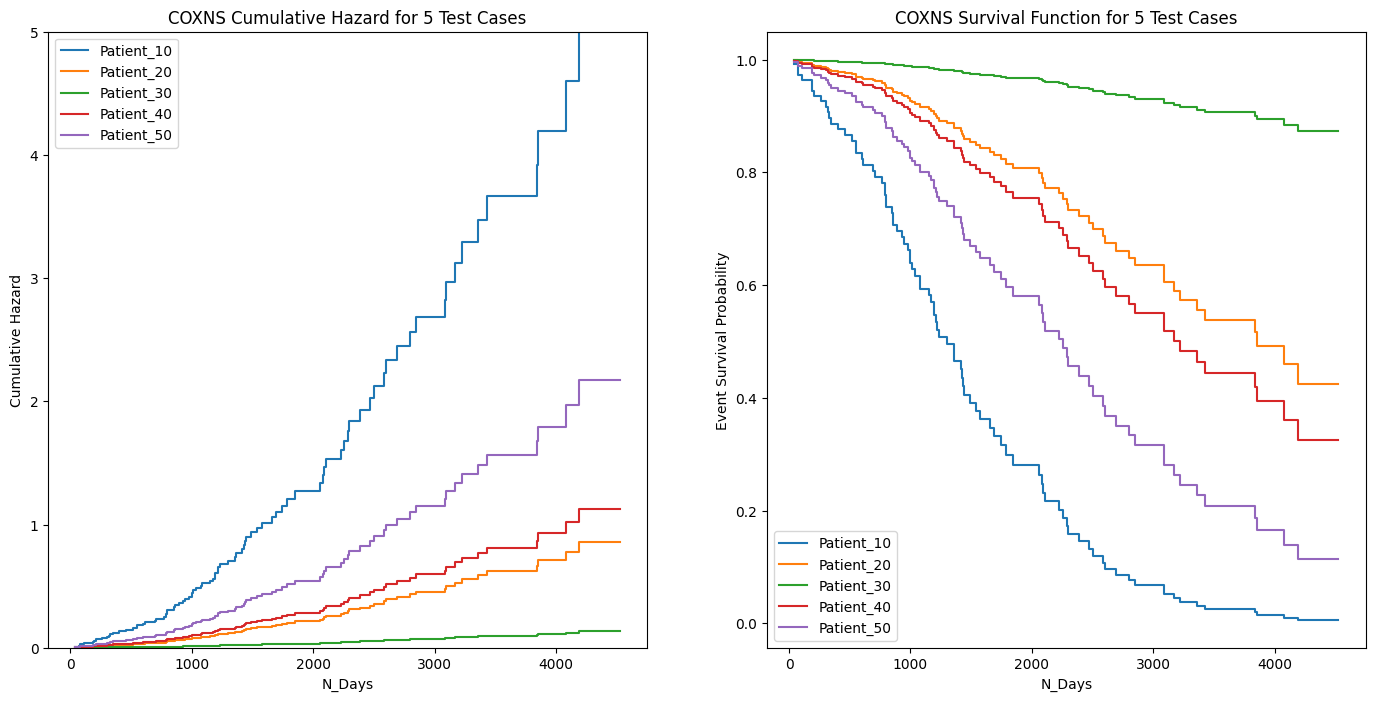

In [167]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50',]
test_case_cumulative_hazard_function = optimal_coxns_model.predict_cumulative_hazard_function(test_case)
test_case_survival_function = optimal_coxns_model.predict_survival_function(test_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(test_case_cumulative_hazard_function, test_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('COXNS Cumulative Hazard for 5 Test Cases')
ax[0].set_xlabel('N_Days')
ax[0].set_ylim(0,5)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(test_case_labels, loc="upper left")
ax[1].set_title('COXNS Survival Function for 5 Test Cases')
ax[1].set_xlabel('N_Days')
ax[1].set_ylabel('Event Survival Probability')
ax[1].legend(test_case_labels, loc="lower left")
plt.show()

### 1.6.4 Survival Tree <a class="anchor" id="1.6.4"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Survival Trees](https://www.tandfonline.com/doi/abs/10.1080/01621459.1993.10476296) are non-parametric models that partition the data into subgroups (nodes) based on the values of predictor variables, creating a tree-like structure. The tree is built by recursively splitting the data at nodes where the differences in survival times between subgroups are maximized. Each terminal node represents a different survival function. The method have no assumptions about the underlying distribution of survival times, can capture interactions between variables naturally and applies an interpretable visual representation. However, the process can be prone to overfitting, especially with small datasets, and may be less accurate compared to ensemble methods like Random Survival Forest. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves recursively splitting the data at nodes to maximize the differences in survival times between subgroups with the splitting criteria often involving statistical tests (e.g., log-rank test); choosing the best predictor variable and split point at each node that maximizes the separation of survival times; continuously splitting until stopping criteria are met (e.g., minimum number of observations in a node, maximum tree depth); and estimating the survival function based on the survival times of the observations at each terminal node.

1. The [survival tree model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.tree.SurvivalTree.html) from the <mark style="background-color: #CCECFF"><b>sksurv.tree</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">min_samples_split</span> = minimum number of samples required to split an internal node made to vary between 20 and 30
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 5 and 10
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">min_samples_split</span> = 5
    * <span style="color: #FF0000">min_samples_leaf</span> = 30
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.7931
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.8647
6. The independent test model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.8174
7. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated non-optimal differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated non-optimal profiles.

In [168]:
##################################
# Defining a function to perform 
# 5-fold cross-validation and hyperparameter tuning
# using the Survival Tree Model
##################################
def cross_validate_stree_model(X, y, hyperparameters):
    kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
    results = []

    for params in hyperparameters:
        stree_model = SurvivalTree(**params, random_state=88888888)
        fold_results = []
        
        for train_index, validation_index in kf.split(X):
            X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
            y_train, y_validation = y[train_index], y[validation_index]
            
            stree_model.fit(X_train, y_train)
            pred_survival = stree_model.predict(X_validation)
            ci = concordance_index_censored(y_validation['Status'], y_validation['N_Days'], pred_survival)[0]
            fold_results.append(ci)
        
        results.append({
            'Hyperparameters': params,
            'Concordance_Index_Mean': np.mean(fold_results),
            'Concordance_Index_Std': np.std(fold_results)
        })
    return pd.DataFrame(results)

In [169]:
##################################
# Defining hyperparameters for tuning
# using the Survival Tree Model
##################################
hyperparameters = [{'min_samples_split': 30, 'min_samples_leaf': 10},
                   {'min_samples_split': 30, 'min_samples_leaf': 5},
                   {'min_samples_split': 20, 'min_samples_leaf': 10},
                   {'min_samples_split': 20, 'min_samples_leaf': 5}]

In [170]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Survival Tree Model
##################################
cirrhosis_survival_stree_ht = cross_validate_stree_model(cirrhosis_survival_X_train_preprocessed,
                                                         cirrhosis_survival_y_train_array, 
                                                         hyperparameters)
display(cirrhosis_survival_stree_ht)

,Hyperparameters,Concordance_Index_Mean,Concordance_Index_Std
0,"{'min_samples_split': 30, 'min_samples_leaf': 10}",0.772549,0.034646
1,"{'min_samples_split': 30, 'min_samples_leaf': 5}",0.793183,0.007672
2,"{'min_samples_split': 20, 'min_samples_leaf': 10}",0.786565,0.032803
3,"{'min_samples_split': 20, 'min_samples_leaf': 5}",0.791438,0.024420


In [171]:
##################################
# Formulating a Survival Tree Model
# with optimal hyperparameters
##################################
optimal_stree_model = SurvivalTree(min_samples_split=30, min_samples_leaf=5, random_state=88888888)
optimal_stree_model.fit(cirrhosis_survival_X_train_preprocessed, cirrhosis_survival_y_train_array)

SurvivalTree(min_samples_leaf=5, min_samples_split=30, random_state=88888888)

In [172]:
##################################
# Measuring model performance of the 
# optimal Survival Tree Model
# on the train set
##################################
optimal_stree_cirrhosis_survival_y_train_pred = optimal_stree_model.predict(cirrhosis_survival_X_train_preprocessed)
optimal_stree_cirrhosis_survival_y_train_ci = concordance_index_censored(cirrhosis_survival_y_train_array['Status'], 
                                                                        cirrhosis_survival_y_train_array['N_Days'], 
                                                                        optimal_stree_cirrhosis_survival_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_stree_cirrhosis_survival_y_train_ci}")

Apparent Concordance Index: 0.8646781534460338


In [173]:
##################################
# Measuring model performance of the 
# optimal Survival Tree Model
# on the test set
##################################
optimal_stree_cirrhosis_survival_y_test_pred = optimal_stree_model.predict(cirrhosis_survival_X_test_preprocessed)
optimal_stree_cirrhosis_survival_y_test_ci = concordance_index_censored(cirrhosis_survival_y_test_array['Status'],
                                                                       cirrhosis_survival_y_test_array['N_Days'], 
                                                                       optimal_stree_cirrhosis_survival_y_test_pred)[0]
print(f"Test Concordance Index: {optimal_stree_cirrhosis_survival_y_test_ci}")

Test Concordance Index: 0.8174603174603174


In [174]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Survival Tree Model
##################################
stree_set = pd.DataFrame(["Train","Cross-Validation","Test"])
stree_ci_values = pd.DataFrame([optimal_stree_cirrhosis_survival_y_train_ci,
                                cirrhosis_survival_stree_ht.Concordance_Index_Mean.max(),
                                optimal_stree_cirrhosis_survival_y_test_ci])
stree_method = pd.DataFrame(["STREE"]*3)
stree_summary = pd.concat([stree_set, 
                           stree_ci_values,
                           stree_method], axis=1)
stree_summary.columns = ['Set', 'Concordance.Index', 'Method']
stree_summary.reset_index(inplace=True, drop=True)
display(stree_summary)

,Set,Concordance.Index,Method
0,Train,0.864678,STREE
1,Cross-Validation,0.793183,STREE
2,Test,0.817460,STREE


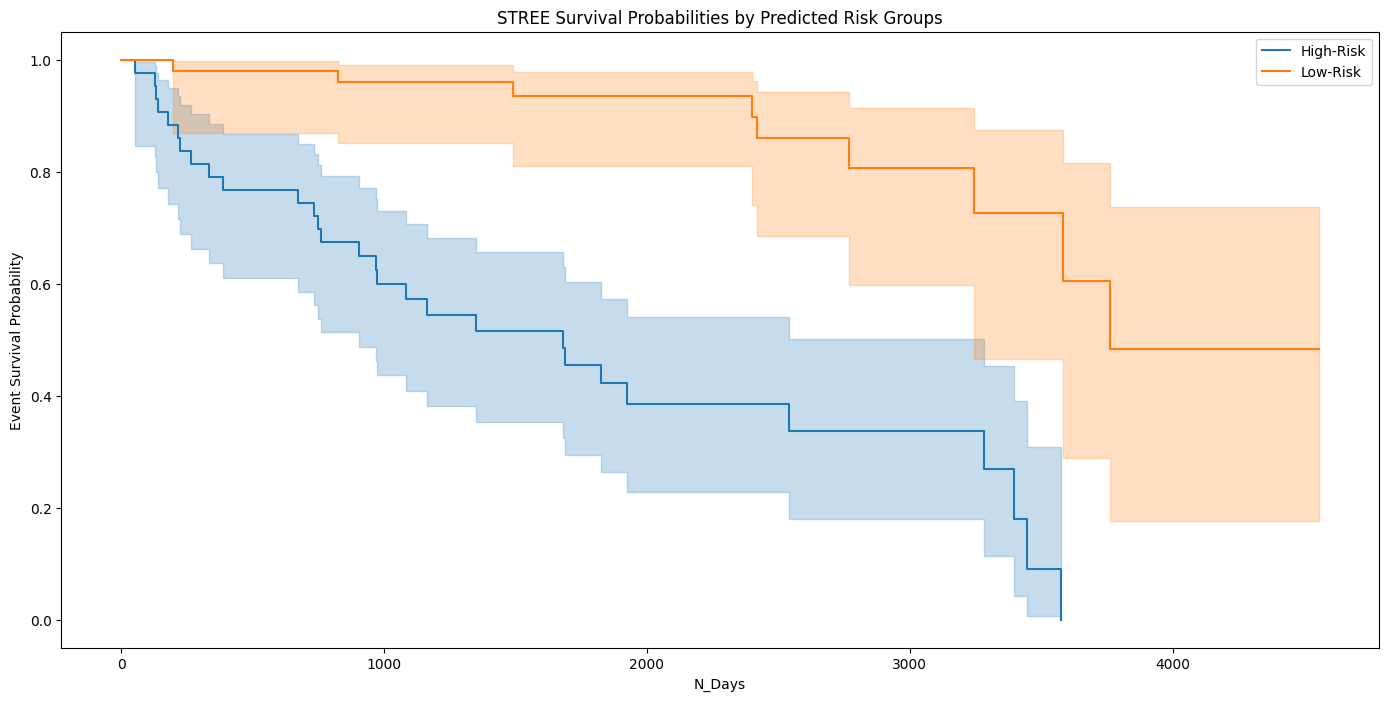

In [175]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
cirrhosis_survival_test['Predicted_Risks_STree'] = optimal_stree_cirrhosis_survival_y_test_pred
cirrhosis_survival_test['Predicted_RiskGroups_STree'] = risk_groups = pd.qcut(cirrhosis_survival_test['Predicted_Risks_STree'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('STREE Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [176]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
10,0.226982,1.530100,1.302295,1.331981,1.916467,-0.477846,-0.451305,2.250260,0.201024,0.546417,1,1,0,1,1,0,False,False,False,True
20,-0.147646,0.061189,0.793618,-1.158235,0.861264,0.625621,0.319035,0.446026,1.083875,-1.508571,1,1,0,0,0,0,False,False,False,True
30,0.296370,-1.283677,0.169685,3.237777,-1.008276,-0.873566,-0.845549,-0.351236,0.985206,-0.617113,1,1,0,0,0,0,False,False,True,False
40,0.392609,-0.096645,-0.486337,1.903146,-0.546292,-0.247141,-0.720619,-0.810790,-0.000298,1.402075,0,1,0,1,1,0,False,False,False,True
50,-0.813646,1.089037,0.064451,0.212865,2.063138,-0.224432,0.074987,2.333282,0.240640,-1.125995,0,1,0,1,1,0,False,False,False,True


In [177]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(cirrhosis_survival_y_test_array[[10, 20, 30, 40, 50]])

[( True, 1827) (False, 1447) (False, 2574) ( True, 3762) (False,  837)]


In [178]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_STree']])

   Predicted_RiskGroups_STree
10                  High-Risk
20                   Low-Risk
30                   Low-Risk
40                   Low-Risk
50                  High-Risk


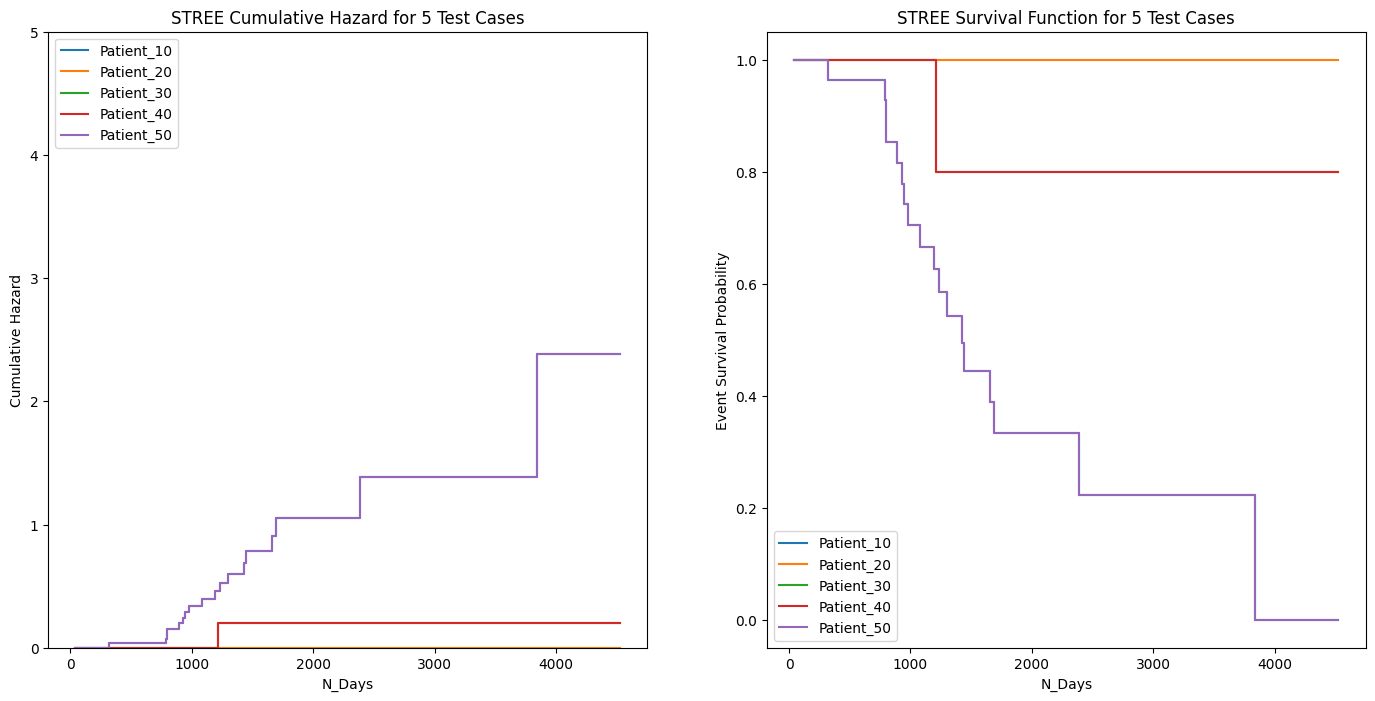

In [179]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50',]
test_case_cumulative_hazard_function = optimal_stree_model.predict_cumulative_hazard_function(test_case)
test_case_survival_function = optimal_stree_model.predict_survival_function(test_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(test_case_cumulative_hazard_function, test_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('STREE Cumulative Hazard for 5 Test Cases')
ax[0].set_xlabel('N_Days')
ax[0].set_ylim(0,5)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(test_case_labels, loc="upper left")
ax[1].set_title('STREE Survival Function for 5 Test Cases')
ax[1].set_xlabel('N_Days')
ax[1].set_ylabel('Event Survival Probability')
ax[1].legend(test_case_labels, loc="lower left")
plt.show()

### 1.6.5 Random Survival Forest <a class="anchor" id="1.6.5"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Random Survival Forest](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-3/Random-survival-forests/10.1214/08-AOAS169.full) is an ensemble method that builds multiple survival trees and averages their predictions. The model combines the predictions of multiple survival trees, each built on a bootstrap sample of the data and a random subset of predictors. It uses the concept of ensemble learning to improve predictive accuracy and robustness. As a method, it handles high-dimensional data and complex interactions between variables well; can be more accurate and robust than a single survival tree; and provides measures of variable importance. However, the process can be bomputationally intensive due to the need to build multiple trees, and may be less interpretable than single trees or parametric models like the Cox model. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves generating multiple bootstrap samples from the original dataset; building a survival tree by recursively splitting the data at nodes using a random subset of predictor variables for each bootstrap sample; combining the predictions of all survival trees to form the random survival forest and averaging the survival functions predicted by all trees in the forest to obtain the final survival function for new data.

1. The [random survival forest model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.RandomSurvivalForest.html) from the <mark style="background-color: #CCECFF"><b>sksurv.ensemble</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">n_estimators</span> = number of trees in the forest made to vary between 100, 200 and 300
    * <span style="color: #FF0000">min_samples_split</span> = minimum number of samples required to split an internal node made to vary between 10 and 20
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">n_estimators</span> = 100
    * <span style="color: #FF0000">min_samples_split</span> = 20
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.8214
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.9153
6. The independent test model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.8761
7. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.

In [180]:
##################################
# Defining a function to perform 
# 5-fold cross-validation and hyperparameter tuning
# using the Random Survival Forest Model
##################################
def cross_validate_rsf_model(X, y, hyperparameters):
    kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
    results = []

    for params in hyperparameters:
        rsf_model = RandomSurvivalForest(**params, random_state=88888888)
        fold_results = []
        
        for train_index, validation_index in kf.split(X):
            X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
            y_train, y_validation = y[train_index], y[validation_index]
            
            rsf_model.fit(X_train, y_train)
            pred_survival = rsf_model.predict(X_validation)
            ci = concordance_index_censored(y_validation['Status'], y_validation['N_Days'], pred_survival)[0]
            fold_results.append(ci)
        
        results.append({
            'Hyperparameters': params,
            'Concordance_Index_Mean': np.mean(fold_results),
            'Concordance_Index_Std': np.std(fold_results)
        })
    return pd.DataFrame(results)


In [181]:
##################################
# Defining hyperparameters for tuning
# using the Random Survival Forest Model
##################################
hyperparameters = [{'n_estimators': 100, 'min_samples_split': 20},
                   {'n_estimators': 100, 'min_samples_split': 10},
                   {'n_estimators': 200, 'min_samples_split': 20},
                   {'n_estimators': 200, 'min_samples_split': 10},
                   {'n_estimators': 300, 'min_samples_split': 20},
                   {'n_estimators': 300, 'min_samples_split': 10}]

In [182]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Random Survival Forest Model
##################################
cirrhosis_survival_rsf_ht = cross_validate_rsf_model(cirrhosis_survival_X_train_preprocessed,
                                                     cirrhosis_survival_y_train_array, 
                                                     hyperparameters)
display(cirrhosis_survival_rsf_ht)

,Hyperparameters,Concordance_Index_Mean,Concordance_Index_Std
0,"{'n_estimators': 100, 'min_samples_split': 20}",0.816404,0.043497
1,"{'n_estimators': 100, 'min_samples_split': 10}",0.817170,0.049687
2,"{'n_estimators': 200, 'min_samples_split': 20}",0.815659,0.048627
3,"{'n_estimators': 200, 'min_samples_split': 10}",0.815102,0.052289
4,"{'n_estimators': 300, 'min_samples_split': 20}",0.815549,0.047817
5,"{'n_estimators': 300, 'min_samples_split': 10}",0.817380,0.052828


In [183]:
##################################
# Formulating a Random Survival Forest Model
# with optimal hyperparameters
##################################
optimal_rsf_model = RandomSurvivalForest(n_estimators=100, min_samples_split=10, random_state=88888888)
optimal_rsf_model.fit(cirrhosis_survival_X_train_preprocessed, cirrhosis_survival_y_train_array)

RandomSurvivalForest(min_samples_split=10, random_state=88888888)

In [184]:
##################################
# Measuring model performance of the 
# optimal Random Survival Forest Model
# on the train set
##################################
optimal_rsf_cirrhosis_survival_y_train_pred = optimal_rsf_model.predict(cirrhosis_survival_X_train_preprocessed)
optimal_rsf_cirrhosis_survival_y_train_ci = concordance_index_censored(cirrhosis_survival_y_train_array['Status'], 
                                                                       cirrhosis_survival_y_train_array['N_Days'], 
                                                                       optimal_rsf_cirrhosis_survival_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_rsf_cirrhosis_survival_y_train_ci}")

Apparent Concordance Index: 0.9140117035110533


In [185]:
##################################
# Measuring model performance of the 
# optimal Random Survival Forest Model
# on the test set
##################################
optimal_rsf_cirrhosis_survival_y_test_pred = optimal_rsf_model.predict(cirrhosis_survival_X_test_preprocessed)
optimal_rsf_cirrhosis_survival_y_test_ci = concordance_index_censored(cirrhosis_survival_y_test_array['Status'], 
                                                                      cirrhosis_survival_y_test_array['N_Days'], 
                                                                      optimal_rsf_cirrhosis_survival_y_test_pred)[0]
print(f"Test Concordance Index: {optimal_rsf_cirrhosis_survival_y_test_ci}")

Test Concordance Index: 0.8761904761904762


In [186]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Random Survival Forest Model
##################################
rsf_set = pd.DataFrame(["Train","Cross-Validation","Test"])
rsf_ci_values = pd.DataFrame([optimal_rsf_cirrhosis_survival_y_train_ci,
                              cirrhosis_survival_rsf_ht.Concordance_Index_Mean.max(),
                                optimal_rsf_cirrhosis_survival_y_test_ci])
rsf_method = pd.DataFrame(["RSF"]*3)
rsf_summary = pd.concat([rsf_set, 
                           rsf_ci_values,
                           rsf_method], axis=1)
rsf_summary.columns = ['Set', 'Concordance.Index', 'Method']
rsf_summary.reset_index(inplace=True, drop=True)
display(rsf_summary)

,Set,Concordance.Index,Method
0,Train,0.914012,RSF
1,Cross-Validation,0.817380,RSF
2,Test,0.876190,RSF


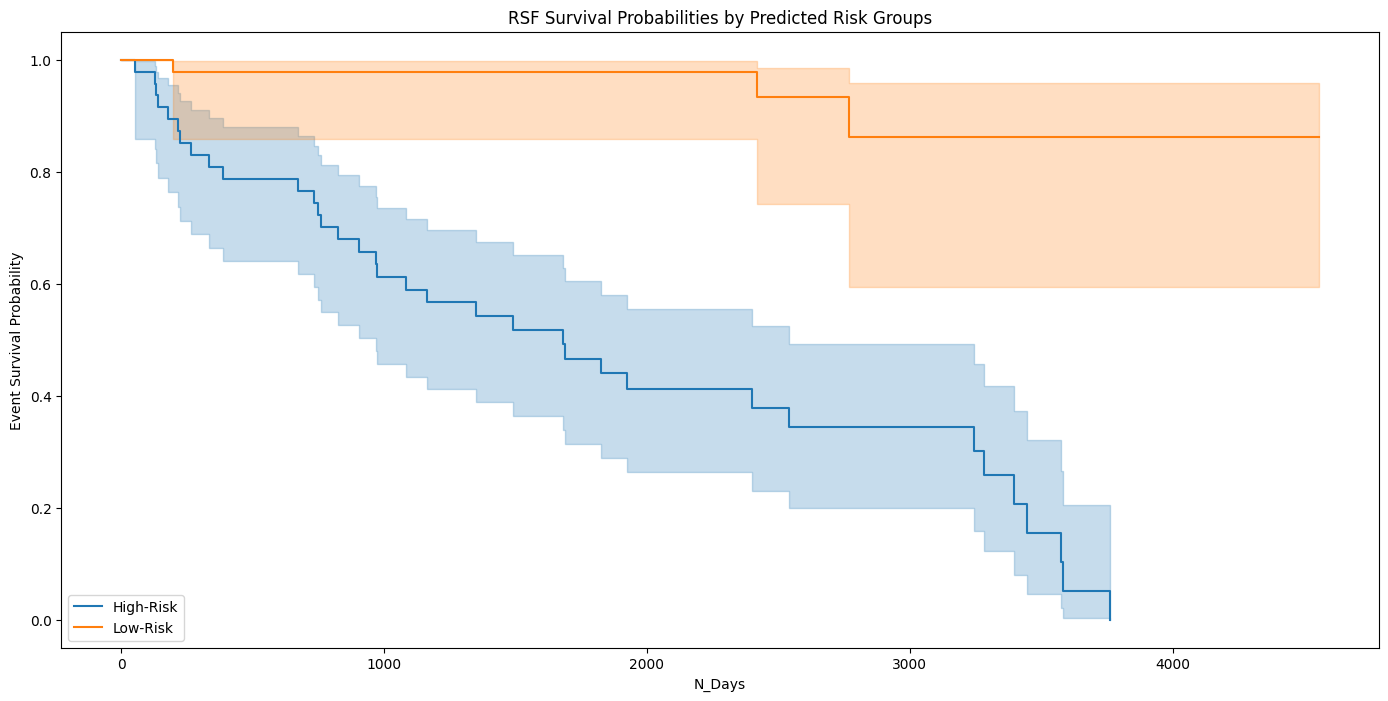

In [187]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
cirrhosis_survival_test['Predicted_Risks_RSF'] = optimal_rsf_cirrhosis_survival_y_test_pred
cirrhosis_survival_test['Predicted_RiskGroups_RSF'] = risk_groups = pd.qcut(cirrhosis_survival_test['Predicted_Risks_RSF'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('RSF Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [188]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
10,0.226982,1.530100,1.302295,1.331981,1.916467,-0.477846,-0.451305,2.250260,0.201024,0.546417,1,1,0,1,1,0,False,False,False,True
20,-0.147646,0.061189,0.793618,-1.158235,0.861264,0.625621,0.319035,0.446026,1.083875,-1.508571,1,1,0,0,0,0,False,False,False,True
30,0.296370,-1.283677,0.169685,3.237777,-1.008276,-0.873566,-0.845549,-0.351236,0.985206,-0.617113,1,1,0,0,0,0,False,False,True,False
40,0.392609,-0.096645,-0.486337,1.903146,-0.546292,-0.247141,-0.720619,-0.810790,-0.000298,1.402075,0,1,0,1,1,0,False,False,False,True
50,-0.813646,1.089037,0.064451,0.212865,2.063138,-0.224432,0.074987,2.333282,0.240640,-1.125995,0,1,0,1,1,0,False,False,False,True


In [189]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(cirrhosis_survival_y_test_array[[10, 20, 30, 40, 50]])

[( True, 1827) (False, 1447) (False, 2574) ( True, 3762) (False,  837)]


In [190]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_RSF']])

   Predicted_RiskGroups_RSF
10                High-Risk
20                High-Risk
30                 Low-Risk
40                High-Risk
50                High-Risk


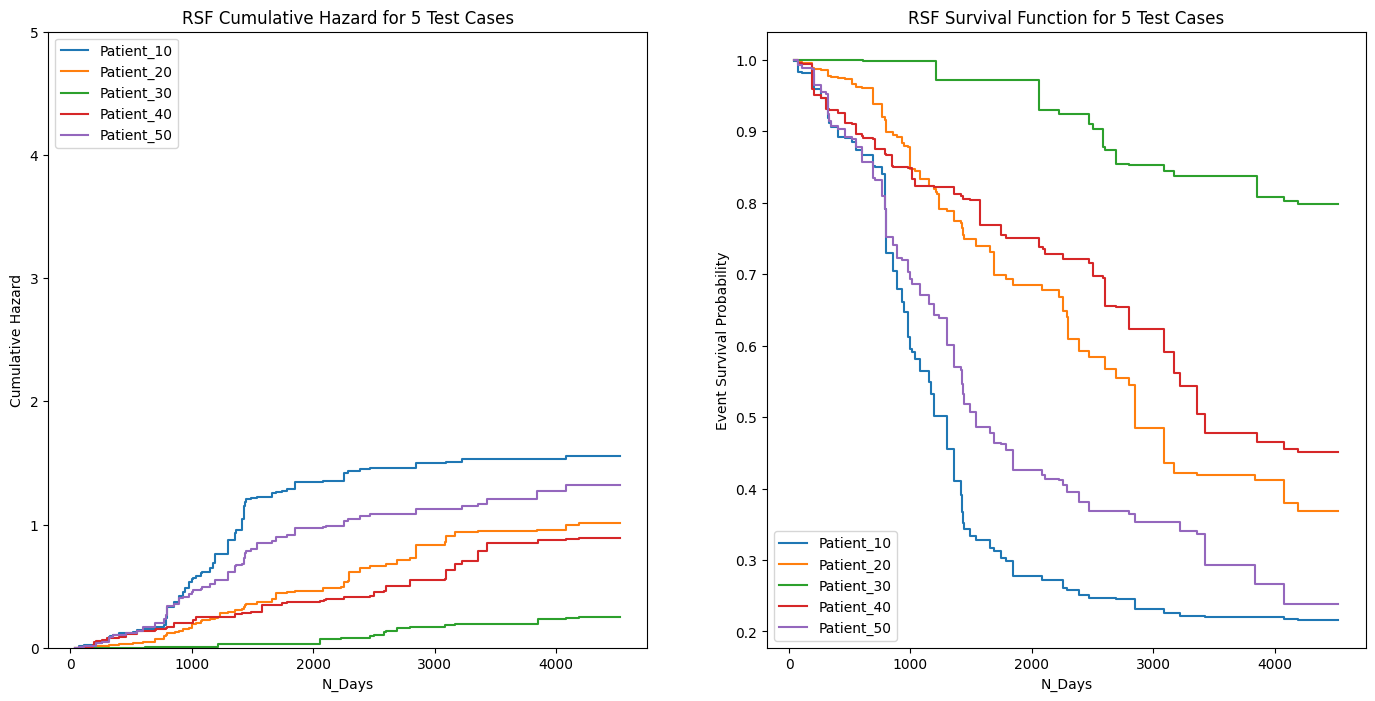

In [191]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50',]
test_case_cumulative_hazard_function = optimal_rsf_model.predict_cumulative_hazard_function(test_case)
test_case_survival_function = optimal_rsf_model.predict_survival_function(test_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(test_case_cumulative_hazard_function, test_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('RSF Cumulative Hazard for 5 Test Cases')
ax[0].set_xlabel('N_Days')
ax[0].set_ylim(0,5)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(test_case_labels, loc="upper left")
ax[1].set_title('RSF Survival Function for 5 Test Cases')
ax[1].set_xlabel('N_Days')
ax[1].set_ylabel('Event Survival Probability')
ax[1].legend(test_case_labels, loc="lower left")
plt.show()

### 1.6.6 Gradient Boosted Survival <a class="anchor" id="1.6.6"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Gradient Boosted Survival](https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full) is an ensemble technique that builds a series of survival trees, where each tree tries to correct the errors of the previous one. The model uses boosting, a sequential technique where each new tree is fit to the residuals of the combined previous trees, and combines the predictions of all the trees to produce a final prediction. As a method, it has high predictive accuracy, the ability to model complex relationships, and reduces bias and variance compared to single-tree models. However, the process can even be more computationally intensive than Random Survival Forest, requires careful tuning of multiple hyperparameters, and makes interpretation challenging due to the complex nature of the model. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves starting with an initial prediction (often the median survival time or a simple model); calculating the residuals (errors) of the current model's predictions; fitting a survival tree to the residuals to learn the errors made by the current model; updating the current model by adding the new tree weighted by a learning rate parameter; repeating previous steps for a fixed number of iterations or until convergence; and summing the predictions of all trees in the sequence to obtain the final survival function for new data.

1. The [random survival forest model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.GradientBoostingSurvivalAnalysis.html) from the <mark style="background-color: #CCECFF"><b>sksurv.ensemble</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">n_estimators</span> = number of regression trees to create made to vary between 100, 200 and 300
    * <span style="color: #FF0000">learning_rate</span> = shrinkage parameter for the contribution of each tree made to vary between 0.05 and 0.10
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">n_estimators</span> = 100
    * <span style="color: #FF0000">learning_rate</span> = 0.05
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.8051
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.9280
6. The independent test model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.8657
7. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.

In [192]:
##################################
# Defining a function to perform 
# 5-fold cross-validation and hyperparameter tuning
# using the Gradient Boosted Survival Model
##################################
def cross_validate_gbs_model(X, y, hyperparameters):
    kf = KFold(n_splits=5, shuffle=True, random_state=88888888)
    results = []

    for params in hyperparameters:
        gbs_model = GradientBoostingSurvivalAnalysis(**params, random_state=88888888)
        fold_results = []
        
        for train_index, validation_index in kf.split(X):
            X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
            y_train, y_validation = y[train_index], y[validation_index]
            
            gbs_model.fit(X_train, y_train)
            pred_survival = gbs_model.predict(X_validation)
            ci = concordance_index_censored(y_validation['Status'], y_validation['N_Days'], pred_survival)[0]
            fold_results.append(ci)
        
        results.append({
            'Hyperparameters': params,
            'Concordance_Index_Mean': np.mean(fold_results),
            'Concordance_Index_Std': np.std(fold_results)
        })
    return pd.DataFrame(results)

In [193]:
##################################
# Defining hyperparameters for tuning
# using the Gradient Boosted Survival Model
##################################
hyperparameters = [{'n_estimators': 100, 'learning_rate': 0.10},
                   {'n_estimators': 100, 'learning_rate': 0.05},
                   {'n_estimators': 200, 'learning_rate': 0.10},
                   {'n_estimators': 200, 'learning_rate': 0.05},
                   {'n_estimators': 300, 'learning_rate': 0.10},
                   {'n_estimators': 300, 'learning_rate': 0.05}]

In [194]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Gradient Boosted Survival Model
##################################
cirrhosis_survival_gbs_ht = cross_validate_gbs_model(cirrhosis_survival_X_train_preprocessed,
                                                     cirrhosis_survival_y_train_array, 
                                                     hyperparameters)
display(cirrhosis_survival_gbs_ht)

,Hyperparameters,Concordance_Index_Mean,Concordance_Index_Std
0,"{'n_estimators': 100, 'learning_rate': 0.1}",0.800822,0.038410
1,"{'n_estimators': 100, 'learning_rate': 0.05}",0.805171,0.039901
2,"{'n_estimators': 200, 'learning_rate': 0.1}",0.800767,0.037214
3,"{'n_estimators': 200, 'learning_rate': 0.05}",0.799043,0.037200
4,"{'n_estimators': 300, 'learning_rate': 0.1}",0.800466,0.032817
5,"{'n_estimators': 300, 'learning_rate': 0.05}",0.798193,0.035516


In [195]:
##################################
# Formulating a Gradient Boosted Survival Model
# with optimal hyperparameters
##################################
optimal_gbs_model = GradientBoostingSurvivalAnalysis(n_estimators=100, learning_rate=0.05, random_state=88888888)
optimal_gbs_model.fit(cirrhosis_survival_X_train_preprocessed, cirrhosis_survival_y_train_array)

GradientBoostingSurvivalAnalysis(learning_rate=0.05, random_state=88888888)

In [196]:
##################################
# Measuring model performance of the 
# optimal Gradient Boosted Survival Model
# on the train set
##################################
optimal_gbs_cirrhosis_survival_y_train_pred = optimal_gbs_model.predict(cirrhosis_survival_X_train_preprocessed)
optimal_gbs_cirrhosis_survival_y_train_ci = concordance_index_censored(cirrhosis_survival_y_train_array['Status'], 
                                                                       cirrhosis_survival_y_train_array['N_Days'], 
                                                                       optimal_gbs_cirrhosis_survival_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_gbs_cirrhosis_survival_y_train_ci}")

Apparent Concordance Index: 0.9280721716514955


In [197]:
##################################
# Measuring model performance of the 
# optimal Gradient Boosted Survival Model
# on the test set
##################################
optimal_gbs_cirrhosis_survival_y_test_pred = optimal_gbs_model.predict(cirrhosis_survival_X_test_preprocessed)
optimal_gbs_cirrhosis_survival_y_test_ci = concordance_index_censored(cirrhosis_survival_y_test_array['Status'], 
                                                                      cirrhosis_survival_y_test_array['N_Days'], 
                                                                      optimal_gbs_cirrhosis_survival_y_test_pred)[0]
print(f"Test Concordance Index: {optimal_gbs_cirrhosis_survival_y_test_ci}")

Test Concordance Index: 0.8657596371882086


In [198]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Gradient Boosted Survival Model
##################################
gbs_set = pd.DataFrame(["Train","Cross-Validation","Test"])
gbs_ci_values = pd.DataFrame([optimal_gbs_cirrhosis_survival_y_train_ci,
                              cirrhosis_survival_gbs_ht.Concordance_Index_Mean.max(),
                                optimal_gbs_cirrhosis_survival_y_test_ci])
gbs_method = pd.DataFrame(["GBS"]*3)
gbs_summary = pd.concat([gbs_set, 
                           gbs_ci_values,
                           gbs_method], axis=1)
gbs_summary.columns = ['Set', 'Concordance.Index', 'Method']
gbs_summary.reset_index(inplace=True, drop=True)
display(gbs_summary)

,Set,Concordance.Index,Method
0,Train,0.928072,GBS
1,Cross-Validation,0.805171,GBS
2,Test,0.865760,GBS


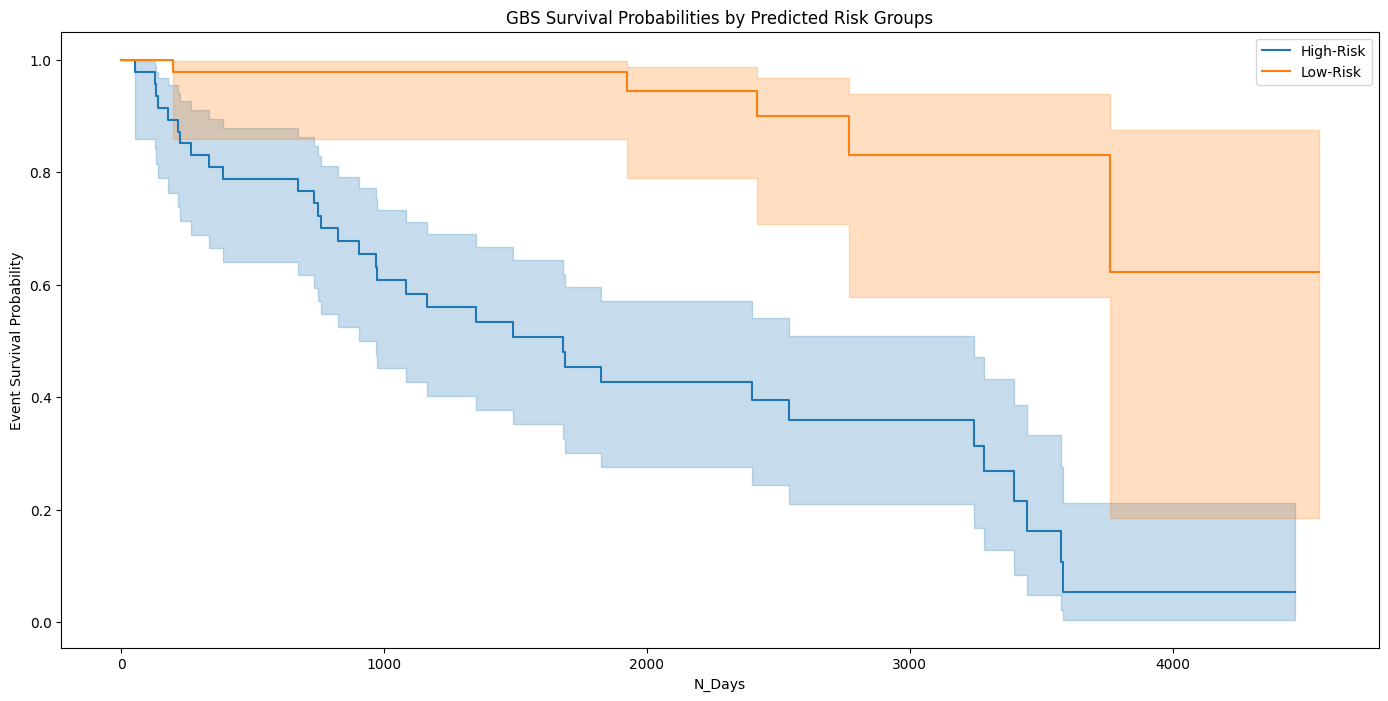

In [199]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
cirrhosis_survival_test.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
cirrhosis_survival_test['Predicted_Risks_GBS'] = optimal_gbs_cirrhosis_survival_y_test_pred
cirrhosis_survival_test['Predicted_RiskGroups_GBS'] = risk_groups = pd.qcut(cirrhosis_survival_test['Predicted_Risks_GBS'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = cirrhosis_survival_test[risk_groups == group]
    kmf.fit(group_data['N_Days'], event_observed=group_data['Status'], label=group)
    kmf.plot_survival_function()

plt.title('GBS Survival Probabilities by Predicted Risk Groups')
plt.xlabel('N_Days')
plt.ylabel('Event Survival Probability')
plt.show()

In [200]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
test_case_details = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
display(test_case_details)

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
10,0.226982,1.530100,1.302295,1.331981,1.916467,-0.477846,-0.451305,2.250260,0.201024,0.546417,1,1,0,1,1,0,False,False,False,True
20,-0.147646,0.061189,0.793618,-1.158235,0.861264,0.625621,0.319035,0.446026,1.083875,-1.508571,1,1,0,0,0,0,False,False,False,True
30,0.296370,-1.283677,0.169685,3.237777,-1.008276,-0.873566,-0.845549,-0.351236,0.985206,-0.617113,1,1,0,0,0,0,False,False,True,False
40,0.392609,-0.096645,-0.486337,1.903146,-0.546292,-0.247141,-0.720619,-0.810790,-0.000298,1.402075,0,1,0,1,1,0,False,False,False,True
50,-0.813646,1.089037,0.064451,0.212865,2.063138,-0.224432,0.074987,2.333282,0.240640,-1.125995,0,1,0,1,1,0,False,False,False,True


In [201]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(cirrhosis_survival_y_test_array[[10, 20, 30, 40, 50]])

[( True, 1827) (False, 1447) (False, 2574) ( True, 3762) (False,  837)]


In [202]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(cirrhosis_survival_test.loc[[10, 20, 30, 40, 50]][['Predicted_RiskGroups_GBS']])

   Predicted_RiskGroups_GBS
10                High-Risk
20                 Low-Risk
30                 Low-Risk
40                 Low-Risk
50                High-Risk


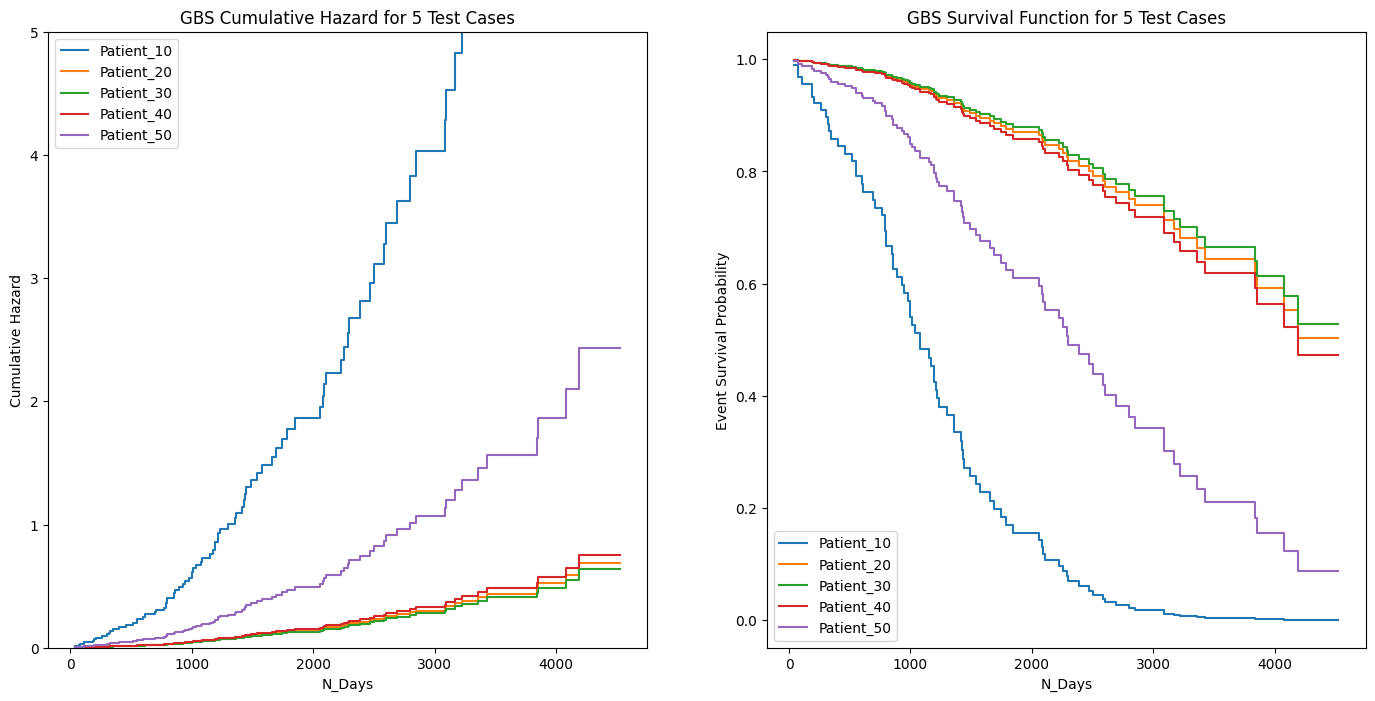

In [203]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 test cases
##################################
test_case = cirrhosis_survival_X_test_preprocessed.iloc[[10, 20, 30, 40, 50]]
test_case_labels = ['Patient_10','Patient_20','Patient_30','Patient_40','Patient_50',]
test_case_cumulative_hazard_function = optimal_gbs_model.predict_cumulative_hazard_function(test_case)
test_case_survival_function = optimal_gbs_model.predict_survival_function(test_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(test_case_cumulative_hazard_function, test_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('GBS Cumulative Hazard for 5 Test Cases')
ax[0].set_xlabel('N_Days')
ax[0].set_ylim(0,5)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(test_case_labels, loc="upper left")
ax[1].set_title('GBS Survival Function for 5 Test Cases')
ax[1].set_xlabel('N_Days')
ax[1].set_ylabel('Event Survival Probability')
ax[1].legend(test_case_labels, loc="lower left")
plt.show()

## 1.7. Consolidated Findings <a class="anchor" id="1.7"></a>

1. The choice of survival model will depend on a number of factors including assumptions, model complexity and variable selection capabilities.
    * [Cox proportional hazards regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) offers a simpler, well-understood, and straightforward interpretation, but assumes proportional hazards and may be less effective with high-dimensional data.
    * [Cox net survival](https://doi.org/10.18637/jss.v039.i05) handles high-dimensional data, performs variable selection, and manages multicollinearity, but may be more complex and requires parameter tuning.
    * [Survival trees](https://www.tandfonline.com/doi/abs/10.1080/01621459.1993.10476296) require no assumptions about survival time distribution and naturally capture interactions, but may be prone to overfitting and less accurate. 
    * [Random survival forest](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-3/Random-survival-forests/10.1214/08-AOAS169.full) is robust against high-dimensional data and provides variable importance, but may be computationally intensive and less interpretable.
    * [Gradient boosted survival](https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full) models complex relationships while reducing bias and variance, but may be highly computationally intensive, needs complex tuning and requires challenging interpretation.
2. Comparing all results from the survival models formulated, the viable models for prediction can be any of the following:
    * [Random survival forest](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-3/Random-survival-forests/10.1214/08-AOAS169.full) 
        * Demonstrated the best independent cross-validated (**Concordance Index** = 0.8214) and test (**Concordance Index** = 0.8761) model performance 
        * Showed considerable overfit between the train (**Concordance Index** = 0.9153) and cross-validated (**Concordance Index** = 0.8214) model performance
        * Demonstrated good survival profile differentiation between the risk groups
        * Hazard and survival probability estimations for 5 sampled cases demonstrated reasonable profiles
        * Allows for the estimation of permutation-based variable importance which might aid in better interpretation
    * [Cox proportional hazards regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x)
        * Demonstrated the second highest independent cross-validated (**Concordance Index** = 0.8136) and test (**Concordance Index** = 0.8743) model performance 
        * Showed minimal overfit between the train (**Concordance Index** = 0.8485) and cross-validated (**Concordance Index** = 0.8136) model performance
        * Demonstrated good survival profile differentiation between the risk groups
        * Hazard and survival probability estimations for 5 sampled cases demonstrated reasonable profiles
        * Allows for the estimation of absolute coefficient-based variable importance which might aid in better interpretation
3. The feature importance evaluation for the [random survival forest](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-3/Random-survival-forests/10.1214/08-AOAS169.full) and [cox proportional hazards regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) determined the following predictors as the most relevant during prediction:
    * <span style="color: #FF0000">Bilirubin</span>
    * <span style="color: #FF0000">Prothrombin</span>

In [204]:
##################################
# Consolidating all the
# model performance metrics
##################################
model_performance_comparison = pd.concat([coxph_summary, 
                                          coxns_summary,
                                          stree_summary, 
                                          rsf_summary,
                                          gbs_summary], 
                                         axis=0,
                                         ignore_index=True)
print('Survival Model Comparison: ')
display(model_performance_comparison)

Survival Model Comparison: 


,Set,Concordance.Index,Method
0,Train,0.848586,COXPH
1,Cross-Validation,0.813656,COXPH
2,Test,0.874376,COXPH
3,Train,0.847204,COXNS
4,Cross-Validation,0.812264,COXNS
5,Test,0.871655,COXNS
6,Train,0.864678,STREE
7,Cross-Validation,0.793183,STREE
8,Test,0.817460,STREE
9,Train,0.914012,RSF


In [205]:
##################################
# Consolidating the concordance indices
# for all sets and models
##################################
set_labels = ['Train','Cross-Validation','Test']
coxph_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                         (model_performance_comparison['Set'] == 'Cross-Validation') |
                                         (model_performance_comparison['Set'] == 'Test')) & 
                                        (model_performance_comparison['Method']=='COXPH')]['Concordance.Index'].values
coxns_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                         (model_performance_comparison['Set'] == 'Cross-Validation') |
                                         (model_performance_comparison['Set'] == 'Test')) & 
                                        (model_performance_comparison['Method']=='COXNS')]['Concordance.Index'].values
stree_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                         (model_performance_comparison['Set'] == 'Cross-Validation') |
                                         (model_performance_comparison['Set'] == 'Test')) & 
                                        (model_performance_comparison['Method']=='STREE')]['Concordance.Index'].values
rsf_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                         (model_performance_comparison['Set'] == 'Cross-Validation') |
                                         (model_performance_comparison['Set'] == 'Test')) &  
                                        (model_performance_comparison['Method']=='RSF')]['Concordance.Index'].values
gbs_ci = model_performance_comparison[((model_performance_comparison['Set'] == 'Train') |
                                         (model_performance_comparison['Set'] == 'Cross-Validation') |
                                         (model_performance_comparison['Set'] == 'Test')) & 
                                        (model_performance_comparison['Method']=='GBS')]['Concordance.Index'].values

In [206]:
##################################
# Plotting the values for the
# concordance indices
# for all models
##################################
ci_plot = pd.DataFrame({'COXPH': list(coxph_ci),
                        'COXNS': list(coxns_ci),
                        'STREE': list(stree_ci),
                        'RSF': list(rsf_ci),
                        'GBS': list(gbs_ci)},
                       index = set_labels)
display(ci_plot)

,COXPH,COXNS,STREE,RSF,GBS
Train,0.848586,0.847204,0.864678,0.914012,0.928072
Cross-Validation,0.813656,0.812264,0.793183,0.817380,0.805171
Test,0.874376,0.871655,0.817460,0.876190,0.865760


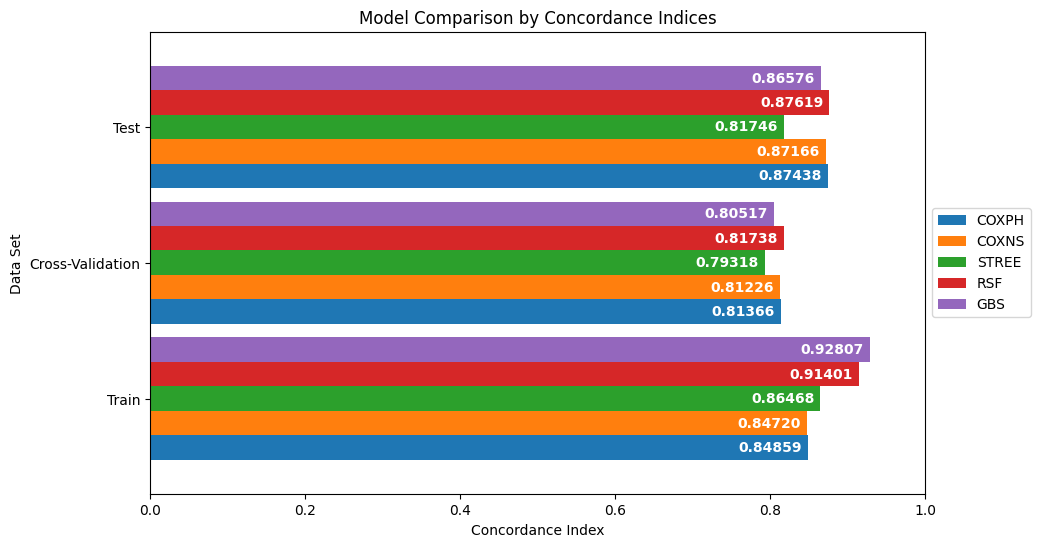

In [207]:
##################################
# Plotting all the concordance indices
# for all models
##################################
ci_plot = ci_plot.plot.barh(figsize=(10, 6), width=0.90)
ci_plot.set_xlim(0.00,1.00)
ci_plot.set_title("Model Comparison by Concordance Indices")
ci_plot.set_xlabel("Concordance Index")
ci_plot.set_ylabel("Data Set")
ci_plot.grid(False)
ci_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ci_plot.containers:
    ci_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

In [208]:
##################################
# Determining the Random Survival Forest model
# permutation-based feature importance 
# on train data
##################################
rfs_train_feature_importance = permutation_importance(optimal_rsf_model,
                                                cirrhosis_survival_X_train_preprocessed, 
                                                cirrhosis_survival_y_train_array, 
                                                n_repeats=15, 
                                                random_state=88888888)

rsf_train_feature_importance_summary = pd.DataFrame(
    {k: rfs_train_feature_importance[k]
     for k in ("importances_mean", "importances_std")}, 
    index=cirrhosis_survival_X_train_preprocessed.columns).sort_values(by="importances_mean", ascending=False)
rsf_train_feature_importance_summary.columns = ['Importances.Mean', 'Importances.Std']
display(rsf_train_feature_importance_summary)

,Importances.Mean,Importances.Std
Bilirubin,0.061368,0.011648
Prothrombin,0.020953,0.004007
Copper,0.019972,0.006418
Age,0.017111,0.002376
Cholesterol,0.014624,0.002186
Albumin,0.013367,0.002622
Tryglicerides,0.008442,0.001529
SGOT,0.008138,0.001554
Stage_4.0,0.007694,0.002052
Platelets,0.007369,0.001906


In [209]:
##################################
# Determining the Cox Proportional Hazards Regression model
# absolute coefficient-based feature importance 
# on train data
##################################
coxph_train_feature_importance = pd.DataFrame(
    {'Signed.Coefficient': optimal_coxph_model.coef_,
    'Absolute.Coefficient': np.abs(optimal_coxph_model.coef_)}, index=cirrhosis_survival_X_train_preprocessed.columns)
display(coxph_train_feature_importance.sort_values('Absolute.Coefficient', ascending=False))

,Signed.Coefficient,Absolute.Coefficient
Bilirubin,0.624673,0.624673
Prothrombin,0.349448,0.349448
Age,0.309594,0.309594
Edema,0.304485,0.304485
Stage_4.0,0.167935,0.167935
Albumin,-0.166835,0.166835
SGOT,0.160465,0.160465
Stage_1.0,-0.144274,0.144274
Copper,0.137420,0.137420
Tryglicerides,0.122772,0.122772


# 2. Summary <a class="anchor" id="Summary"></a>

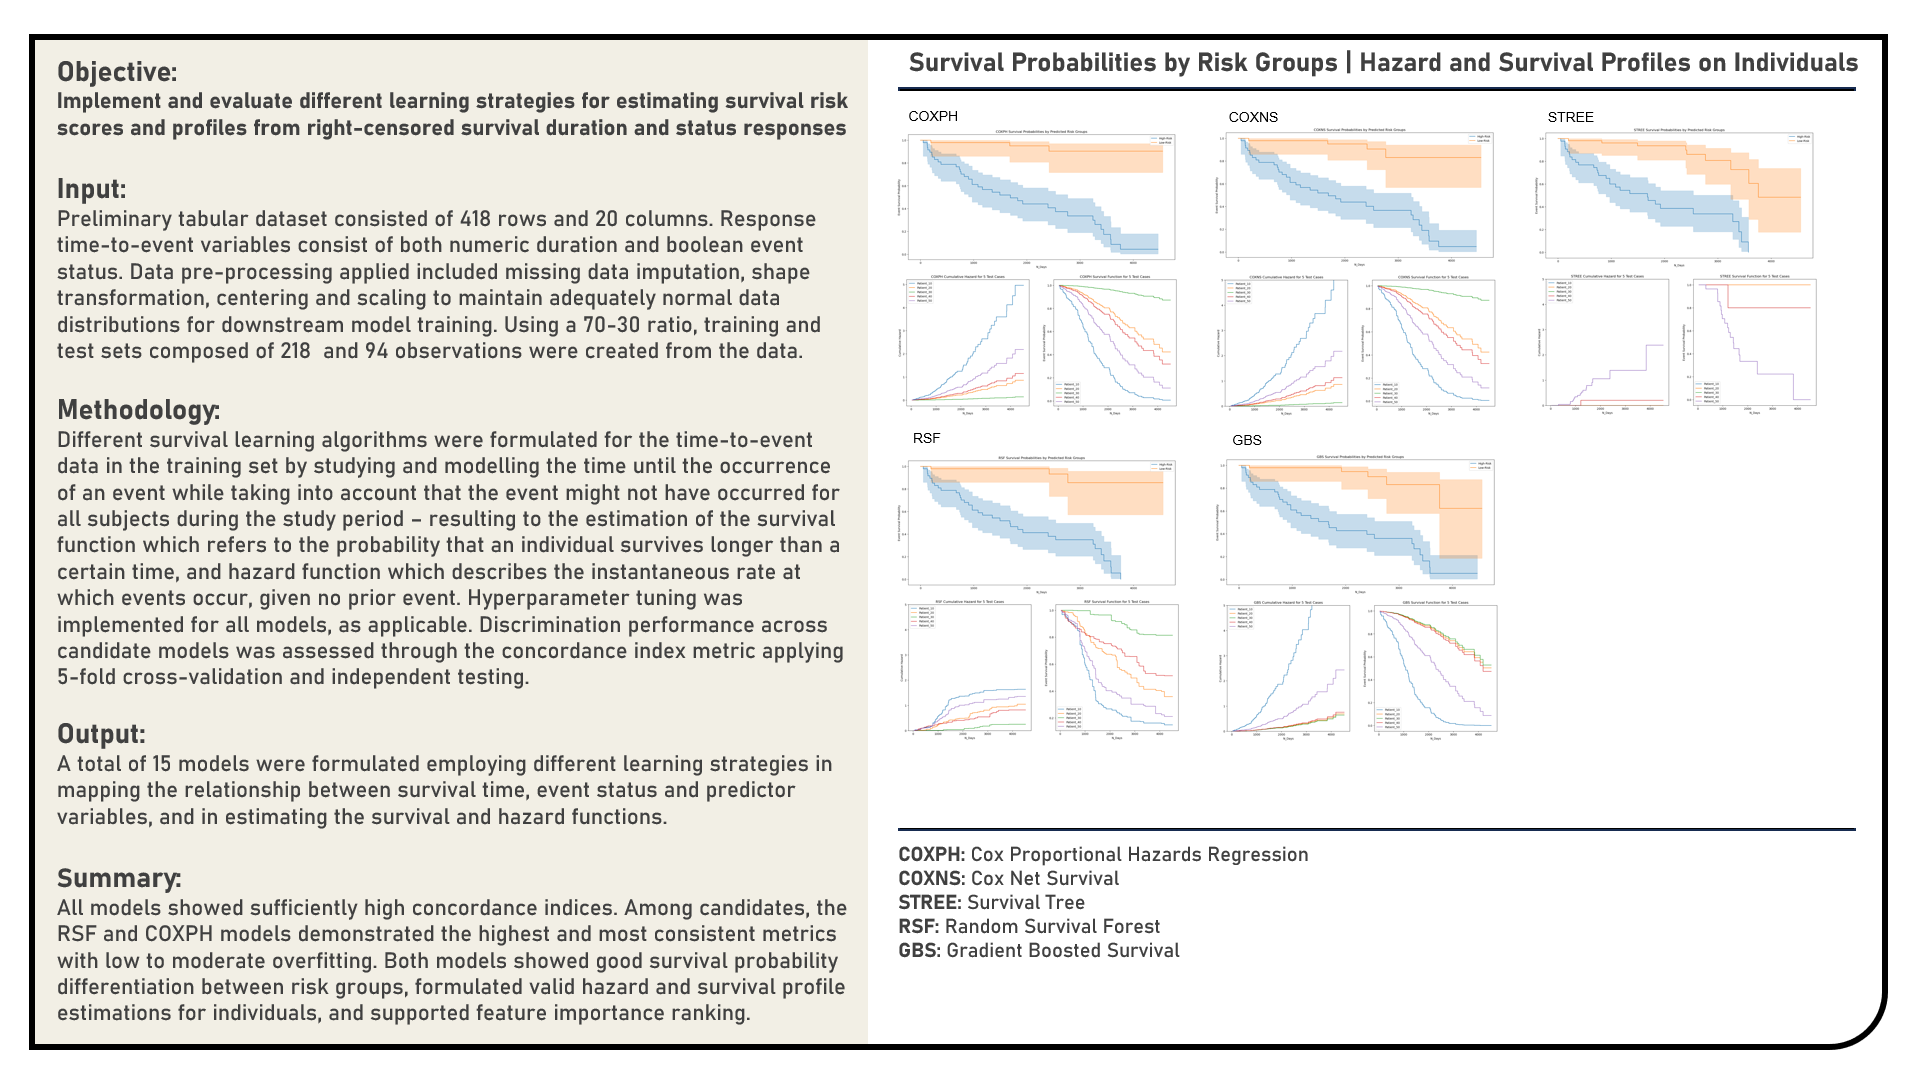

# 3. References <a class="anchor" id="References"></a>

* **[Book]** [Clinical Prediction Models](http://clinicalpredictionmodels.org/) by Ewout Steyerberg
* **[Book]** [Survival Analysis: A Self-Learning Text](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) by David Kleinbaum and Mitchel Klein
* **[Book]** [Applied Survival Analysis Using R](https://link.springer.com/book/10.1007/978-3-319-31245-3/) by Dirk Moore
* **[Python Library API]** [SciKit-Survival](https://pypi.org/project/scikit-survival/) by SciKit-Survival Team
* **[Python Library API]** [SciKit-Learn](https://scikit-learn.org/stable/index.html) by SciKit-Learn Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Python Library API]** [Lifelines](https://lifelines.readthedocs.io/en/latest/) by Lifelines Team
* **[Article]** [Exploring Time-to-Event with Survival Analysis](https://towardsdatascience.com/exploring-time-to-event-with-survival-analysis-8b0a7a33a7be) by Olivia Tanuwidjaja (Towards Data Science)
* **[Article]** [The Complete Introduction to Survival Analysis in Python](https://towardsdatascience.com/the-complete-introduction-to-survival-analysis-in-python-7523e17737e6) by Marco Peixeiro (Towards Data Science)
* **[Article]** [Survival Analysis Simplified: Explaining and Applying with Python](https://medium.com/@zynp.atlii/survival-analysis-simplified-explaining-and-applying-with-python-7efacf86ba32) by Zeynep Atli (Towards Data Science)
* **[Article]** [Survival Analysis in Python (KM Estimate, Cox-PH and AFT Model)](https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d) by Rahul Raoniar (Medium)
* **[Article]** [How to Evaluate Survival Analysis Models)](https://towardsdatascience.com/how-to-evaluate-survival-analysis-models-dd67bc10caae) by Nicolo Cosimo Albanese (Towards Data Science)
* **[Article]** [Survival Analysis with Python Tutorial — How, What, When, and Why)](https://pub.towardsai.net/survival-analysis-with-python-tutorial-how-what-when-and-why-19a5cfb3c312) by Towards AI Team (Medium)
* **[Article]** [Survival Analysis: Predict Time-To-Event With Machine Learning)](https://towardsdatascience.com/survival-analysis-predict-time-to-event-with-machine-learning-part-i-ba52f9ab9a46) by Lina Faik (Medium)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 1](https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html) by Pratik Shukla (KDNuggets)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 2](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-2.html) by Pratik Shukla (KDNuggets)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 3](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Pratik Shukla (KDNuggets)
* **[Kaggle Project]** [Survival Analysis with Cox Model Implementation](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Bryan Boulé (Kaggle)
* **[Kaggle Project]** [Survival Analysis](https://www.kaggle.com/code/gunesevitan/survival-analysis/notebook) by Gunes Evitan (Kaggle)
* **[Kaggle Project]** [Survival Analysis of Lung Cancer Patients](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Sayan Chakraborty (Kaggle)
* **[Kaggle Project]** [COVID-19 Cox Survival Regression](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Ilias Katsabalos (Kaggle)
* **[Kaggle Project]** [Liver Cirrhosis Prediction with XGboost & EDA](https://www.kaggle.com/code/arjunbhaybhang/liver-cirrhosis-prediction-with-xgboost-eda) by Arjun Bhaybang (Kaggle)
* **[Kaggle Project]** [Survival Models VS ML Models Benchmark - Churn Tel](https://www.kaggle.com/code/caralosal/survival-models-vs-ml-models-benchmark-churn-tel) by Carlos Alonso Salcedo (Kaggle)
* **[Publication]** [Regression Models and Life Tables](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) by David Cox (Royal Statistical Society)
* **[Publication]** [Covariance Analysis of Censored Survival Data](https://pubmed.ncbi.nlm.nih.gov/4813387/) by Norman Breslow (Biometrics)
* **[Publication]** [The Efficiency of Cox’s Likelihood Function for Censored Data](https://www.jstor.org/stable/2286217) by Bradley Efron (Journal of the American Statistical Association)
* **[Publication]** [Regularization Paths for Cox’s Proportional Hazards Model via Coordinate Descent](https://doi.org/10.18637/jss.v039.i05) by Noah Simon, Jerome Friedman, Trevor Hastie and Rob Tibshirani (Journal of Statistical Software)
* **[Publication]** [Survival Trees by Goodness of Split](https://www.tandfonline.com/doi/abs/10.1080/01621459.1993.10476296) by Michael LeBlanc and John Crowley (Journal of the American Statistical Association)
* **[Publication]** [Random Survival Forests](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-3/Random-survival-forests/10.1214/08-AOAS169.full) by Hemant Ishwaran, Udaya Kogalur, Eugene Blackstone and Michael Lauer (Annals of Applied Statistics)
* **[Publication]** [Survival Ensembles](https://academic.oup.com/biostatistics/article/7/3/355/248945) by Torsten Hothorn, Peter Bühlmann, Sandrine Dudoit, Annette Molinaro and Mark Van Der Laan (Biostatistics)
* **[Publication]** [The State of Boosting](https://www.semanticscholar.org/paper/The-State-of-Boosting-%E2%88%97-Ridgeway/1aac6453fbb8333ee638b6d8b2bb2aff06c3654b) by Greg Ridgeway (Computing Science and Statistics)
* **[Publication]** [Stochastic Gradient Boosting](https://www.sciencedirect.com/science/article/abs/pii/S0167947301000652) by Jerome Friedman (Computational Statitics and Data Analysis)
* **[Publication]** [Greedy Function Approximation: A Gradient Boosting Machine](https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full) by Jerome Friedman (The Annals of Statistics)
* **[Publication]** [Survival Analysis Part I: Basic Concepts and First Analyses](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394262/) by Taane Clark (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part II: Multivariate Data Analysis – An Introduction to Concepts and Methods](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394368/) by Mike Bradburn (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part III: Multivariate Data Analysis – Choosing a Model and Assessing its Adequacy and Fit](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2376927/) by Mike Bradburn (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part IV: Further Concepts and Methods in Survival Analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394469/) by Taane Clark (British Journal of Cancer)
* **[Course]** [Survival Analysis in Python](https://app.datacamp.com/learn/courses/survival-analysis-in-python) by Shae Wang (DataCamp)

In [210]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))